#Project setup

##Import libraries

In [ ]:
!pip install pysentiment2
!pip3 install --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint
!pip install nest_asyncio
!pip install pyLDAvis
!pip install plotly --upgrade
!pip install transformers

  Cloning https://github.com/twintproject/twint.git (to revision origin/master) to /tmp/pip-install-7mllkhe1/twint
  Running command git clone -q https://github.com/twintproject/twint.git /tmp/pip-install-7mllkhe1/twint
  Running command git checkout -q origin/master
  Created wheel for twint: filename=twint-2.1.21-cp37-none-any.whl size=38872 sha256=185c8a124f2a8d678f7f798bcbf5a8a1cdec165ee4614be25174da0d3ba1236d
  Stored in directory: /tmp/pip-ephem-wheel-cache-kvf5lxb9/wheels/4f/3b/75/62d04b3b446658ba85401e8868d3cd1d4bc22f17ad755460a6
Successfully built twint
  Found existing installation: twint 2.1.21
    Uninstalling twint-2.1.21:
      Successfully uninstalled twint-2.1.21
Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


In [ ]:
import os
import glob
# Twint API (Twitter data)
import twint
# Prevent RuntimeError: This event loop is already running in python.
# The problem is that jupyter starts an event loop when the kernel starts.
import nest_asyncio
nest_asyncio.apply()
# Yahoo Finance API (Stock market data)
import pandas_datareader as pdr
# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
# LDA Libraries
import gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
# clear Google Colab's output periodically
from IPython.display import clear_output
import time



import pandas as pd
import numpy as np
# Regular expressions Libraries
import re
# Math Libraries
import math
import string
#
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
#
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#
from textblob import TextBlob
#
import pysentiment2 as ps


import tensorflow as tf
from transformers import DistilBertTokenizerFast
from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments
from transformers import TrainingArguments, Trainer
# ML Libraries
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# Save/Load serializable object
import pickle
from pickle import dump
from pickle import load

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:169: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:511: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.object,
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:553: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdo

In [ ]:
# List Installed Python Packages
!pip list

Package                       Version            
----------------------------- -------------------
absl-py                       0.12.0             
aiodns                        3.0.0              
aiohttp                       3.7.4.post0        
aiohttp-socks                 0.6.0              
alabaster                     0.7.12             
albumentations                0.1.12             
altair                        4.1.0              
appdirs                       1.4.4              
argon2-cffi                   20.1.0             
arviz                         0.11.2             
astor                         0.8.1              
astropy                       4.2.1              
astunparse                    1.6.3              
async-generator               1.10               
async-timeout                 3.0.1              
atari-py                      0.2.9              
atomicwrites                  1.4.0              
attrs                         21.2.0             


##Mounting Google Drive in Google Colab
Use the Google Drive file system.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Project's paths

In [ ]:
# use your path
# advisable to use os.path.join as this makes concatenation OS independent
# To avoid the ambiguity and allow portability of your code you can use os.path.join
PATH_DATA = '/content/drive/MyDrive/Investment-Decision-Support-System/data'
PATH_RAW_DATA = '/content/drive/MyDrive/Investment-Decision-Support-System/data/raw_data'
PATH_STOCK_MARKET_DATA = '/content/drive/MyDrive/Investment-Decision-Support-System/data/raw_data/stock_market_data'
PATH_USERNAMES = '/content/drive/MyDrive/Investment-Decision-Support-System/data/twint_search_parameters'
PATH_TERMS = '/content/drive/MyDrive/Investment-Decision-Support-System/data/twint_search_parameters'
PATH_UNLABELED_TWEETS = '/content/drive/MyDrive/Investment-Decision-Support-System/data/raw_data/unlabeled_tweets'
PATH_UNLABELED_TWEETS_BY_USERNAMES = '/content/drive/MyDrive/Investment-Decision-Support-System/data/raw_data/unlabeled_tweets/unlabeled_tweets_by_usernames'
PATH_UNLABELED_TWEETS_BY_DATES = '/content/drive/MyDrive/Investment-Decision-Support-System/data/raw_data/unlabeled_tweets/unlabeled_tweets_by_dates'
PATH_LABELED_TWEETS = '/content/drive/MyDrive/Investment-Decision-Support-System/data/raw_data/labeled_tweets'
PATH_WRANGLED_DATA = '/content/drive/MyDrive/Investment-Decision-Support-System/data/wrangled_data'
PATH_TEMPORAL_FUSION = '/content/drive/MyDrive/Investment-Decision-Support-System/data/temporal_fusion'
PATH_PREPROCESSED_DATA = '/content/drive/MyDrive/Investment-Decision-Support-System/data/preprocessed_data'
PATH_CORPORA = '/content/drive/MyDrive/Investment-Decision-Support-System/data/preprocessed_data/corpora'
PATH_PRICES = '/content/drive/MyDrive/Investment-Decision-Support-System/data/preprocessed_data/prices'
PATH_LEXICONS = '/content/drive/MyDrive/Investment-Decision-Support-System/lexicons'
PATH_MODELS = '/content/drive/MyDrive/Investment-Decision-Support-System/models'
PATH_ML = '/content/drive/MyDrive/Investment-Decision-Support-System/models/ml'
PATH_NN = '/content/drive/MyDrive/Investment-Decision-Support-System/models/nn'
PATH_SCALERS = '/content/drive/MyDrive/Investment-Decision-Support-System/scalers'
PATH_RESULTS = '/content/drive/MyDrive/Investment-Decision-Support-System/results'

PATHS = [
         PATH_DATA,
         PATH_RAW_DATA,
         PATH_STOCK_MARKET_DATA,
         PATH_USERNAMES,
         PATH_TERMS,
         PATH_UNLABELED_TWEETS,
         PATH_UNLABELED_TWEETS_BY_USERNAMES,
         PATH_UNLABELED_TWEETS_BY_DATES,
         PATH_LABELED_TWEETS,
         PATH_WRANGLED_DATA,
         PATH_TEMPORAL_FUSION,
         PATH_PREPROCESSED_DATA,
         PATH_CORPORA,
         PATH_PRICES,
         PATH_LEXICONS,
         PATH_MODELS,
         PATH_ML,
         PATH_NN,
         PATH_SCALERS,
         PATH_RESULTS

]
for PATH in PATHS:
  if not os.path.exists(PATH):
    os.mkdir(PATH)


#Section one: Data Science Problems (Data mining)

##Data acquisition

### Collecting stock market data (historical stock prices)

In [ ]:
def collecting_stock_market_data(ticker,start_date,end_date):
    print('Collecting stock market data in progress...')
    ticker = ticker
    df = pdr.DataReader(ticker, 'yahoo', start_date, end_date)
    df.to_csv(os.path.join(PATH_STOCK_MARKET_DATA, 'stock_market_data.csv'))
    print(df)
    print(df.dtypes)
    print('Stock market data has been successfully collected.')  

In [ ]:
ticker = 'AAPL'
# yyyy-mm-dd format
start_date = '2019-01-01'
end_date = '2020-12-31'
collecting_stock_market_data(ticker,start_date,end_date)

                  High         Low  ...       Volume   Adj Close
Date                                ...                         
2019-01-02   39.712502   38.557499  ...  148158800.0   38.439735
2019-01-03   36.430000   35.500000  ...  365248800.0   34.610851
2019-01-04   37.137501   35.950001  ...  234428400.0   36.088364
2019-01-07   37.207500   36.474998  ...  219111200.0   36.008041
2019-01-08   37.955002   37.130001  ...  164101200.0   36.694466
...                ...         ...  ...          ...         ...
2020-12-24  133.460007  131.100006  ...   54930100.0  131.549637
2020-12-28  137.339996  133.509995  ...  124486200.0  136.254608
2020-12-29  138.789993  134.339996  ...  121047300.0  134.440399
2020-12-30  135.990005  133.399994  ...   96452100.0  133.294067
2020-12-31  134.740005  131.720001  ...   99116600.0  132.267349

[505 rows x 6 columns]
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype

###Collecting labeled tweets (historical data from Twitter)
Manually collecting annotated financial tweets and news

In [ ]:
# !unzip "/content/drive/path/input_file_name.zip" -d "/content/drive/path/output_folder/"
# Use {varname} syntax to pass Python variables into the shell.
!unzip {os.path.join(PATH_RAW_DATA, 'labeled_tweets.zip')} -d {PATH_RAW_DATA}


Archive:  /content/drive/MyDrive/Investment-Decision-Support-System/data/raw_data/labeled_tweets.zip
replace /content/drive/MyDrive/Investment-Decision-Support-System/data/raw_data/labeled_tweets/all-data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/drive/MyDrive/Investment-Decision-Support-System/data/raw_data/labeled_tweets/all-data.csv  
replace /content/drive/MyDrive/Investment-Decision-Support-System/data/raw_data/labeled_tweets/Apple-Twitter-Sentiment-DFE.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/drive/MyDrive/Investment-Decision-Support-System/data/raw_data/labeled_tweets/Apple-Twitter-Sentiment-DFE.csv  
replace /content/drive/MyDrive/Investment-Decision-Support-System/data/raw_data/labeled_tweets/Combined_News_DJIA.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/drive/MyDrive/Investment-Decision-Support-System/data/raw_data/labeled_tweets/Combined_News_DJIA.csv  
replace /content/drive/MyDrive/Investment-Decisio

###Collecting unlabeled tweets (historical data from Twitter)

In [ ]:
# Generate a Twint search string.
def generate_search_string(path):
    df = pd.read_csv(path)
    search_terms = df['terms'].tolist()
    # Twint search string format: "term_1 OR term_2 OR ... OR term_n"
    search_string = ""
    for i in range(len(search_terms)):
        search_string += search_terms[i]
        if(i == len(search_terms)-1):
            break
        search_string += " OR "
    return search_string

# Get Twitter usernames.
def get_twitter_usernames(path):
    df = pd.read_csv(path)
    df.sort_values(by='usernames', inplace=True)
    usernames = df['usernames'].tolist()
    return usernames

# Collecting unlabeled tweets by username.
def collecting_unlabeled_tweets_by_usernames(start_date,end_date,usernames_path,terms_path):
    for username in get_twitter_usernames(usernames_path):
        print(f'Collecting tweets from a user with a username \"{username}\" in progress...')
        # Configure
        c = twint.Config()
        c.Username = username
        c.Search = generate_search_string(terms_path)
        # yyyy-mm-dd format
        c.Since = start_date
        c.Until = end_date
        c.Hide_output = True
        c.Lang = "en"
        c.Pandas = True
        # Run
        twint.run.Search(c)
        df = twint.storage.panda.Tweets_df
        # If there are no rows in DataFrame don't create a .csv file.
        if df.shape[0] == 0:
            continue
        # Only necessary columns ('date','tweet','username','name','link','nlikes','nreplies' and 'nretweets').
        df.drop(df.columns.difference(['date','tweet','username','name','link','nlikes','nreplies','nretweets']), axis=1,inplace=True)
        print("Dataframe length at the beginning:",len(df))
        df.drop_duplicates(inplace=True)
        print("Dataframe length after the complete duplicates drop:",len(df))
        # Remove Duplicate Rows in place (remove partial duplicates = same text different sentiment)
        df.drop_duplicates(subset=['tweet'], keep=False, inplace=True)
        print("Dataframe length after the partial duplicates drop:",len(df))
        df.reset_index(drop=True, inplace=True)
        df.to_csv(os.path.join(PATH_UNLABELED_TWEETS_BY_USERNAMES, f'{username}.csv'))

# Check transformation: from tweets aggregated by users to tweets aggregated by dates. 
# Data must retain the same shape, same number of rows and columns.
def check_transformation():           
    # advisable to use os.path.join as this makes concatenation OS independent
    all_files_usernames = glob.glob(os.path.join(PATH_UNLABELED_TWEETS_BY_USERNAMES, "*.csv"))
    rows = 0
    cols = 0
    for filename in all_files_usernames:
        # Read file
        df = pd.read_csv(filename)
        # Update file (remove duplicates)
        rows = rows + df.shape[0]
        cols = cols + df.shape[0]*df.shape[1]
        df.drop(['Unnamed: 0'],axis='columns', inplace=True)
        df.drop_duplicates(inplace=True)
        # Write file
        df.reset_index(drop=True, inplace=True)
        df.to_csv(filename)
    print(f'Shape of collected tweets by usernames:({rows},{int(cols/rows)})')
              
    # advisable to use os.path.join as this makes concatenation OS independent
    all_files_dates = glob.glob(os.path.join(PATH_UNLABELED_TWEETS_BY_DATES, "*.csv"))
    rows = 0
    cols = 0
    for filename in all_files_dates:
        # Read file
        df = pd.read_csv(filename)
        # Update file (remove duplicates)
        rows = rows + df.shape[0]
        cols = cols + df.shape[0]*df.shape[1]
        df.drop(['Unnamed: 0'],axis='columns', inplace=True)
        df.drop_duplicates(inplace=True)
        # Write file
        df.reset_index(drop=True, inplace=True)
        df.to_csv(filename)
    print(f'Shape of collected tweets by dates:({rows},{int(cols/rows)})')

# Aggregating tweets from different users by date.
def aggregating_tweets_by_date():
    # advisable to use os.path.join as this makes concatenation OS independent                     
    all_files = glob.glob(os.path.join(PATH_UNLABELED_TWEETS_BY_USERNAMES, "*.csv"))     
    for filename in all_files:
        print(f'Aggregating tweets by date from a file: \"{filename}\" in progress...')
        df = pd.read_csv(filename)
        df.sort_values(by='date', inplace=True)
        # You have tweets by users 
        # but you need tweets by date to create a temporal correlation with stock market data.
        dates = set()
        # Get the unique values of 'date' column
        for date in df['date'].unique().tolist():
            # Aggregating tweets from different users by date.
            # 2020-12-27 13:30:00 becomes 2020-12-27
            # 2020-12-27 23:35:41 becomes 2020-12-27
            dates.add(date.split()[0])
        for date in dates:
            # Drop a row if it is equal to a certain value. 
            # Drop rows from the DataFrame based on certain conditions applied to a column.
            # Drop all rows for which the date is not equal to specific date.
            temp = df.drop(df[~df['date'].str.contains(date)].index)
            # Drop 'Unnamed: 0'column
            temp.drop(['Unnamed: 0'],axis='columns', inplace=True)
            if(os.path.exists(os.path.join(PATH_UNLABELED_TWEETS_BY_DATES, f'{date}.csv')) == True):
                # Remove header duplicates. header=False
                temp.to_csv(os.path.join(PATH_UNLABELED_TWEETS_BY_DATES, f'{date}.csv'), mode='a', header=False)
            else:
                temp.to_csv(os.path.join(PATH_UNLABELED_TWEETS_BY_DATES, f'{date}.csv'))
    # Preventing explosion of file size by reducing duplicates. 
    # New tweets are being appended to an existing file. 
    # In case the user runs the program multiple times same tweets are being appended over and over again. 
    # To prevent this behavior data sanitization is conducted, and duplicate tweets are removed. 
    check_transformation()

In [ ]:
ticker = 'AAPL'
# yyyy-mm-dd format
# '2010-01-01'
start_date = '2019-01-01'
# '2021-04-19'
end_date = '2020-12-31'
#collecting_stock_market_data(ticker,start_date,end_date)
usernames_path = os.path.join(PATH_USERNAMES, 'twitter_usernames.csv')
terms_path = os.path.join(PATH_TERMS, 'twitter_search_terms.csv')
collecting_unlabeled_tweets_by_usernames(start_date,end_date,usernames_path,terms_path)
aggregating_tweets_by_date()
print('Tweets after the data sanitization are being conducted:')
check_transformation()

##Data wrangling

In [ ]:
# Data wrangling
# 1. Handle Big Data files that don’t fit in RAM (handling large dataframes).
# 2. Remove unimportant columns to save memory. Remove unnecessary columns.
# 3. Drop Null/NA Values from DataFrame
# 4. Drop a row if it contains a certain value. Drop rows from the dataframe based on 
# certain conditions applied to a column.
# 5. Drop Duplicate Rows (complete and partial duplicates)
# 6. Set unique dataset header (text, sentiment).
# 7. Set unique sentiment labels (-1: negative, 0: neutral, 1: positive).
# 8. Inplace transformation reduces memory consumption.
# 9. Read Big Data files in chunk size. 
# 10.Remove the same tweets that are labeled with a different sentiment. 
# Resolving conflict situation where the same tweet is annotated with a different sentiment. 
# df.drop_duplicates(inplace=True) couldn't recognize this case so it is important to be implemented. 
# df.drop_duplicates(inplace=True) look complete duplicates, tweets that have the same text and same sentiment. 
# It is unable to resolve partial duplicates. Partial duplicates are tweets that have the same text, but different sentiment.
def remove_partial_duplicates(df):
    duplicates = {}
    number_of_partial_duplicates = 0
    for key in df['text']:
        if key not in duplicates:
            duplicates[key] = 1
        else:
            duplicates[key] = duplicates.get(key) + 1
    for k, v in duplicates.items():
        if v !=1:
            # Drop all rows for which the text is equal to k keys in duplicates dictionary.
            df.drop(df[df['text'] == k].index, inplace = True)
            number_of_partial_duplicates = number_of_partial_duplicates + 1
            #print(k,v)
            print(v) 
    print('The number of partial duplicates in dataset:', number_of_partial_duplicates)

###Dataset_1 data wrangling

In [ ]:
def data_wrangling_corpus1(path):
    df = pd.read_csv(path)
    # Only two necessary columns (text and sentiment).
    df = df[['text','sentiment']]
    print("Dataframe length at the beginning:",len(df))
    # Dropping Rows with NA inplace. We can pass inplace=True to change the source DataFrame itself. 
    # It’s useful when the DataFrame size is huge and we want to save some memory.
    df.dropna(inplace=True)
    print("Dataframe length after the NA drop:",len(df))
    # Drop all rows for which the sentiment is equal to "not_relevant"
    df.drop(df[df['sentiment'] == "not_relevant"].index, inplace = True)
    print("Dataframe length after the not_relevant drop:",len(df))
    # Remove complete duplicates (same text same sentiment). Drop duplicate rows in place keeping the first one.
    df.drop_duplicates(inplace=True)
    print("Dataframe length after the complete duplicates drop:",len(df))
    # Remove Duplicate Rows in place (remove partial duplicates = same text different sentiment)
    #remove_partial_duplicates(df)
    df.drop_duplicates(subset=['text'], keep=False, inplace=True)
    print("Dataframe length after the partial duplicates drop:",len(df))
    # Set unique sentiment labels (-1: negative, 0: neutral, 1: positive). 
    # Sentiment labels mapping:
    # 1 = negative = -1 
    # 3 = neutral = 0
    # 5 = positive = 1
    sentiment_labels = []
    positive = 0
    negative = 0
    neutral = 0
    total = 0
    for sentiment in df['sentiment']:
        total +=1
        if sentiment == str(1):
            sentiment_labels.append(-1)
            negative +=1
        elif sentiment == str(3):
            sentiment_labels.append(0)
            neutral +=1
        elif sentiment == str(5):
            sentiment_labels.append(1)
            positive += 1
        else:
            print("Unknown sentiment label.")

    df['sentiment'] = sentiment_labels
    print(df.head())
    print(df.tail())
    print("Dataframe length at the end:",len(df))
    print('The number of tweets in dataset:',total)
    print('The number of negative tweets in dataset:',negative)
    print('The number of neutral tweets in dataset:',neutral) 
    print('The number of positive tweets in dataset:',positive)
    # Just to be sure that DataFrame index is reset and starts from 0.
    df.reset_index(drop=True, inplace=True)
    df.to_csv(os.path.join(PATH_WRANGLED_DATA, 'wrangled_data_1.csv'), index=False)
    df.to_pickle(os.path.join(PATH_WRANGLED_DATA, 'wrangled_data_1.pickle'))

data_wrangling_corpus1(os.path.join(PATH_LABELED_TWEETS, 'Apple-Twitter-Sentiment-DFE.csv'))

Dataframe length at the beginning: 3886
Dataframe length after the NA drop: 3886
Dataframe length after the not_relevant drop: 3804
Dataframe length after the complete duplicates drop: 3162
Dataframe length after the partial duplicates drop: 3123
                                                text  sentiment
0  #AAPL:The 10 best Steve Jobs emails ever...htt...          0
1  RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...          0
2  My cat only chews @apple cords. Such an #Apple...          0
3  I agree with @jimcramer that the #IndividualIn...          0
4       Nobody expects the Spanish Inquisition #AAPL          0
                                                   text  sentiment
3880  hey @apple is it normal for my laptop charger ...         -1
3881  (Via FC) Apple Is Warming Up To Social Media -...          0
3882  RT @MMLXIV: there is no avocado emoji may I as...          0
3883  @marcbulandr I could not agree more. Between @...          1
3884  My iPhone 5's photos are no 

###Dataset_2 data wrangling

In [ ]:
def data_wrangling_corpus2(path):
    df = pd.read_csv(path)
    # Set unique dataset header (text, sentiment).
    df.columns =['sentiment', 'text']
    # Only two necessary columns (text and sentiment).
    df = df[['text','sentiment']]
    print("Dataframe length at the beginning:",len(df))
    # Dropping Rows with NA inplace. We can pass inplace=True to change the source DataFrame itself. 
    # It’s useful when the DataFrame size is huge and we want to save some memory.
    df.dropna(inplace=True)
    print("Dataframe length after the NA drop:",len(df))
    # Remove complete duplicates (same text same sentiment). Drop duplicate rows in place keeping the first one.
    df.drop_duplicates(inplace=True)
    print("Dataframe length after the complete duplicates drop:",len(df))
    # Remove Duplicate Rows in place (remove partial duplicates = same text different sentiment)
    #remove_partial_duplicates(df)
    df.drop_duplicates(subset=['text'], keep=False, inplace=True)
    print("Dataframe length after the partial duplicates drop:",len(df))
    # Set unique sentiment labels (-1: negative, 0: neutral, 1: positive). 
    # Sentiment labels mapping:
    # negative = -1 
    # neutral = 0
    # positive = 1
    sentiment_labels = []
    positive = 0
    negative = 0
    neutral = 0
    total = 0
    for sentiment in df['sentiment']:
        total +=1
        if sentiment == "negative":
            sentiment_labels.append(-1)
            negative +=1
        elif sentiment == "neutral":
            sentiment_labels.append(0)
            neutral +=1
        elif sentiment == "positive":
            sentiment_labels.append(1)
            positive += 1
        else:
            print("Unknown sentiment label.")

    df['sentiment'] = sentiment_labels
    print(df.head())
    print(df.tail())
    print("Dataframe length at the end:",len(df))
    print('The number of tweets in dataset:',total)
    print('The number of negative tweets in dataset:',negative)
    print('The number of neutral tweets in dataset:',neutral) 
    print('The number of positive tweets in dataset:',positive)
    # Just to be sure that DataFrame index is reset and starts from 0.
    df.reset_index(drop=True, inplace=True)
    df.to_csv(os.path.join(PATH_WRANGLED_DATA, 'wrangled_data_2.csv'), index=False)
    df.to_pickle(os.path.join(PATH_WRANGLED_DATA, 'wrangled_data_2.pickle'))

data_wrangling_corpus2(os.path.join(PATH_LABELED_TWEETS, 'all-data.csv'))

Dataframe length at the beginning: 4845
Dataframe length after the NA drop: 4845
Dataframe length after the complete duplicates drop: 4839
Dataframe length after the partial duplicates drop: 4835
                                                text  sentiment
0  Technopolis plans to develop in stages an area...          0
1  The international electronic industry company ...         -1
2  With the new production plant the company woul...          1
3  According to the company 's updated strategy f...          1
4  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...          1
                                                   text  sentiment
4840  LONDON MarketWatch -- Share prices ended lower...         -1
4841  Rinkuskiai 's beer sales fell by 6.5 per cent ...          0
4842  Operating profit fell to EUR 35.4 mn from EUR ...         -1
4843  Net sales of the Paper segment decreased to EU...         -1
4844  Sales in Finland decreased by 10.5 % in Januar...         -1
Dataframe length a

###Dataset_3 data wrangling

In [ ]:
def data_wrangling_corpus3(path):
    # Read csv file to Dataframe with ; delimiter 
    df = pd.read_csv(path, sep=';')
    # Only two necessary columns (text and sentiment).
    df = df[['text','sentiment']]
    print("Dataframe length at the beginning:",len(df))
    # Dropping Rows with NA inplace. We can pass inplace=True to change the source DataFrame itself. 
    # It’s useful when the DataFrame size is huge and we want to save some memory.
    df.dropna(inplace=True)
    print("Dataframe length after the NA drop:",len(df))
    # Remove complete duplicates (same text same sentiment). Drop duplicate rows in place keeping the first one.
    df.drop_duplicates(inplace=True)
    print("Dataframe length after the complete duplicates drop:",len(df))
    # Remove Duplicate Rows in place (remove partial duplicates = same text different sentiment)
    #remove_partial_duplicates(df)
    df.drop_duplicates(subset=['text'], keep=False, inplace=True)
    print("Dataframe length after the partial duplicates drop:",len(df))
    # Set unique sentiment labels (-1: negative, 0: neutral, 1: positive). 
    # Sentiment labels mapping:
    # negative = -1 
    # neutral = 0
    # positive = 1
    sentiment_labels = []
    positive = 0
    negative = 0
    neutral = 0
    total = 0
    for sentiment in df['sentiment']:
        total +=1
        if sentiment == "negative":
            sentiment_labels.append(-1)
            negative +=1
        elif sentiment == "neutral":
            sentiment_labels.append(0)
            neutral +=1
        elif sentiment == "positive":
            sentiment_labels.append(1)
            positive += 1
        else:
            print("Unknown sentiment label.")

    df['sentiment'] = sentiment_labels
    print(df.head())
    print(df.tail())
    print("Dataframe length at the end:",len(df))
    print('The number of tweets in dataset:',total)
    print('The number of negative tweets in dataset:',negative)
    print('The number of neutral tweets in dataset:',neutral) 
    print('The number of positive tweets in dataset:',positive)
    # Just to be sure that DataFrame index is reset and starts from 0.
    df.reset_index(drop=True, inplace=True)
    df.to_csv(os.path.join(PATH_WRANGLED_DATA, 'wrangled_data_3.csv'), index=False)
    df.to_pickle(os.path.join(PATH_WRANGLED_DATA, 'wrangled_data_3.pickle'))


data_wrangling_corpus3(os.path.join(PATH_LABELED_TWEETS, 'tweets_labelled_09042020_16072020.csv'))

Dataframe length at the beginning: 5000
Dataframe length after the NA drop: 1300
Dataframe length after the complete duplicates drop: 1286
Dataframe length after the partial duplicates drop: 1282
                                                text  sentiment
0  RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...          1
1  #SriLanka surcharge on fuel removed!\n⛽📉\nThe ...         -1
2  Net issuance increases to fund fiscal programs...          1
3  RT @bentboolean: How much of Amazon's traffic ...          1
4  $AMD Ryzen 4000 desktop CPUs looking ‘great’ a...          1
                                                   text  sentiment
1295  #stocks back from the recovery room: https://t...          1
1296  RT @MacroCharts: Breadth – expanding last week...          1
1297  RT @MawsonResource: Rompas-Rajapalot: A Big Ne...          0
1298  $AAPL $QQQ Top may now be in. https://t.co/iNK...          1
1299  GLG Partners LP short position in HILTON FOOD ...         -1
Dataframe length a

###Dataset_4 data wrangling

In [ ]:
def data_wrangling_corpus4(path):
    df = pd.read_csv(path)
    # Only two necessary columns (text and sentiment).
    df = df[['text','sentiment']]
    print("Dataframe length at the beginning:",len(df))
    # Dropping Rows with NA inplace. We can pass inplace=True to change the source DataFrame itself. 
    # It’s useful when the DataFrame size is huge and we want to save some memory.
    df.dropna(inplace=True)
    print("Dataframe length after the NA drop:",len(df))
    # Remove complete duplicates (same text same sentiment). Drop duplicate rows in place keeping the first one.
    df.drop_duplicates(inplace=True)
    print("Dataframe length after the complete duplicates drop:",len(df))
    # Remove Duplicate Rows in place (remove partial duplicates = same text different sentiment)
    #remove_partial_duplicates(df)
    df.drop_duplicates(subset=['text'], keep=False, inplace=True)
    print("Dataframe length after the partial duplicates drop:",len(df))
    # Set unique sentiment labels (-1: negative, 0: neutral, 1: positive). 
    # Sentiment labels mapping:
    # negative = -1 
    # neutral = 0
    # positive = 1
    sentiment_labels = []
    positive = 0
    negative = 0
    neutral = 0
    total = 0
    for sentiment in df['sentiment']:
        total +=1
        if sentiment == "negative":
            sentiment_labels.append(-1)
            negative +=1
        elif sentiment == "neutral":
            sentiment_labels.append(0)
            neutral +=1
        elif sentiment == "positive":
            sentiment_labels.append(1)
            positive += 1
        else:
            print("Unknown sentiment label.")

    df['sentiment'] = sentiment_labels
    print(df.head())
    print(df.tail())
    print("Dataframe length at the end:",len(df))
    print('The number of tweets in dataset:',total)
    print('The number of negative tweets in dataset:',negative)
    print('The number of neutral tweets in dataset:',neutral) 
    print('The number of positive tweets in dataset:',positive)
    # Just to be sure that DataFrame index is reset and starts from 0.
    df.reset_index(drop=True, inplace=True)
    df.to_csv(os.path.join(PATH_WRANGLED_DATA, 'wrangled_data_4.csv'), index=False)
    df.to_pickle(os.path.join(PATH_WRANGLED_DATA, 'wrangled_data_4.pickle'))

data_wrangling_corpus4(os.path.join(PATH_LABELED_TWEETS, 'twt_sample.csv'))

Dataframe length at the beginning: 5000
Dataframe length after the NA drop: 5000
Dataframe length after the complete duplicates drop: 4976
Dataframe length after the partial duplicates drop: 4976
                                                text  sentiment
0  Kickers on my watchlist $XIDE $TRIT $SOQ $PNK ...          1
1  "@user: $AAPL MOVIE. 55% return for the FEAR/G...          1
2  @user I'd be afraid to short $AMZN - they are ...          1
3                             $MNTA Over $12.00 URL           1
4                              $OI  Over $21.37 URL           1
                                                   text  sentiment
4995  If $AAPL goes to over $451, I will go short. S...         -1
4996  $MMM looks ready to break out. Looking to go l...          1
4997  $AMZN - Closed over volume support inside of t...          1
4998  $BBT coiled up after finding support at 50/200...          1
4999  $JCP In oscillating range, oscillators say ove...          1
Dataframe length a

###Dataset_5 data wrangling

In [ ]:
# Inplace transformation reduces memory consumption. 
# The same DataFrame is used for transformation. 
# There is no need for an additional DataFrame.
def corpus5_inplace_transformation(df):
    # Reshaping existing DataFrame:
    # DataFrame transformation transform DataFrame from (row, col) shape to (row*(col-1), 2) shape
    print("DataFrame shape before inplace transformation:", df.shape)
    columns = list(df.columns)
    # Looping through a list starting at index 2 because 
    # the first two columns will be anchor columns. 
    # Data from other columns will be added to those two columns.
    for i in range(2,len(columns)):
        # Temporary DataFrame that is going to be concatenated to existing DataFrame.
        temp = df[[columns[0], columns[i]]].copy(deep=True)
        temp.dropna(inplace=True)
        temp.columns =[columns[0], columns[1]]
        df = pd.concat([df,temp]).reset_index(drop=True)
        df.drop(columns[i], axis='columns', inplace=True)
    df.columns =['sentiment', 'text']
    # Only two necessary columns (text and sentiment).
    df = df[['text','sentiment']]
    print("DataFrame shape after inplace transformation:", df.shape)
    return df

# Not Inplace transformation increases memory consumption. 
# The additional DataFrame is used for transformation. 
# There is a need for an additional DataFrame which leads to increased memory consumption.
def corpus5_transformation(df):
    print("DataFrame shape before transformation:", df.shape)
    df1 = pd.DataFrame()
    df1 = pd.DataFrame(columns = ['sentiment', 'text'])
    for col in df.columns:
        if col == df.columns[0]:
            continue
        temp = df[[df.columns[0], col]]
        temp.columns =['sentiment', 'text']
        df1 = pd.concat([df1,temp]).reset_index(drop=True)
        df.drop(col, axis='columns', inplace=True)
    df1.dropna(inplace=True)
    # Only two necessary columns (text and sentiment).
    df1 = df1[['text','sentiment']]
    print("DataFrame shape after transformation:", df1.shape)
    return df1

def data_wrangling_corpus5(path):
    df = pd.read_csv(path)
    # Remove Date column from DataFrame
    df.drop('Date', axis='columns', inplace=True)
    # Inplace transformation reduces memory consumption. Both transformations result 
    # in the same transformed DataFrame but Inplace transformation is more memory saving.
    df = corpus5_inplace_transformation(df)
    #df = corpus5_transformation(df)
    print("Dataframe length at the beginning:",len(df))
    # Dropping Rows with NA inplace. We can pass inplace=True to change the source DataFrame itself. 
    # It’s useful when the DataFrame size is huge and we want to save some memory.
    df.dropna(inplace=True)
    print("Dataframe length after the NA drop:",len(df))
    # Remove complete duplicates (same text same sentiment). Drop duplicate rows in place keeping the first one.
    df.drop_duplicates(inplace=True)
    print("Dataframe length after the complete duplicates drop:",len(df))
    # Remove Duplicate Rows in place (remove partial duplicates = same text different sentiment)
    #remove_partial_duplicates(df)
    df.drop_duplicates(subset=['text'], keep=False, inplace=True)
    print("Dataframe length after the partial duplicates drop:",len(df))
    # Set unique sentiment labels (-1: negative, 0: neutral, 1: positive). 
    # Sentiment labels mapping:
    # 0 = -1
    # 1 = 1
    sentiment_labels = []
    positive = 0
    negative = 0
    neutral = 0
    total = 0
    for sentiment in df['sentiment']:
        total +=1
        if sentiment == 0:
            sentiment_labels.append(-1)
            negative +=1
        elif sentiment == 1:
            sentiment_labels.append(1)
            positive += 1
        else:
            print("Unknown sentiment label.")

    df['sentiment'] = sentiment_labels
    print(df.head())
    print(df.tail())
    print("Dataframe length at the end:",len(df))
    print('The number of tweets in dataset:',total)
    print('The number of negative tweets in dataset:',negative)
    print('The number of neutral tweets in dataset:',neutral) 
    print('The number of positive tweets in dataset:',positive)
    # Just to be sure that DataFrame index is reset and starts from 0.
    df.reset_index(drop=True, inplace=True)
    df.to_csv(os.path.join(PATH_WRANGLED_DATA, 'wrangled_data_5.csv'), index=False)
    df.to_pickle(os.path.join(PATH_WRANGLED_DATA, 'wrangled_data_5.pickle'))

data_wrangling_corpus5(os.path.join(PATH_LABELED_TWEETS, 'Combined_News_DJIA.csv'))

DataFrame shape before inplace transformation: (1989, 26)
DataFrame shape after inplace transformation: (49718, 2)
Dataframe length at the beginning: 49718
Dataframe length after the NA drop: 49718
Dataframe length after the complete duplicates drop: 49692
Dataframe length after the partial duplicates drop: 49672
                                                text  sentiment
0  b"Georgia 'downs two Russian warplanes' as cou...         -1
1  b'Why wont America and Nato help us? If they w...          1
2  b'Remember that adorable 9-year-old who sang a...         -1
3  b' U.S. refuses Israel weapons to attack Iran:...         -1
4  b'All the experts admit that we should legalis...          1
                                                    text  sentiment
49713  Pakistani clerics declare transgender marriage...         -1
49714  Mexico's security forces routinely use 'sexual...          1
49715  Tiny New Zealand town with 'too many jobs' lau...          1
49716  Law Enforcement Source

###Dataset_6 data wrangling

In [ ]:
def data_wrangling_corpus6(path):
    # Read Big Data files in chunk size
    chunk_list = []  
    for chunk in pd.read_csv(path, chunksize = 1000):
        chunk = chunk[['headline','sentimentClass']]
        chunk_list.append(chunk)
    df = pd.concat(chunk_list).reset_index(drop=True)
    # Only two necessary columns (text and sentiment).
    df.columns =['text', 'sentiment']
    print(df.head())
    print(df.tail())
    print("Dataframe length at the beginning:",len(df))
    # Dropping Rows with NA inplace. We can pass inplace=True to change the source DataFrame itself. 
    # It’s useful when the DataFrame size is huge and we want to save some memory.
    df.dropna(inplace=True)
    print("Dataframe length after the NA drop:",len(df))
    # Remove complete duplicates (same text same sentiment). Drop duplicate rows in place keeping the first one.
    df.drop_duplicates(inplace=True)
    print("Dataframe length after the complete duplicates drop:",len(df))
    # Remove Duplicate Rows in place (remove partial duplicates = same text different sentiment)
    #remove_partial_duplicates(df)
    df.drop_duplicates(subset=['text'], keep=False, inplace=True)
    print("Dataframe length after the partial duplicates drop:",len(df))
    # Set unique sentiment labels (-1: negative, 0: neutral, 1: positive). 
    # Sentiment labels mapping:
    # negative = -1 
    # neutral = 0
    # positive = 1
    positive = 0
    negative = 0
    neutral = 0
    total = 0
    for sentiment in df['sentiment']:
        total +=1
        if sentiment == -1:
            negative +=1
        elif sentiment == 0:
            neutral +=1
        elif sentiment == 1:
            positive += 1
        else:
            print("Unknown sentiment label.")

    print(df.head())
    print(df.tail())
    print("Dataframe length at the end:",len(df))
    print('The number of tweets in dataset:',total)
    print('The number of negative tweets in dataset:',negative)
    print('The number of neutral tweets in dataset:',neutral) 
    print('The number of positive tweets in dataset:',positive)
    # Just to be sure that DataFrame index is reset and starts from 0.
    df.reset_index(drop=True, inplace=True)
    df.to_csv(os.path.join(PATH_WRANGLED_DATA, 'wrangled_data_6.csv'), index=False)
    df.to_pickle(os.path.join(PATH_WRANGLED_DATA, 'wrangled_data_6.pickle'))

data_wrangling_corpus6(os.path.join(PATH_LABELED_TWEETS, 'news_train_from2013.csv'))

                                                text  sentiment
0  China's Daqing pumps 43.41 mln tonnes of oil i...         -1
1          FEATURE-In kidnapping, finesse works best         -1
2         PRESS DIGEST - Wall Street Journal - Jan 1         -1
3              PRESS DIGEST - New York Times - Jan 1         -1
4              PRESS DIGEST - New York Times - Jan 1         -1
                                                      text  sentiment
9328745  INTREXON - ON DEC 30, CO, THIRD SECURITY EXECU...          1
9328746  INTREXON CORP - AMENDMENT EXTENDS TERM OF SERV...          1
9328747  EQUITY ALERT: Rosen Law Firm Announces Investi...         -1
9328748  PROFESSIONAL DIVERSITY NETWORK INC - FILES FOR...         -1
9328749  JPMorgan China Region Fund, Inc. Board to Subm...          1
Dataframe length at the beginning: 9328750
Dataframe length after the NA drop: 9254790
Dataframe length after the complete duplicates drop: 5880918
Dataframe length after the partial duplicates dr

###Merging Datasets

In [ ]:
def merge_datasets():
    # advisable to use os.path.join as this makes concatenation OS independent
    all_files = glob.glob(os.path.join(PATH_WRANGLED_DATA, "*.csv"))     
    df_from_each_file = (pd.read_csv(f) for f in all_files)
    # doesn't create a list, nor does it append to one
    concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)
    print("Dataframe length at the beginning:",len(concatenated_df))
    # Dropping Rows with NA inplace. We can pass inplace=True to change the source DataFrame itself. 
    # It’s useful when the DataFrame size is huge and we want to save some memory.
    concatenated_df.dropna(inplace=True)
    print("Dataframe length after the NA drop:",len(concatenated_df))
    # Remove complete duplicates (same text same sentiment). Drop duplicate rows in place keeping the first one.
    concatenated_df.drop_duplicates(inplace=True)
    print("Dataframe length after the complete duplicates drop:",len(concatenated_df))
    # Remove Duplicate Rows in place (remove partial duplicates = same text different sentiment)
    #remove_partial_duplicates(df)
    concatenated_df.drop_duplicates(subset=['text'], keep=False, inplace=True)
    print("Dataframe length after the partial duplicates drop:",len(concatenated_df))
    print(concatenated_df.head())
    print(concatenated_df.tail())
    print("Dataframe length at the end:",len(concatenated_df))
    print('The number of tweets in dataset:',len(concatenated_df))
    print('The number of negative tweets in dataset:', len(concatenated_df[(concatenated_df['sentiment']==-1)]))
    print('The number of neutral tweets in dataset:', len(concatenated_df[(concatenated_df['sentiment']==0)])) 
    print('The number of positive tweets in dataset:', len(concatenated_df[(concatenated_df['sentiment']==1)]))
    # Just to be sure that DataFrame index is reset and starts from 0.
    concatenated_df.reset_index(drop=True, inplace=True)
    concatenated_df.to_csv(os.path.join(PATH_WRANGLED_DATA, 'wrangled_data_merged.csv'), index=False)
    concatenated_df.to_pickle(os.path.join(PATH_WRANGLED_DATA, 'wrangled_data_merged.pickle'))

merge_datasets()

Dataframe length at the beginning: 63889
Dataframe length after the NA drop: 63888
Dataframe length after the complete duplicates drop: 63888
Dataframe length after the partial duplicates drop: 63888
                                                text  sentiment
0  #AAPL:The 10 best Steve Jobs emails ever...htt...        0.0
1  RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...        0.0
2  My cat only chews @apple cords. Such an #Apple...        0.0
3  I agree with @jimcramer that the #IndividualIn...        0.0
4       Nobody expects the Spanish Inquisition #AAPL        0.0
                                                    text  sentiment
63884  Pakistani clerics declare transgender marriage...       -1.0
63885  Mexico's security forces routinely use 'sexual...        1.0
63886  Tiny New Zealand town with 'too many jobs' lau...        1.0
63887  Law Enforcement Sources: Gun Used in Paris Ter...        1.0
63888  Ozone layer hole seems to be healing - US &amp...        1.0
Datafram

##Data Preprocessing

###Stock market data preprocessing

In [ ]:
def stock_market_data_preprocessing(PATH):
  print('Preprocessing Stock market data in progress...')
  df = pd.read_csv(os.path.join(PATH_STOCK_MARKET_DATA, 'stock_market_data.csv'))
  print(df)
  print("Dataframe length at the beginning:",len(df))
  # Dropping Rows with NA inplace. We can pass inplace=True to change the source DataFrame itself. 
  # It’s useful when the DataFrame size is huge and we want to save some memory.
  df.dropna(inplace=True)
  print("Dataframe length after the NA drop:",len(df))
  print('Stock market data has been successfully preprocessed.')
  # Just to be sure that DataFrame index is reset and starts from 0.
  df.reset_index(drop=True, inplace=True)
  df.to_csv(os.path.join(PATH_PRICES, 'prices.csv'), index=False)
  df.to_pickle(os.path.join(PATH_PRICES, 'prices.pickle'))

stock_market_data_preprocessing(PATH_STOCK_MARKET_DATA)



Preprocessing Stock market data in progress...
           Date        High         Low  ...       Close       Volume   Adj Close
0    2019-01-02   39.712502   38.557499  ...   39.480000  148158800.0   38.439735
1    2019-01-03   36.430000   35.500000  ...   35.547501  365248800.0   34.610851
2    2019-01-04   37.137501   35.950001  ...   37.064999  234428400.0   36.088364
3    2019-01-07   37.207500   36.474998  ...   36.982498  219111200.0   36.008041
4    2019-01-08   37.955002   37.130001  ...   37.687500  164101200.0   36.694466
..          ...         ...         ...  ...         ...          ...         ...
500  2020-12-24  133.460007  131.100006  ...  131.970001   54930100.0  131.549637
501  2020-12-28  137.339996  133.509995  ...  136.690002  124486200.0  136.254608
502  2020-12-29  138.789993  134.339996  ...  134.869995  121047300.0  134.440399
503  2020-12-30  135.990005  133.399994  ...  133.720001   96452100.0  133.294067
504  2020-12-31  134.740005  131.720001  ...  132.6

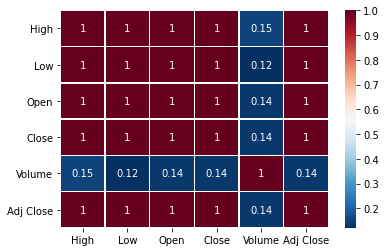

In [ ]:
df = pd.read_csv(os.path.join(PATH_PRICES, 'prices.csv'))
df.dropna(inplace=True)
df.reset_index(level=0, inplace=True)
stock_market_data_columns = ['High',
                             'Low', 
                             'Open', 
                             'Close', 
                             'Volume', 
                             'Adj Close']
pearsoncorr = df[stock_market_data_columns].corr(method ='pearson')
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.show()


In [ ]:
# Due to the small value of Pearson's correlation coefficient for column Volume, 
# we need to remove this column from further analysis.
df.drop(['Volume'],axis='columns', inplace=True)
# Just to be sure that DataFrame index is reset and starts from 0.
df.reset_index(drop=True, inplace=True)
df.to_csv(os.path.join(PATH_PRICES, 'prices.csv'), index=False)
df.to_pickle(os.path.join(PATH_PRICES, 'prices.pickle'))


###Twitter data preprocessing

In [ ]:
stop_words = set(stopwords.words('english'))
def preprocess_tweet_text(tweet):
    tweet = tweet.lower()
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Tokenize tweets
    tweet_tokens = word_tokenize(tweet)
    # Extract only alphabets from tweets
    tweet_tokens = [token for token in tweet_tokens if token.isalpha()]
    # Extract only words whose length is greater than 2
    tweet_tokens = [token for token in tweet_tokens if len(token)>2] 
    # Remove stopwords
    filtered_words = [word for word in tweet_tokens if not word in stop_words]
    
    ps = PorterStemmer()
    stemmed_words = [ps.stem(w) for w in filtered_words]
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    return " ".join(filtered_words)
    

In [ ]:
def twitter_data_preprocessing(PATH):
    print('Preprocessing Twitter data in progress...')           
    # advisable to use os.path.join as this makes concatenation OS independent
    all_files = glob.glob(os.path.join(PATH, "*.csv"))
    for filename in all_files:
        corpus_name = os.path.split(filename)[1].split('.')[0].split('_')[-1]
        print(f'Preprocessing corpus_{corpus_name}:') 
        df = pd.read_csv(filename)
        df.text = df['text'].apply(preprocess_tweet_text)
        print("Dataframe length at the beginning:",len(df))
        # Dropping Rows with NA inplace. We can pass inplace=True to change the source DataFrame itself. 
        # It’s useful when the DataFrame size is huge and we want to save some memory.
        df.dropna(inplace=True)
        print("Dataframe length after the NA drop:",len(df))
        # Remove complete duplicates (same text same sentiment). Drop duplicate rows in place keeping the first one.
        df.drop_duplicates(inplace=True)
        print("Dataframe length after the complete duplicates drop:",len(df))
        # Remove Duplicate Rows in place (remove partial duplicates = same text different sentiment)
        #remove_partial_duplicates(df)
        df.drop_duplicates(subset=['text'], keep=False, inplace=True)
        print("Dataframe length after the partial duplicates drop:",len(df))
        print(df.head())
        print(df.tail())
        print("Dataframe length at the end:",len(df))
        print('The number of tweets in dataset:',len(df))
        print('The number of negative tweets in dataset:', len(df[(df['sentiment']==-1)]))
        print('The number of neutral tweets in dataset:', len(df[(df['sentiment']==0)])) 
        print('The number of positive tweets in dataset:', len(df[(df['sentiment']==1)]))
        # Just to be sure that DataFrame index is reset and starts from 0.
        df.reset_index(drop=True, inplace=True)
        df.to_csv(os.path.join(PATH_CORPORA, f'corpus_{corpus_name}.csv'), index=False)
        df.to_pickle(os.path.join(PATH_CORPORA, f'corpus_{corpus_name}.pickle'))
    print('Twitter data has been successfully preprocessed.')

twitter_data_preprocessing(PATH_WRANGLED_DATA)

Preprocessing Twitter data in progress...
Preprocessing corpus_1:
Dataframe length at the beginning: 3124
Dataframe length after the NA drop: 3123
Dataframe length after the complete duplicates drop: 2794
Dataframe length after the partial duplicates drop: 2718
                                                text  sentiment
0                aaplthe best steve jobs emails ever        0.0
1         aapl stock miniflash crash today aapl aapl        0.0
2                          cat chews cords applesnob        0.0
3  agree individualinvestor trade apple aapl exte...        0.0
4            nobody expects spanish inquisition aapl        0.0
                                                   text  sentiment
3119    hey normal laptop charger soldering skin thanks       -1.0
3120  via apple warming social media apple hiring so...        0.0
3121                              avocado emoji may ask        0.0
3122  could agree great things happen appleandibm ib...        1.0
3123  iphone photos

##Exploratory data analysis (EDA)
Visualization

###Stock Market Data EDA
Visualization of Stock Market data

####Time Series charts
[Financial Time Series](https://plotly.com/python/time-series/)

In [ ]:
df = pd.read_csv(os.path.join(PATH_PRICES, 'prices.csv'))
def time_series_charts_visualization(df):
  time_series_columns = df.columns.tolist()
  time_series_columns.remove('Date')
  for column in time_series_columns:
    yaxis_title = f'Financial asset {column} prices (USD$)'
    if(column == 'Volume'):
      yaxis_title = 'Number of financial assets per trading day'

    fig = px.line(df, x='Date', y=column)
    fig.update_layout(title_text=f"{column} time series",
                      yaxis = dict(title = yaxis_title))
    fig.update_xaxes(
      rangeslider_visible=True,
      rangeselector=dict(
          buttons=list([
              dict(count=1, label="1m", step="month", stepmode="backward"),
              dict(count=6, label="6m", step="month", stepmode="backward"),
              dict(count=1, label="YTD", step="year", stepmode="todate"),
              dict(count=1, label="1y", step="year", stepmode="backward"),
              dict(step="all")
          ])
      )
    )
    fig.show()

time_series_charts_visualization(df)

/usr/local/lib/python3.7/dist-packages/jsonschema/compat.py:6: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

/usr/local/lib/python3.7/dist-packages/jsonschema/compat.py:6: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



####Candlestick charts
[The candlestick chart is a style of financial chart describing open, high, low and close for a given x coordinate (most likely time). The boxes represent the spread between the open and close values and the lines represent the spread between the low and high values. Sample points where the close value is higher (lower) then the open value are called increasing (decreasing). By default, increasing candles are drawn in green whereas decreasing are drawn in red.](https://plotly.com/python/candlestick-charts/)

In [ ]:
def candlestick_charts_visualization(df):
  fig = go.Figure(data=go.Candlestick(x=df['Date'],
                    open=df['Open'],
                    high=df['High'],
                    low=df['Low'],
                    close=df['Close']))
  fig.update_layout(title_text="Candlestick charts",
                    yaxis = dict(title = "Financial asset OHLC prices (USD$)"))
  fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
  )
  fig.show()
  
candlestick_charts_visualization(df)

####OHLC charts
[The OHLC chart (for open, high, low and close) is a style of financial chart describing open, high, low and close values for a given x coordinate (most likely time). The tip of the lines represent the low and high values and the horizontal segments represent the open and close values. Sample points where the close value is higher (lower) then the open value are called increasing (decreasing). By default, increasing items are drawn in green whereas decreasing are drawn in red.](https://plotly.com/python/ohlc-charts/)

In [ ]:
def ohlc_charts_visualization(df):
  fig = go.Figure(data=go.Ohlc(x=df['Date'],
                    open=df['Open'],
                    high=df['High'],
                    low=df['Low'],
                    close=df['Close']))
  fig.update_layout(title_text="OHLC charts",
                    yaxis = dict(title = "Financial asset OHLC prices (USD$)"))
  fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
  )
  fig.show()

ohlc_charts_visualization(df)

####Indicators charts
[The purpose of "indicator" is to visualize a single value specified by the "value" attribute. Three distinct visual elements are available to represent that value: number, delta and gauge. Any combination of them can be specified via the "mode" attribute.](https://plotly.com/python/indicator/)

In [ ]:
def indicators_charts_visualization(df):
  future = time.time() + 60
  for i in range(len(df['Close'])-1):
    j = i + 1
    fig = go.Figure(go.Indicator(
        title = f"{df['Date'][j]}",
        mode = "number+delta",
        value = df['Close'][j],
        number = {'prefix': "$"},
        delta = {'position': "top", 
                'reference': df['Close'][i]},
        domain = {'x': [0, 1], 'y': [0, 1]}))

    fig.update_layout(paper_bgcolor = "lightgray")
    time.sleep(1)
    fig.show()
    # clear Google Colab's output after 60 seconds. 
    # Google Colab is slowing down rapidly during a lot of Indicators charts rendering. 
    # So we need periodically to clear Google Colab output to accelerate program execution.
    if time.time() > future:
      clear_output()
      future = time.time() + 60

indicators_charts_visualization(df)

###Twitter data EDA
Visualization of Twitter data

####Sentiment Distribution

Sentiment Distribution:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


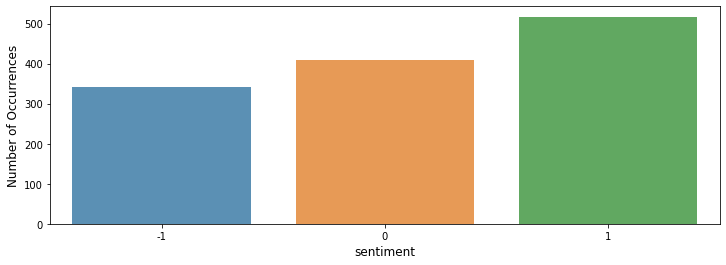

In [ ]:
df = pd.read_csv(os.path.join(PATH_CORPORA, 'corpus_3.csv'))
def sentiment_distribution_visualization(df):
  df.text = df['text'].apply(preprocess_tweet_text)

  # Sentiment Distribution
  print("Sentiment Distribution:")
  cnt_pro = df['sentiment'].value_counts()
  plt.figure(figsize=(12,4))
  sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
  plt.ylabel('Number of Occurrences', fontsize=12)
  plt.xlabel('sentiment', fontsize=12)
  plt.show()
  text = " ".join([x for x in df.text])
sentiment_distribution_visualization(df)

####WordClouds

WordCloud for negative tweets


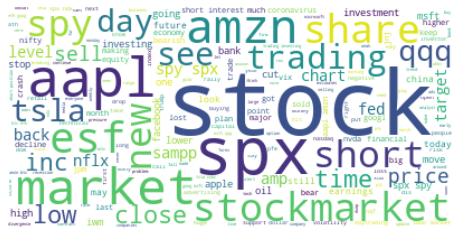

WordCloud for neutral tweets


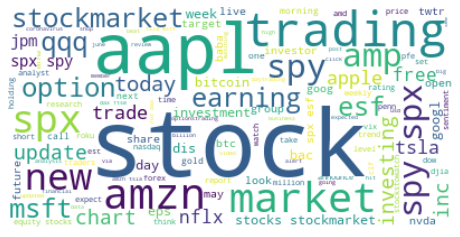

WordCloud for positive tweets


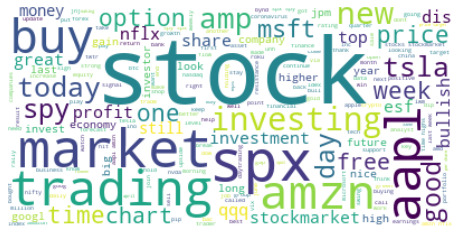

In [ ]:
def wordcloud_visualization(df):
  df.text = df['text'].apply(preprocess_tweet_text)

  # WordCloud for negative tweets
  print("WordCloud for negative tweets")
  text = " ".join([x for x in df.text[df.sentiment==-1]])
  wordcloud = WordCloud(background_color='white').generate(text)
  plt.figure(figsize=(8,6))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis('off')
  plt.show()

  # WordCloud for neutral tweets
  print("WordCloud for neutral tweets")
  text = " ".join([x for x in df.text[df.sentiment==0]])
  wordcloud = WordCloud(background_color='white').generate(text)
  plt.figure(figsize=(8,6))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis('off')
  plt.show()

  # WordCloud for positive tweets
  print("WordCloud for positive tweets")
  text = " ".join([x for x in df.text[df.sentiment==1]])
  wordcloud = WordCloud(background_color='white').generate(text)
  plt.figure(figsize=(8,6))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis('off')
  plt.show()

wordcloud_visualization(df)

##Latent Dirichlet Allocation (LDA)

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Investment-Decision-Support-System/data/apple5.csv')
dataset.text = dataset['text'].apply(preprocess_tweet_text)
data = dataset.text.values.tolist()
# list for tokenized documents in loop
texts = []
for i in dataset.text.values.tolist():
    texts.append(word_tokenize(i))
# turn our tokenized documents into a id <-> term dictionary
dictionary = gensim.corpora.Dictionary(texts)
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]
#generate LDA
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word = dictionary, passes=1,chunksize=10000,update_every=1)
pyLDAvis.enable_notebook()
# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(ldamodel, corpus, dictionary)
lda_viz

#Section two: Classification Problems (Sentiment analysis)

In [ ]:
# Classification metrics report
def classification_metrics_report(description, y_true, y_pred):
    print(description)
    print(confusion_matrix(y_true,y_pred))
    print(classification_report(y_true,y_pred))
    print("Accuracy:",accuracy_score(y_true,y_pred))

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Investment-Decision-Support-System/data/apple2.csv')
le = LabelEncoder()
#df['sentiment'] = le.fit_transform(df['sentiment'])
#df['text'] = df['text'].apply(preprocess_tweet_text)

df.head()

,Unnamed: 0,text,sentiment
0,0,Technopolis plans to develop in stages an area...,0
1,1,The international electronic industry company ...,-1
2,2,With the new production plant the company woul...,1
3,3,According to the company 's updated strategy f...,1
4,4,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,1


In [ ]:
X=list(df['text'])
y=list(df['sentiment'])

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.20, random_state = 2021)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.50, random_state = 2021)
# Print the size of our data
print(f'X Training size: {len(X_train)} tweets\n\
X Validation size: {len(X_val)} tweets\n\
X Test size: {len(X_test)} tweets')
# Print the size of our data
print(f'Y Training size: {len(y_train)} tweets\n\
Y Validation size: {len(y_val)} tweets\n\
Y Test size: {len(y_test)} tweets')

X Training size: 3868 tweets
X Validation size: 483 tweets
X Test size: 484 tweets
Y Training size: 3868 tweets
Y Validation size: 483 tweets
Y Test size: 484 tweets


##Rule based approaches for sentiment analysis (unsupervised learning)

###Vader sentiment analyzer

In [ ]:
def sentiment_analysis_vader(df):
    vader = SentimentIntensityAnalyzer()
    df['vader_score'] = df['text'].apply(lambda text: vader.polarity_scores(text)['compound'])
    df['vader_sentiment']=''
    df.loc[df.vader_score<0,'vader_sentiment']=-1
    df.loc[df.vader_score==0,'vader_sentiment']=0
    df.loc[df.vader_score>0,'vader_sentiment']=1
    classification_metrics_report('Vader classification metrics report:',df.sentiment,df.vader_sentiment.astype(int))
sentiment_analysis_vader(df)

Vader classification metrics report:
[[ 188  174  242]
 [ 199 1470 1201]
 [  76  316  969]]
              precision    recall  f1-score   support

          -1       0.41      0.31      0.35       604
           0       0.75      0.51      0.61      2870
           1       0.40      0.71      0.51      1361

    accuracy                           0.54      4835
   macro avg       0.52      0.51      0.49      4835
weighted avg       0.61      0.54      0.55      4835

Accuracy: 0.543329886246122


###Textblob sentiment analyzer

In [ ]:
def sentiment_analysis_textblob(df):
    df['textblob_score'] = df['text'].apply(lambda text: TextBlob(text).sentiment.polarity)
    df['textblob_sentiment']=''
    df.loc[df.textblob_score<0,'textblob_sentiment']=-1
    df.loc[df.textblob_score==0,'textblob_sentiment']=0
    df.loc[df.textblob_score>0,'textblob_sentiment']=1
    classification_metrics_report('Textblob classification metrics report:',df.sentiment,df.textblob_sentiment.astype(int))
sentiment_analysis_textblob(df)

Textblob classification metrics report:
[[ 232  253  119]
 [ 402 1558  910]
 [ 127  651  583]]
              precision    recall  f1-score   support

          -1       0.30      0.38      0.34       604
           0       0.63      0.54      0.58      2870
           1       0.36      0.43      0.39      1361

    accuracy                           0.49      4835
   macro avg       0.43      0.45      0.44      4835
weighted avg       0.52      0.49      0.50      4835

Accuracy: 0.4907962771458118


##Dictionary (Lexicon) Based Approaches for Sentiment Analysis (unsupervised learning)

###Library for sentiment analysis in dictionary framework

####Loughran and McDonald sentiment analyzer

In [ ]:
def sentiment_analysis_loughran_mcdonald(df):
    lm = ps.LM()
    df['loughran_mcdonald_score'] = df['text'].apply(lambda text: lm.get_score(lm.tokenize(text))['Polarity'])
    df['loughran_mcdonald_sentiment']=''
    df.loc[df.loughran_mcdonald_score<0,'loughran_mcdonald_sentiment']=-1
    df.loc[df.loughran_mcdonald_score==0,'loughran_mcdonald_sentiment']=0
    df.loc[df.loughran_mcdonald_score>0,'loughran_mcdonald_sentiment']=1
    classification_metrics_report('Loughran and McDonald classification metrics report:',df.sentiment,df.loughran_mcdonald_sentiment.astype(int))
sentiment_analysis_loughran_mcdonald(df)

Loughran and McDonald classification metrics report:
[[   0    0    0    0]
 [ 212  278  114    0]
 [ 391 2084  395    0]
 [ 167  714  480    0]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.09      0.46      0.15       604
           1       0.40      0.14      0.20      2870
           2       0.00      0.00      0.00      1361

    accuracy                           0.14      4835
   macro avg       0.12      0.15      0.09      4835
weighted avg       0.25      0.14      0.14      4835

Accuracy: 0.1391933815925543


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



####Harvard IV-4 sentiment analyzer

In [ ]:
def sentiment_analysis_harvard(df):
    hiv4 = ps.HIV4()
    df['harvard_score'] = df['text'].apply(lambda text: hiv4.get_score(hiv4.tokenize(text))['Polarity'])
    df['harvard_sentiment']=''
    df.loc[df.harvard_score<0,'harvard_sentiment']=-1
    df.loc[df.harvard_score==0,'harvard_sentiment']=0
    df.loc[df.harvard_score>0,'harvard_sentiment']=1
    classification_metrics_report('Harvard IV-4 classification metrics report:',df.sentiment,df.harvard_sentiment.astype(int))
sentiment_analysis_harvard(df)

Harvard IV-4 classification metrics report:
[[ 146  178  280]
 [ 208  688 1974]
 [ 105  272  984]]
              precision    recall  f1-score   support

          -1       0.32      0.24      0.27       604
           0       0.60      0.24      0.34      2870
           1       0.30      0.72      0.43      1361

    accuracy                           0.38      4835
   macro avg       0.41      0.40      0.35      4835
weighted avg       0.48      0.38      0.36      4835

Accuracy: 0.3760082730093071


###Corpus-based sentiment lexicons

In [ ]:
def generate_corpus_based_lexicons(PATH,number_of_words):
    print('Generating corpus-based lexicons in progress...')       
    # advisable to use os.path.join as this makes concatenation OS independent
    all_files = glob.glob(os.path.join(PATH, "*.csv"))
    total = {}
    for filename in all_files:
        lexicon = {}
        lexicon_name = os.path.split(filename)[1].split('.')[0]
        print(f'Generating {lexicon_name}-based lexicons in progress...')
        temp = {}
        df = pd.read_csv(filename)
        # Remove empty tweets.
        df.dropna(inplace=True)
        df.text = df['text'].apply(preprocess_tweet_text)
        for index, row in df.iterrows():
            tweet_sentiment = row.sentiment
            tweet_tokens = word_tokenize(row.text)
            for token in tweet_tokens:
                if token in temp:
                    temp[token] = temp[token] + tweet_sentiment
                    continue
                temp[token] = tweet_sentiment
        

        # Negative Sentiment Word Lists
        # With a sorted negative word list, you increase the speed of corpus-based lexicon genesis. 
        # You do not need to go through the complete dataset you only take the most negative words. 
        # With a sorted negative word list, you are reducing search space.
        negative = dict(sorted(temp.items(), key=lambda item: item[1]))
        # We need to prevent positive and negative word lists from overlapping. 
        # If the number of words parameter is greater than half of the complete word list size, 
        # positive and negative word lists will overlap.
        if(number_of_words>math.floor(len(negative)/2)):
            raise Exception(f"Positive and negative word lists are overlapping. Please choose a smaller number of words. Choose a number smaller than {math.floor(len(negative)/2)}.")
        # First N most negative words in negative sentiment words list. N = number_of_words
        negative_words = []
        for item in list(negative.items())[:number_of_words]:
            #print(word[0])
            word = item[0]
            word_sentiment = item[1]
            negative_words.append(word)
            if word in total:
                total[word] = total[word] + word_sentiment
                continue
            total[word] = word_sentiment
        lexicon['Negative'] = negative_words

        # Positive Sentiment Word Lists
        # With a sorted positive word list, you increase the speed of corpus-based lexicon genesis. 
        # You do not need to go through the complete dataset you only take the most positive words. 
        # With a sorted positive word list, you are reducing search space.
        positive = dict(sorted(temp.items(), reverse=True, key=lambda item: item[1]))
        # First N most positive words in positive sentiment words list. N = number_of_words
        positive_words = []
        for item in list(positive.items())[:number_of_words]:
            word = item[0]
            word_sentiment = item[1]
            positive_words.append(word)
            if word in total:
                total[word] = total[word] + word_sentiment
                continue
            total[word] = word_sentiment
        lexicon['Positive'] = positive_words
        dump(lexicon, open(os.path.join(PATH_LEXICONS, f'{lexicon_name}_lexicon.pickle'), 'wb'))

    print('Corpus-based lexicons have been successfully generated.')

generate_corpus_based_lexicons(PATH_CORPORA,2000)

Generating corpus-based lexicons in progress...
Generating corpus_merged-based lexicons in progress...
Generating corpus_5-based lexicons in progress...
Generating corpus_4-based lexicons in progress...
Generating corpus_3-based lexicons in progress...
Generating corpus_1-based lexicons in progress...
Generating corpus_2-based lexicons in progress...
Corpus-based lexicons have been successfully generated.


###Generating domain-specific dictionaries (lexicons) using financial knowledge
[Financial Lexicons](http://kaichen.work/?p=399)

####[Loughran and McDonald sentiment word lists](https://sraf.nd.edu/textual-analysis/resources/)

In [ ]:
lm_dict = {'Negative': ['abandon', 'abandoned', 'abandoning', 'abandonment', 'abandonments', 'abandons', 'abdicated',
                       'abdicates', 'abdicating', 'abdication', 'abdications', 'aberrant', 'aberration', 'aberrational',
                       'aberrations', 'abetting', 'abnormal', 'abnormalities', 'abnormality', 'abnormally', 'abolish',
                       'abolished', 'abolishes', 'abolishing', 'abrogate', 'abrogated', 'abrogates', 'abrogating',
                       'abrogation', 'abrogations', 'abrupt', 'abruptly', 'abruptness', 'absence', 'absences',
                       'absenteeism', 'abuse', 'abused', 'abuses', 'abusing', 'abusive', 'abusively', 'abusiveness',
                       'accident', 'accidental', 'accidentally', 'accidents', 'accusation', 'accusations', 'accuse',
                       'accused', 'accuses', 'accusing', 'acquiesce', 'acquiesced', 'acquiesces', 'acquiescing',
                       'acquit', 'acquits', 'acquittal', 'acquittals', 'acquitted', 'acquitting', 'adulterate',
                       'adulterated', 'adulterating', 'adulteration', 'adulterations', 'adversarial', 'adversaries',
                       'adversary', 'adverse', 'adversely', 'adversities', 'adversity', 'aftermath', 'aftermaths',
                       'against', 'aggravate', 'aggravated', 'aggravates', 'aggravating', 'aggravation', 'aggravations',
                       'alerted', 'alerting', 'alienate', 'alienated', 'alienates', 'alienating', 'alienation',
                       'alienations', 'allegation', 'allegations', 'allege', 'alleged', 'allegedly', 'alleges',
                       'alleging', 'annoy', 'annoyance', 'annoyances', 'annoyed', 'annoying', 'annoys', 'annul',
                       'annulled', 'annulling', 'annulment', 'annulments', 'annuls', 'anomalies', 'anomalous',
                       'anomalously', 'anomaly', 'anticompetitive', 'antitrust', 'argue', 'argued', 'arguing',
                       'argument', 'argumentative', 'arguments', 'arrearage', 'arrearages', 'arrears', 'arrest',
                       'arrested', 'arrests', 'artificially', 'assault', 'assaulted', 'assaulting', 'assaults',
                       'assertions', 'attrition', 'aversely', 'backdating', 'bad', 'bail', 'bailout', 'balk', 'balked',
                       'bankrupt', 'bankruptcies', 'bankruptcy', 'bankrupted', 'bankrupting', 'bankrupts', 'bans',
                       'barred', 'barrier', 'barriers', 'bottleneck', 'bottlenecks', 'boycott', 'boycotted',
                       'boycotting', 'boycotts', 'breach', 'breached', 'breaches', 'breaching', 'break', 'breakage',
                       'breakages', 'breakdown', 'breakdowns', 'breaking', 'breaks', 'bribe', 'bribed', 'briberies',
                       'bribery', 'bribes', 'bribing', 'bridge', 'broken', 'burden', 'burdened', 'burdening', 'burdens',
                       'burdensome', 'burned', 'calamities', 'calamitous', 'calamity', 'cancel', 'canceled',
                       'canceling', 'cancellation', 'cancellations', 'cancelled', 'cancelling', 'cancels', 'careless',
                       'carelessly', 'carelessness', 'catastrophe', 'catastrophes', 'catastrophic', 'catastrophically',
                       'caution', 'cautionary', 'cautioned', 'cautioning', 'cautions', 'cease', 'ceased', 'ceases',
                       'ceasing', 'censure', 'censured', 'censures', 'censuring', 'challenge', 'challenged',
                       'challenges', 'challenging', 'chargeoffs', 'circumvent', 'circumvented', 'circumventing',
                       'circumvention', 'circumventions', 'circumvents', 'claiming', 'claims', 'clawback', 'closed',
                       'closeout', 'closeouts', 'closing', 'closings', 'closure', 'closures', 'coerce', 'coerced',
                       'coerces', 'coercing', 'coercion', 'coercive', 'collapse', 'collapsed', 'collapses',
                       'collapsing', 'collision', 'collisions', 'collude', 'colluded', 'colludes', 'colluding',
                       'collusion', 'collusions', 'collusive', 'complain', 'complained', 'complaining', 'complains',
                       'complaint', 'complaints', 'complicate', 'complicated', 'complicates', 'complicating',
                       'complication', 'complications', 'compulsion', 'concealed', 'concealing', 'concede', 'conceded',
                       'concedes', 'conceding', 'concern', 'concerned', 'concerns', 'conciliating', 'conciliation',
                       'conciliations', 'condemn', 'condemnation', 'condemnations', 'condemned', 'condemning',
                       'condemns', 'condone', 'condoned', 'confess', 'confessed', 'confesses', 'confessing',
                       'confession', 'confine', 'confined', 'confinement', 'confinements', 'confines', 'confining',
                       'confiscate', 'confiscated', 'confiscates', 'confiscating', 'confiscation', 'confiscations',
                       'conflict', 'conflicted', 'conflicting', 'conflicts', 'confront', 'confrontation',
                       'confrontational', 'confrontations', 'confronted', 'confronting', 'confronts', 'confuse',
                       'confused', 'confuses', 'confusing', 'confusingly', 'confusion', 'conspiracies', 'conspiracy',
                       'conspirator', 'conspiratorial', 'conspirators', 'conspire', 'conspired', 'conspires',
                       'conspiring', 'contempt', 'contend', 'contended', 'contending', 'contends', 'contention',
                       'contentions', 'contentious', 'contentiously', 'contested', 'contesting', 'contraction',
                       'contractions', 'contradict', 'contradicted', 'contradicting', 'contradiction', 'contradictions',
                       'contradictory', 'contradicts', 'contrary', 'controversial', 'controversies', 'controversy',
                       'convict', 'convicted', 'convicting', 'conviction', 'convictions', 'corrected', 'correcting',
                       'correction', 'corrections', 'corrects', 'corrupt', 'corrupted', 'corrupting', 'corruption',
                       'corruptions', 'corruptly', 'corruptness', 'costly', 'counterclaim', 'counterclaimed',
                       'counterclaiming', 'counterclaims', 'counterfeit', 'counterfeited', 'counterfeiter',
                       'counterfeiters', 'counterfeiting', 'counterfeits', 'countermeasure', 'countermeasures', 'crime',
                       'crimes', 'criminal', 'criminally', 'criminals', 'crises', 'crisis', 'critical', 'critically',
                       'criticism', 'criticisms', 'criticize', 'criticized', 'criticizes', 'criticizing', 'crucial',
                       'crucially', 'culpability', 'culpable', 'culpably', 'cumbersome', 'curtail', 'curtailed',
                       'curtailing', 'curtailment', 'curtailments', 'curtails', 'cut', 'cutback', 'cutbacks',
                       'cyberattack', 'cyberattacks', 'cyberbullying', 'cybercrime', 'cybercrimes', 'cybercriminal',
                       'cybercriminals', 'damage', 'damaged', 'damages', 'damaging', 'dampen', 'dampened', 'danger',
                       'dangerous', 'dangerously', 'dangers', 'deadlock', 'deadlocked', 'deadlocking', 'deadlocks',
                       'deadweight', 'deadweights', 'debarment', 'debarments', 'debarred', 'deceased', 'deceit',
                       'deceitful', 'deceitfulness', 'deceive', 'deceived', 'deceives', 'deceiving', 'deception',
                       'deceptions', 'deceptive', 'deceptively', 'decline', 'declined', 'declines', 'declining',
                       'deface', 'defaced', 'defacement', 'defamation', 'defamations', 'defamatory', 'defame',
                       'defamed', 'defames', 'defaming', 'default', 'defaulted', 'defaulting', 'defaults', 'defeat',
                       'defeated', 'defeating', 'defeats', 'defect', 'defective', 'defects', 'defend', 'defendant',
                       'defendants', 'defended', 'defending', 'defends', 'defensive', 'defer', 'deficiencies',
                       'deficiency', 'deficient', 'deficit', 'deficits', 'defraud', 'defrauded', 'defrauding',
                       'defrauds', 'defunct', 'degradation', 'degradations', 'degrade', 'degraded', 'degrades',
                       'degrading', 'delay', 'delayed', 'delaying', 'delays', 'deleterious', 'deliberate',
                       'deliberated', 'deliberately', 'delinquencies', 'delinquency', 'delinquent', 'delinquently',
                       'delinquents', 'delist', 'delisted', 'delisting', 'delists', 'demise', 'demised', 'demises',
                       'demising', 'demolish', 'demolished', 'demolishes', 'demolishing', 'demolition', 'demolitions',
                       'demote', 'demoted', 'demotes', 'demoting', 'demotion', 'demotions', 'denial', 'denials',
                       'denied', 'denies', 'denigrate', 'denigrated', 'denigrates', 'denigrating', 'denigration',
                       'deny', 'denying', 'deplete', 'depleted', 'depletes', 'depleting', 'depletion', 'depletions',
                       'deprecation', 'depress', 'depressed', 'depresses', 'depressing', 'deprivation', 'deprive',
                       'deprived', 'deprives', 'depriving', 'derelict', 'dereliction', 'derogatory', 'destabilization',
                       'destabilize', 'destabilized', 'destabilizing', 'destroy', 'destroyed', 'destroying', 'destroys',
                       'destruction', 'destructive', 'detain', 'detained', 'detention', 'detentions', 'deter',
                       'deteriorate', 'deteriorated', 'deteriorates', 'deteriorating', 'deterioration',
                       'deteriorations', 'deterred', 'deterrence', 'deterrences', 'deterrent', 'deterrents',
                       'deterring', 'deters', 'detract', 'detracted', 'detracting', 'detriment', 'detrimental',
                       'detrimentally', 'detriments', 'devalue', 'devalued', 'devalues', 'devaluing', 'devastate',
                       'devastated', 'devastating', 'devastation', 'deviate', 'deviated', 'deviates', 'deviating',
                       'deviation', 'deviations', 'devolve', 'devolved', 'devolves', 'devolving', 'difficult',
                       'difficulties', 'difficultly', 'difficulty', 'diminish', 'diminished', 'diminishes',
                       'diminishing', 'diminution', 'disadvantage', 'disadvantaged', 'disadvantageous', 'disadvantages',
                       'disaffiliation', 'disagree', 'disagreeable', 'disagreed', 'disagreeing', 'disagreement',
                       'disagreements', 'disagrees', 'disallow', 'disallowance', 'disallowances', 'disallowed',
                       'disallowing', 'disallows', 'disappear', 'disappearance', 'disappearances', 'disappeared',
                       'disappearing', 'disappears', 'disappoint', 'disappointed', 'disappointing', 'disappointingly',
                       'disappointment', 'disappointments', 'disappoints', 'disapproval', 'disapprovals', 'disapprove',
                       'disapproved', 'disapproves', 'disapproving', 'disassociates', 'disassociating',
                       'disassociation', 'disassociations', 'disaster', 'disasters', 'disastrous', 'disastrously',
                       'disavow', 'disavowal', 'disavowed', 'disavowing', 'disavows', 'disciplinary', 'disclaim',
                       'disclaimed', 'disclaimer', 'disclaimers', 'disclaiming', 'disclaims', 'disclose', 'disclosed',
                       'discloses', 'disclosing', 'discontinuance', 'discontinuances', 'discontinuation',
                       'discontinuations', 'discontinue', 'discontinued', 'discontinues', 'discontinuing', 'discourage',
                       'discouraged', 'discourages', 'discouraging', 'discredit', 'discredited', 'discrediting',
                       'discredits', 'discrepancies', 'discrepancy', 'disfavor', 'disfavored', 'disfavoring',
                       'disfavors', 'disgorge', 'disgorged', 'disgorgement', 'disgorgements', 'disgorges', 'disgorging',
                       'disgrace', 'disgraceful', 'disgracefully', 'dishonest', 'dishonestly', 'dishonesty', 'dishonor',
                       'dishonorable', 'dishonorably', 'dishonored', 'dishonoring', 'dishonors', 'disincentives',
                       'disinterested', 'disinterestedly', 'disinterestedness', 'disloyal', 'disloyally', 'disloyalty',
                       'dismal', 'dismally', 'dismiss', 'dismissal', 'dismissals', 'dismissed', 'dismisses',
                       'dismissing', 'disorderly', 'disparage', 'disparaged', 'disparagement', 'disparagements',
                       'disparages', 'disparaging', 'disparagingly', 'disparities', 'disparity', 'displace',
                       'displaced', 'displacement', 'displacements', 'displaces', 'displacing', 'dispose', 'dispossess',
                       'dispossessed', 'dispossesses', 'dispossessing', 'disproportion', 'disproportional',
                       'disproportionate', 'disproportionately', 'dispute', 'disputed', 'disputes', 'disputing',
                       'disqualification', 'disqualifications', 'disqualified', 'disqualifies', 'disqualify',
                       'disqualifying', 'disregard', 'disregarded', 'disregarding', 'disregards', 'disreputable',
                       'disrepute', 'disrupt', 'disrupted', 'disrupting', 'disruption', 'disruptions', 'disruptive',
                       'disrupts', 'dissatisfaction', 'dissatisfied', 'dissent', 'dissented', 'dissenter', 'dissenters',
                       'dissenting', 'dissents', 'dissident', 'dissidents', 'dissolution', 'dissolutions', 'distort',
                       'distorted', 'distorting', 'distortion', 'distortions', 'distorts', 'distract', 'distracted',
                       'distracting', 'distraction', 'distractions', 'distracts', 'distress', 'distressed', 'disturb',
                       'disturbance', 'disturbances', 'disturbed', 'disturbing', 'disturbs', 'diversion', 'divert',
                       'diverted', 'diverting', 'diverts', 'divest', 'divested', 'divesting', 'divestiture',
                       'divestitures', 'divestment', 'divestments', 'divests', 'divorce', 'divorced', 'divulge',
                       'divulged', 'divulges', 'divulging', 'doubt', 'doubted', 'doubtful', 'doubts', 'downgrade',
                       'downgraded', 'downgrades', 'downgrading', 'downsize', 'downsized', 'downsizes', 'downsizing',
                       'downsizings', 'downtime', 'downtimes', 'downturn', 'downturns', 'downward', 'downwards', 'drag',
                       'drastic', 'drastically', 'drawback', 'drawbacks', 'dropped', 'drought', 'droughts', 'duress',
                       'dysfunction', 'dysfunctional', 'dysfunctions', 'easing', 'egregious', 'egregiously', 'embargo',
                       'embargoed', 'embargoes', 'embargoing', 'embarrass', 'embarrassed', 'embarrasses',
                       'embarrassing', 'embarrassment', 'embarrassments', 'embezzle', 'embezzled', 'embezzlement',
                       'embezzlements', 'embezzler', 'embezzles', 'embezzling', 'encroach', 'encroached', 'encroaches',
                       'encroaching', 'encroachment', 'encroachments', 'encumber', 'encumbered', 'encumbering',
                       'encumbers', 'encumbrance', 'encumbrances', 'endanger', 'endangered', 'endangering',
                       'endangerment', 'endangers', 'enjoin', 'enjoined', 'enjoining', 'enjoins', 'erode', 'eroded',
                       'erodes', 'eroding', 'erosion', 'erratic', 'erratically', 'erred', 'erring', 'erroneous',
                       'erroneously', 'error', 'errors', 'errs', 'escalate', 'escalated', 'escalates', 'escalating',
                       'evade', 'evaded', 'evades', 'evading', 'evasion', 'evasions', 'evasive', 'evict', 'evicted',
                       'evicting', 'eviction', 'evictions', 'evicts', 'exacerbate', 'exacerbated', 'exacerbates',
                       'exacerbating', 'exacerbation', 'exacerbations', 'exaggerate', 'exaggerated', 'exaggerates',
                       'exaggerating', 'exaggeration', 'excessive', 'excessively', 'exculpate', 'exculpated',
                       'exculpates', 'exculpating', 'exculpation', 'exculpations', 'exculpatory', 'exonerate',
                       'exonerated', 'exonerates', 'exonerating', 'exoneration', 'exonerations', 'exploit',
                       'exploitation', 'exploitations', 'exploitative', 'exploited', 'exploiting', 'exploits', 'expose',
                       'exposed', 'exposes', 'exposing', 'expropriate', 'expropriated', 'expropriates', 'expropriating',
                       'expropriation', 'expropriations', 'expulsion', 'expulsions', 'extenuating', 'fail', 'failed',
                       'failing', 'failings', 'fails', 'failure', 'failures', 'fallout', 'false', 'falsely',
                       'falsification', 'falsifications', 'falsified', 'falsifies', 'falsify', 'falsifying', 'falsity',
                       'fatalities', 'fatality', 'fatally', 'fault', 'faulted', 'faults', 'faulty', 'fear', 'fears',
                       'felonies', 'felonious', 'felony', 'fictitious', 'fined', 'fines', 'fired', 'firing', 'flaw',
                       'flawed', 'flaws', 'forbid', 'forbidden', 'forbidding', 'forbids', 'force', 'forced', 'forcing',
                       'foreclose', 'foreclosed', 'forecloses', 'foreclosing', 'foreclosure', 'foreclosures', 'forego',
                       'foregoes', 'foregone', 'forestall', 'forestalled', 'forestalling', 'forestalls', 'forfeit',
                       'forfeited', 'forfeiting', 'forfeits', 'forfeiture', 'forfeitures', 'forgers', 'forgery',
                       'fraud', 'frauds', 'fraudulence', 'fraudulent', 'fraudulently', 'frivolous', 'frivolously',
                       'frustrate', 'frustrated', 'frustrates', 'frustrating', 'frustratingly', 'frustration',
                       'frustrations', 'fugitive', 'fugitives', 'gratuitous', 'gratuitously', 'grievance', 'grievances',
                       'grossly', 'groundless', 'guilty', 'halt', 'halted', 'hamper', 'hampered', 'hampering',
                       'hampers', 'harass', 'harassed', 'harassing', 'harassment', 'hardship', 'hardships', 'harm',
                       'harmed', 'harmful', 'harmfully', 'harming', 'harms', 'harsh', 'harsher', 'harshest', 'harshly',
                       'harshness', 'hazard', 'hazardous', 'hazards', 'hinder', 'hindered', 'hindering', 'hinders',
                       'hindrance', 'hindrances', 'hostile', 'hostility', 'hurt', 'hurting', 'idle', 'idled', 'idling',
                       'ignore', 'ignored', 'ignores', 'ignoring', 'ill', 'illegal', 'illegalities', 'illegality',
                       'illegally', 'illegible', 'illicit', 'illicitly', 'illiquid', 'illiquidity', 'imbalance',
                       'imbalances', 'immature', 'immoral', 'impair', 'impaired', 'impairing', 'impairment',
                       'impairments', 'impairs', 'impasse', 'impasses', 'impede', 'impeded', 'impedes', 'impediment',
                       'impediments', 'impeding', 'impending', 'imperative', 'imperfection', 'imperfections', 'imperil',
                       'impermissible', 'implicate', 'implicated', 'implicates', 'implicating', 'impossibility',
                       'impossible', 'impound', 'impounded', 'impounding', 'impounds', 'impracticable', 'impractical',
                       'impracticalities', 'impracticality', 'imprisonment', 'improper', 'improperly', 'improprieties',
                       'impropriety', 'imprudent', 'imprudently', 'inability', 'inaccessible', 'inaccuracies',
                       'inaccuracy', 'inaccurate', 'inaccurately', 'inaction', 'inactions', 'inactivate', 'inactivated',
                       'inactivates', 'inactivating', 'inactivation', 'inactivations', 'inactivity', 'inadequacies',
                       'inadequacy', 'inadequate', 'inadequately', 'inadvertent', 'inadvertently', 'inadvisability',
                       'inadvisable', 'inappropriate', 'inappropriately', 'inattention', 'incapable', 'incapacitated',
                       'incapacity', 'incarcerate', 'incarcerated', 'incarcerates', 'incarcerating', 'incarceration',
                       'incarcerations', 'incidence', 'incidences', 'incident', 'incidents', 'incompatibilities',
                       'incompatibility', 'incompatible', 'incompetence', 'incompetency', 'incompetent',
                       'incompetently', 'incompetents', 'incomplete', 'incompletely', 'incompleteness', 'inconclusive',
                       'inconsistencies', 'inconsistency', 'inconsistent', 'inconsistently', 'inconvenience',
                       'inconveniences', 'inconvenient', 'incorrect', 'incorrectly', 'incorrectness', 'indecency',
                       'indecent', 'indefeasible', 'indefeasibly', 'indict', 'indictable', 'indicted', 'indicting',
                       'indictment', 'indictments', 'ineffective', 'ineffectively', 'ineffectiveness', 'inefficiencies',
                       'inefficiency', 'inefficient', 'inefficiently', 'ineligibility', 'ineligible', 'inequitable',
                       'inequitably', 'inequities', 'inequity', 'inevitable', 'inexperience', 'inexperienced',
                       'inferior', 'inflicted', 'infraction', 'infractions', 'infringe', 'infringed', 'infringement',
                       'infringements', 'infringes', 'infringing', 'inhibited', 'inimical', 'injunction', 'injunctions',
                       'injure', 'injured', 'injures', 'injuries', 'injuring', 'injurious', 'injury', 'inordinate',
                       'inordinately', 'inquiry', 'insecure', 'insensitive', 'insolvencies', 'insolvency', 'insolvent',
                       'instability', 'insubordination', 'insufficiency', 'insufficient', 'insufficiently',
                       'insurrection', 'insurrections', 'intentional', 'interfere', 'interfered', 'interference',
                       'interferences', 'interferes', 'interfering', 'intermittent', 'intermittently', 'interrupt',
                       'interrupted', 'interrupting', 'interruption', 'interruptions', 'interrupts', 'intimidation',
                       'intrusion', 'invalid', 'invalidate', 'invalidated', 'invalidates', 'invalidating',
                       'invalidation', 'invalidity', 'investigate', 'investigated', 'investigates', 'investigating',
                       'investigation', 'investigations', 'involuntarily', 'involuntary', 'irreconcilable',
                       'irreconcilably', 'irrecoverable', 'irrecoverably', 'irregular', 'irregularities',
                       'irregularity', 'irregularly', 'irreparable', 'irreparably', 'irreversible', 'jeopardize',
                       'jeopardized', 'justifiable', 'kickback', 'kickbacks', 'knowingly', 'lack', 'lacked', 'lacking',
                       'lackluster', 'lacks', 'lag', 'lagged', 'lagging', 'lags', 'lapse', 'lapsed', 'lapses',
                       'lapsing', 'late', 'laundering', 'layoff', 'layoffs', 'lie', 'limitation', 'limitations',
                       'lingering', 'liquidate', 'liquidated', 'liquidates', 'liquidating', 'liquidation',
                       'liquidations', 'liquidator', 'liquidators', 'litigant', 'litigants', 'litigate', 'litigated',
                       'litigates', 'litigating', 'litigation', 'litigations', 'lockout', 'lockouts', 'lose', 'loses',
                       'losing', 'loss', 'losses', 'lost', 'lying', 'malfeasance', 'malfunction', 'malfunctioned',
                       'malfunctioning', 'malfunctions', 'malice', 'malicious', 'maliciously', 'malpractice',
                       'manipulate', 'manipulated', 'manipulates', 'manipulating', 'manipulation', 'manipulations',
                       'manipulative', 'markdown', 'markdowns', 'misapplication', 'misapplications', 'misapplied',
                       'misapplies', 'misapply', 'misapplying', 'misappropriate', 'misappropriated', 'misappropriates',
                       'misappropriating', 'misappropriation', 'misappropriations', 'misbranded', 'miscalculate',
                       'miscalculated', 'miscalculates', 'miscalculating', 'miscalculation', 'miscalculations',
                       'mischaracterization', 'mischief', 'misclassification', 'misclassifications', 'misclassified',
                       'misclassify', 'miscommunication', 'misconduct', 'misdated', 'misdemeanor', 'misdemeanors',
                       'misdirected', 'mishandle', 'mishandled', 'mishandles', 'mishandling', 'misinform',
                       'misinformation', 'misinformed', 'misinforming', 'misinforms', 'misinterpret',
                       'misinterpretation', 'misinterpretations', 'misinterpreted', 'misinterpreting', 'misinterprets',
                       'misjudge', 'misjudged', 'misjudges', 'misjudging', 'misjudgment', 'misjudgments', 'mislabel',
                       'mislabeled', 'mislabeling', 'mislabelled', 'mislabels', 'mislead', 'misleading', 'misleadingly',
                       'misleads', 'misled', 'mismanage', 'mismanaged', 'mismanagement', 'mismanages', 'mismanaging',
                       'mismatch', 'mismatched', 'mismatches', 'mismatching', 'misplaced', 'misprice', 'mispricing',
                       'mispricings', 'misrepresent', 'misrepresentation', 'misrepresentations', 'misrepresented',
                       'misrepresenting', 'misrepresents', 'miss', 'missed', 'misses', 'misstate', 'misstated',
                       'misstatement', 'misstatements', 'misstates', 'misstating', 'misstep', 'missteps', 'mistake',
                       'mistaken', 'mistakenly', 'mistakes', 'mistaking', 'mistrial', 'mistrials', 'misunderstand',
                       'misunderstanding', 'misunderstandings', 'misunderstood', 'misuse', 'misused', 'misuses',
                       'misusing', 'monopolistic', 'monopolists', 'monopolization', 'monopolize', 'monopolized',
                       'monopolizes', 'monopolizing', 'monopoly', 'moratoria', 'moratorium', 'moratoriums',
                       'mothballed', 'mothballing', 'negative', 'negatively', 'negatives', 'neglect', 'neglected',
                       'neglectful', 'neglecting', 'neglects', 'negligence', 'negligences', 'negligent', 'negligently',
                       'nonattainment', 'noncompetitive', 'noncompliance', 'noncompliances', 'noncompliant',
                       'noncomplying', 'nonconforming', 'nonconformities', 'nonconformity', 'nondisclosure',
                       'nonfunctional', 'nonpayment', 'nonpayments', 'nonperformance', 'nonperformances',
                       'nonperforming', 'nonproducing', 'nonproductive', 'nonrecoverable', 'nonrenewal', 'nuisance',
                       'nuisances', 'nullification', 'nullifications', 'nullified', 'nullifies', 'nullify',
                       'nullifying', 'objected', 'objecting', 'objection', 'objectionable', 'objectionably',
                       'objections', 'obscene', 'obscenity', 'obsolescence', 'obsolete', 'obstacle', 'obstacles',
                       'obstruct', 'obstructed', 'obstructing', 'obstruction', 'obstructions', 'offence', 'offences',
                       'offend', 'offended', 'offender', 'offenders', 'offending', 'offends', 'omission', 'omissions',
                       'omit', 'omits', 'omitted', 'omitting', 'onerous', 'opportunistic', 'opportunistically',
                       'oppose', 'opposed', 'opposes', 'opposing', 'opposition', 'oppositions', 'outage', 'outages',
                       'outdated', 'outmoded', 'overage', 'overages', 'overbuild', 'overbuilding', 'overbuilds',
                       'overbuilt', 'overburden', 'overburdened', 'overburdening', 'overcapacities', 'overcapacity',
                       'overcharge', 'overcharged', 'overcharges', 'overcharging', 'overcome', 'overcomes',
                       'overcoming', 'overdue', 'overestimate', 'overestimated', 'overestimates', 'overestimating',
                       'overestimation', 'overestimations', 'overload', 'overloaded', 'overloading', 'overloads',
                       'overlook', 'overlooked', 'overlooking', 'overlooks', 'overpaid', 'overpayment', 'overpayments',
                       'overproduced', 'overproduces', 'overproducing', 'overproduction', 'overrun', 'overrunning',
                       'overruns', 'overshadow', 'overshadowed', 'overshadowing', 'overshadows', 'overstate',
                       'overstated', 'overstatement', 'overstatements', 'overstates', 'overstating', 'oversupplied',
                       'oversupplies', 'oversupply', 'oversupplying', 'overtly', 'overturn', 'overturned',
                       'overturning', 'overturns', 'overvalue', 'overvalued', 'overvaluing', 'panic', 'panics',
                       'penalize', 'penalized', 'penalizes', 'penalizing', 'penalties', 'penalty', 'peril', 'perils',
                       'perjury', 'perpetrate', 'perpetrated', 'perpetrates', 'perpetrating', 'perpetration', 'persist',
                       'persisted', 'persistence', 'persistent', 'persistently', 'persisting', 'persists', 'pervasive',
                       'pervasively', 'pervasiveness', 'petty', 'picket', 'picketed', 'picketing', 'plaintiff',
                       'plaintiffs', 'plea', 'plead', 'pleaded', 'pleading', 'pleadings', 'pleads', 'pleas', 'pled',
                       'poor', 'poorly', 'poses', 'posing', 'postpone', 'postponed', 'postponement', 'postponements',
                       'postpones', 'postponing', 'precipitated', 'precipitous', 'precipitously', 'preclude',
                       'precluded', 'precludes', 'precluding', 'predatory', 'prejudice', 'prejudiced', 'prejudices',
                       'prejudicial', 'prejudicing', 'premature', 'prematurely', 'pressing', 'pretrial', 'preventing',
                       'prevention', 'prevents', 'problem', 'problematic', 'problematical', 'problems', 'prolong',
                       'prolongation', 'prolongations', 'prolonged', 'prolonging', 'prolongs', 'prone', 'prosecute',
                       'prosecuted', 'prosecutes', 'prosecuting', 'prosecution', 'prosecutions', 'protest', 'protested',
                       'protester', 'protesters', 'protesting', 'protestor', 'protestors', 'protests', 'protracted',
                       'protraction', 'provoke', 'provoked', 'provokes', 'provoking', 'punished', 'punishes',
                       'punishing', 'punishment', 'punishments', 'punitive', 'purport', 'purported', 'purportedly',
                       'purporting', 'purports', 'question', 'questionable', 'questionably', 'questioned',
                       'questioning', 'questions', 'quit', 'quitting', 'racketeer', 'racketeering', 'rationalization',
                       'rationalizations', 'rationalize', 'rationalized', 'rationalizes', 'rationalizing',
                       'reassessment', 'reassessments', 'reassign', 'reassigned', 'reassigning', 'reassignment',
                       'reassignments', 'reassigns', 'recall', 'recalled', 'recalling', 'recalls', 'recession',
                       'recessionary', 'recessions', 'reckless', 'recklessly', 'recklessness', 'redact', 'redacted',
                       'redacting', 'redaction', 'redactions', 'redefault', 'redefaulted', 'redefaults', 'redress',
                       'redressed', 'redresses', 'redressing', 'refusal', 'refusals', 'refuse', 'refused', 'refuses',
                       'refusing', 'reject', 'rejected', 'rejecting', 'rejection', 'rejections', 'rejects',
                       'relinquish', 'relinquished', 'relinquishes', 'relinquishing', 'relinquishment',
                       'relinquishments', 'reluctance', 'reluctant', 'renegotiate', 'renegotiated', 'renegotiates',
                       'renegotiating', 'renegotiation', 'renegotiations', 'renounce', 'renounced', 'renouncement',
                       'renouncements', 'renounces', 'renouncing', 'reparation', 'reparations', 'repossessed',
                       'repossesses', 'repossessing', 'repossession', 'repossessions', 'repudiate', 'repudiated',
                       'repudiates', 'repudiating', 'repudiation', 'repudiations', 'resign', 'resignation',
                       'resignations', 'resigned', 'resigning', 'resigns', 'restate', 'restated', 'restatement',
                       'restatements', 'restates', 'restating', 'restructure', 'restructured', 'restructures',
                       'restructuring', 'restructurings', 'retaliate', 'retaliated', 'retaliates', 'retaliating',
                       'retaliation', 'retaliations', 'retaliatory', 'retribution', 'retributions', 'revocation',
                       'revocations', 'revoke', 'revoked', 'revokes', 'revoking', 'ridicule', 'ridiculed', 'ridicules',
                       'ridiculing', 'riskier', 'riskiest', 'risky', 'sabotage', 'sacrifice', 'sacrificed',
                       'sacrifices', 'sacrificial', 'sacrificing', 'scandalous', 'scandals', 'scrutinize',
                       'scrutinized', 'scrutinizes', 'scrutinizing', 'scrutiny', 'secrecy', 'seize', 'seized', 'seizes',
                       'seizing', 'sentenced', 'sentencing', 'serious', 'seriously', 'seriousness', 'setback',
                       'setbacks', 'sever', 'severe', 'severed', 'severely', 'severities', 'severity', 'sharply',
                       'shocked', 'shortage', 'shortages', 'shortfall', 'shortfalls', 'shrinkage', 'shrinkages', 'shut',
                       'shutdown', 'shutdowns', 'shuts', 'shutting', 'slander', 'slandered', 'slanderous', 'slanders',
                       'slippage', 'slippages', 'slow', 'slowdown', 'slowdowns', 'slowed', 'slower', 'slowest',
                       'slowing', 'slowly', 'slowness', 'sluggish', 'sluggishly', 'sluggishness', 'solvencies',
                       'solvency', 'spam', 'spammers', 'spamming', 'staggering', 'stagnant', 'stagnate', 'stagnated',
                       'stagnates', 'stagnating', 'stagnation', 'standstill', 'standstills', 'stolen', 'stoppage',
                       'stoppages', 'stopped', 'stopping', 'stops', 'strain', 'strained', 'straining', 'strains',
                       'stress', 'stressed', 'stresses', 'stressful', 'stressing', 'stringent', 'subjected',
                       'subjecting', 'subjection', 'subpoena', 'subpoenaed', 'subpoenas', 'substandard', 'sue', 'sued',
                       'sues', 'suffer', 'suffered', 'suffering', 'suffers', 'suing', 'summoned', 'summoning',
                       'summons', 'summonses', 'susceptibility', 'susceptible', 'suspect', 'suspected', 'suspects',
                       'suspend', 'suspended', 'suspending', 'suspends', 'suspension', 'suspensions', 'suspicion',
                       'suspicions', 'suspicious', 'suspiciously', 'taint', 'tainted', 'tainting', 'taints', 'tampered',
                       'tense', 'terminate', 'terminated', 'terminates', 'terminating', 'termination', 'terminations',
                       'testify', 'testifying', 'threat', 'threaten', 'threatened', 'threatening', 'threatens',
                       'threats', 'tightening', 'tolerate', 'tolerated', 'tolerates', 'tolerating', 'toleration',
                       'tortuous', 'tortuously', 'tragedies', 'tragedy', 'tragic', 'tragically', 'traumatic', 'trouble',
                       'troubled', 'troubles', 'turbulence', 'turmoil', 'unable', 'unacceptable', 'unacceptably',
                       'unaccounted', 'unannounced', 'unanticipated', 'unapproved', 'unattractive', 'unauthorized',
                       'unavailability', 'unavailable', 'unavoidable', 'unavoidably', 'unaware', 'uncollectable',
                       'uncollected', 'uncollectibility', 'uncollectible', 'uncollectibles', 'uncompetitive',
                       'uncompleted', 'unconscionable', 'unconscionably', 'uncontrollable', 'uncontrollably',
                       'uncontrolled', 'uncorrected', 'uncover', 'uncovered', 'uncovering', 'uncovers', 'undeliverable',
                       'undelivered', 'undercapitalized', 'undercut', 'undercuts', 'undercutting', 'underestimate',
                       'underestimated', 'underestimates', 'underestimating', 'underestimation', 'underfunded',
                       'underinsured', 'undermine', 'undermined', 'undermines', 'undermining', 'underpaid',
                       'underpayment', 'underpayments', 'underpays', 'underperform', 'underperformance',
                       'underperformed', 'underperforming', 'underperforms', 'underproduced', 'underproduction',
                       'underreporting', 'understate', 'understated', 'understatement', 'understatements',
                       'understates', 'understating', 'underutilization', 'underutilized', 'undesirable', 'undesired',
                       'undetected', 'undetermined', 'undisclosed', 'undocumented', 'undue', 'unduly', 'uneconomic',
                       'uneconomical', 'uneconomically', 'unemployed', 'unemployment', 'unethical', 'unethically',
                       'unexcused', 'unexpected', 'unexpectedly', 'unfair', 'unfairly', 'unfavorability', 'unfavorable',
                       'unfavorably', 'unfavourable', 'unfeasible', 'unfit', 'unfitness', 'unforeseeable', 'unforeseen',
                       'unforseen', 'unfortunate', 'unfortunately', 'unfounded', 'unfriendly', 'unfulfilled',
                       'unfunded', 'uninsured', 'unintended', 'unintentional', 'unintentionally', 'unjust',
                       'unjustifiable', 'unjustifiably', 'unjustified', 'unjustly', 'unknowing', 'unknowingly',
                       'unlawful', 'unlawfully', 'unlicensed', 'unliquidated', 'unmarketable', 'unmerchantable',
                       'unmeritorious', 'unnecessarily', 'unnecessary', 'unneeded', 'unobtainable', 'unoccupied',
                       'unpaid', 'unperformed', 'unplanned', 'unpopular', 'unpredictability', 'unpredictable',
                       'unpredictably', 'unpredicted', 'unproductive', 'unprofitability', 'unprofitable', 'unqualified',
                       'unrealistic', 'unreasonable', 'unreasonableness', 'unreasonably', 'unreceptive',
                       'unrecoverable', 'unrecovered', 'unreimbursed', 'unreliable', 'unremedied', 'unreported',
                       'unresolved', 'unrest', 'unsafe', 'unsalable', 'unsaleable', 'unsatisfactory', 'unsatisfied',
                       'unsavory', 'unscheduled', 'unsellable', 'unsold', 'unsound', 'unstabilized', 'unstable',
                       'unsubstantiated', 'unsuccessful', 'unsuccessfully', 'unsuitability', 'unsuitable', 'unsuitably',
                       'unsuited', 'unsure', 'unsuspected', 'unsuspecting', 'unsustainable', 'untenable', 'untimely',
                       'untrusted', 'untruth', 'untruthful', 'untruthfully', 'untruthfulness', 'untruths', 'unusable',
                       'unwanted', 'unwarranted', 'unwelcome', 'unwilling', 'unwillingness', 'upset', 'urgency',
                       'urgent', 'usurious', 'usurp', 'usurped', 'usurping', 'usurps', 'usury', 'vandalism', 'verdict',
                       'verdicts', 'vetoed', 'victims', 'violate', 'violated', 'violates', 'violating', 'violation',
                       'violations', 'violative', 'violator', 'violators', 'violence', 'violent', 'violently',
                       'vitiate', 'vitiated', 'vitiates', 'vitiating', 'vitiation', 'voided', 'voiding', 'volatile',
                       'volatility', 'vulnerabilities', 'vulnerability', 'vulnerable', 'vulnerably', 'warn', 'warned',
                       'warning', 'warnings', 'warns', 'wasted', 'wasteful', 'wasting', 'weak', 'weaken', 'weakened',
                       'weakening', 'weakens', 'weaker', 'weakest', 'weakly', 'weakness', 'weaknesses', 'willfully',
                       'worries', 'worry', 'worrying', 'worse', 'worsen', 'worsened', 'worsening', 'worsens', 'worst',
                       'worthless', 'writedown', 'writedowns', 'writeoff', 'writeoffs', 'wrong', 'wrongdoing',
                       'wrongdoings', 'wrongful', 'wrongfully', 'wrongly'],
          'Positive': ['able', 'abundance', 'abundant', 'acclaimed', 'accomplish', 'accomplished', 'accomplishes',
                       'accomplishing', 'accomplishment', 'accomplishments', 'achieve', 'achieved', 'achievement',
                       'achievements', 'achieves', 'achieving', 'adequately', 'advancement', 'advancements', 'advances',
                       'advancing', 'advantage', 'advantaged', 'advantageous', 'advantageously', 'advantages',
                       'alliance', 'alliances', 'assure', 'assured', 'assures', 'assuring', 'attain', 'attained',
                       'attaining', 'attainment', 'attainments', 'attains', 'attractive', 'attractiveness', 'beautiful',
                       'beautifully', 'beneficial', 'beneficially', 'benefit', 'benefited', 'benefiting', 'benefitted',
                       'benefitting', 'best', 'better', 'bolstered', 'bolstering', 'bolsters', 'boom', 'booming',
                       'boost', 'boosted', 'breakthrough', 'breakthroughs', 'brilliant', 'charitable', 'collaborate',
                       'collaborated', 'collaborates', 'collaborating', 'collaboration', 'collaborations',
                       'collaborative', 'collaborator', 'collaborators', 'compliment', 'complimentary', 'complimented',
                       'complimenting', 'compliments', 'conclusive', 'conclusively', 'conducive', 'confident',
                       'constructive', 'constructively', 'courteous', 'creative', 'creatively', 'creativeness',
                       'creativity', 'delight', 'delighted', 'delightful', 'delightfully', 'delighting', 'delights',
                       'dependability', 'dependable', 'desirable', 'desired', 'despite', 'destined', 'diligent',
                       'diligently', 'distinction', 'distinctions', 'distinctive', 'distinctively', 'distinctiveness',
                       'dream', 'easier', 'easily', 'easy', 'effective', 'efficiencies', 'efficiency', 'efficient',
                       'efficiently', 'empower', 'empowered', 'empowering', 'empowers', 'enable', 'enabled', 'enables',
                       'enabling', 'encouraged', 'encouragement', 'encourages', 'encouraging', 'enhance', 'enhanced',
                       'enhancement', 'enhancements', 'enhances', 'enhancing', 'enjoy', 'enjoyable', 'enjoyably',
                       'enjoyed', 'enjoying', 'enjoyment', 'enjoys', 'enthusiasm', 'enthusiastic', 'enthusiastically',
                       'excellence', 'excellent', 'excelling', 'excels', 'exceptional', 'exceptionally', 'excited',
                       'excitement', 'exciting', 'exclusive', 'exclusively', 'exclusiveness', 'exclusives',
                       'exclusivity', 'exemplary', 'fantastic', 'favorable', 'favorably', 'favored', 'favoring',
                       'favorite', 'favorites', 'friendly', 'gain', 'gained', 'gaining', 'gains', 'good', 'great',
                       'greater', 'greatest', 'greatly', 'greatness', 'happiest', 'happily', 'happiness', 'happy',
                       'highest', 'honor', 'honorable', 'honored', 'honoring', 'honors', 'ideal', 'impress',
                       'impressed', 'impresses', 'impressing', 'impressive', 'impressively', 'improve', 'improved',
                       'improvement', 'improvements', 'improves', 'improving', 'incredible', 'incredibly',
                       'influential', 'informative', 'ingenuity', 'innovate', 'innovated', 'innovates', 'innovating',
                       'innovation', 'innovations', 'innovative', 'innovativeness', 'innovator', 'innovators',
                       'insightful', 'inspiration', 'inspirational', 'integrity', 'invent', 'invented', 'inventing',
                       'invention', 'inventions', 'inventive', 'inventiveness', 'inventor', 'inventors', 'leadership',
                       'leading', 'loyal', 'lucrative', 'meritorious', 'opportunities', 'opportunity', 'optimistic',
                       'outperform', 'outperformed', 'outperforming', 'outperforms', 'perfect', 'perfected',
                       'perfectly', 'perfects', 'pleasant', 'pleasantly', 'pleased', 'pleasure', 'plentiful', 'popular',
                       'popularity', 'positive', 'positively', 'preeminence', 'preeminent', 'premier', 'premiere',
                       'prestige', 'prestigious', 'proactive', 'proactively', 'proficiency', 'proficient',
                       'proficiently', 'profitability', 'profitable', 'profitably', 'progress', 'progressed',
                       'progresses', 'progressing', 'prospered', 'prospering', 'prosperity', 'prosperous', 'prospers',
                       'rebound', 'rebounded', 'rebounding', 'receptive', 'regain', 'regained', 'regaining', 'resolve',
                       'revolutionize', 'revolutionized', 'revolutionizes', 'revolutionizing', 'reward', 'rewarded',
                       'rewarding', 'rewards', 'satisfaction', 'satisfactorily', 'satisfactory', 'satisfied',
                       'satisfies', 'satisfy', 'satisfying', 'smooth', 'smoothing', 'smoothly', 'smooths', 'solves',
                       'solving', 'spectacular', 'spectacularly', 'stability', 'stabilization', 'stabilizations',
                       'stabilize', 'stabilized', 'stabilizes', 'stabilizing', 'stable', 'strength', 'strengthen',
                       'strengthened', 'strengthening', 'strengthens', 'strengths', 'strong', 'stronger', 'strongest',
                       'succeed', 'succeeded', 'succeeding', 'succeeds', 'success', 'successes', 'successful',
                       'successfully', 'superior', 'surpass', 'surpassed', 'surpasses', 'surpassing', 'transparency',
                       'tremendous', 'tremendously', 'unmatched', 'unparalleled', 'unsurpassed', 'upturn', 'upturns',
                       'valuable', 'versatile', 'versatility', 'vibrancy', 'vibrant', 'win', 'winner', 'winners',
                       'winning', 'worthy']}
# save Loughran-McDonald sentiment lexicon
dump(lm_dict, open(os.path.join(PATH_LEXICONS, 'Loughran_McDonald_lexicon.pickle'), 'wb'))

####Henry's (2008) sentiment word list 
Henry, Elaine. “Are Investors Influenced By How Earnings Press Releases Are Written.” The Journal of Business Communication (1973) 45, no. 4 (2008): 363–407.

In [ ]:
h_dict = {'Negative': ['negative', 'negatives', 'fail', 'fails', 'failing', 'failure', 'weak', 'weakness', 'weaknesses',
                      'difficult', 'difficulty', 'hurdle', 'hurdles', 'obstacle', 'obstacles', 'slump', 'slumps',
                      'slumping', 'slumped', 'uncertain', 'uncertainty', 'unsettled', 'unfavorable', 'downturn',
                      'depressed', 'disappoint', 'disappoints', 'disappointing', 'disappointed', 'disappointment',
                      'risk', 'risks', 'risky', 'threat', 'threats', 'penalty', 'penalties', 'down', 'decrease',
                      'decreases', 'decreasing', 'decreased', 'decline', 'declines', 'declining', 'declined', 'fall',
                      'falls', 'falling', 'fell', 'fallen', 'drop', 'drops', 'dropping', 'dropped', 'deteriorate',
                      'deteriorates', 'deteriorating', 'deteriorated', 'worsen', 'worsens', 'worsening', 'weaken',
                      'weakens', 'weakening', 'weakened', 'worse', 'worst', 'low', 'lower', 'lowest', 'less', 'least',
                      'smaller', 'smallest', 'shrink', 'shrinks', 'shrinking', 'shrunk', 'below', 'under', 'challenge',
                      'challenges', 'challenging', 'challenged'],
         'Positive': ['positive', 'positives', 'success', 'successes', 'successful', 'succeed', 'succeeds',
                      'succeeding', 'succeeded', 'accomplish', 'accomplishes', 'accomplishing', 'accomplished',
                      'accomplishment', 'accomplishments', 'strong', 'strength', 'strengths', 'certain', 'certainty',
                      'definite', 'solid', 'excellent', 'good', 'leading', 'achieve', 'achieves', 'achieved',
                      'achieving', 'achievement', 'achievements', 'progress', 'progressing', 'deliver', 'delivers',
                      'delivered', 'delivering', 'leader', 'leading', 'pleased', 'reward', 'rewards', 'rewarding',
                      'rewarded', 'opportunity', 'opportunities', 'enjoy', 'enjoys', 'enjoying', 'enjoyed',
                      'encouraged', 'encouraging', 'up', 'increase', 'increases', 'increasing', 'increased', 'rise',
                      'rises', 'rising', 'rose', 'risen', 'improve', 'improves', 'improving', 'improved', 'improvement',
                      'improvements', 'strengthen', 'strengthens', 'strengthening', 'strengthened', 'stronger',
                      'strongest', 'better', 'best', 'more', 'most', 'above', 'record', 'high', 'higher', 'highest',
                      'greater', 'greatest', 'larger', 'largest', 'grow', 'grows', 'growing', 'grew', 'grown', 'growth',
                      'expand', 'expands', 'expanding', 'expanded', 'expansion', 'exceed', 'exceeds', 'exceeded',
                      'exceeding', 'beat', 'beats', 'beating']}
# save Henry's sentiment lexicon
dump(h_dict, open(os.path.join(PATH_LEXICONS, 'Henry_lexicon.pickle'), 'wb'))

####Dusan Stevic's sentiment word lists
Manually made financial dictionary. Handpicked sentiment word list. My financial dictionary is based on my financial domain-specific knowledge.

In [ ]:
ds_dict = {'Negative': ['abandon ','abandoned','abandoning','abandons ','abate','abnormally','abruptly','abuse',
                        'accident','accidentally','accused','affair','affairs','affect','affected','affecting',
                        'afraid','agitate','agitation','alarm','alarmed','alarming','alarms','alert','alerted',
                        'alerting','alertness','alerts','allegation','allegations','altered','anger','angered',
                        'angry','annoyed','annoying','annoyingly','antitrust','anxiety','anymore','appalling',
                        'apprehension','argue','argument','armed','arms','ask','asked','asking','asks','assaulted',
                        'assaults','attack','attacked','attacker','attackers','attacks','attorney','avoid','avoided',
                        'awful','awkward','back','backdrop','backslide','backtrack','backward','bad','badder',
                        'baddest','badly','balloon','ballooned','ballooning','balloons','ban','baneful','bang',
                        'bankrupt','bankruptcies','bankruptcy','bankrupted','bankrupting','bankrupts','banned',
                        'banning','bans','bats','batteries','battery','battle','bear','bearing','bearish','bears',
                        'beat','beaten','beating','beats','beggary','begged','behind','bellow','below','bet',
                        'bets','betting','bilk','bilking','black','blackout','blame','blames','blaming','blast',
                        'blew','blind','blizzard','block','blocked','blow','blown','blowout','blowup','bogus',
                        'boil','bore','bored','bores','boring','borne','borrow','borrowed','borrowing','bother',
                        'bottom','bottomed','bottoming','bottoms','boycott','boycotting','brakes','breach','breached'
                        ,'break','breakdown','breakdowns','breaking','breakout','break-out','breakouts','break-outs',
                        'breaks','breakup','broke','broken','brutal','bubble','budged','bug','buggy','bugs',
                        'bullishness','bully','bump','bumped','bumping','bumps','burdened','buried','burn','burned',
                        'burning','burns','burnt','burst','bursting','bursts','bust','busted','cancel','canceled',
                        'canceling','cancellation','cancelled','cancelling','cancels','cancer','carbon','careful',
                        'carefully','cartel','case','cases','casino','cat','catastrophic','cats','cause','caution',
                        'cautious','cease','ceased','ceases','ceasing','ceiling','censored','chancier','chanciest',
                        'chancy','chaos','chaotic','charged','charger','chargers','charges','cheeky','chickens',
                        'chill','chilling','chills','chop','chopping','chuck','claim','claims','clashed','clashes',
                        'cliff','cliffs','climactic','climax','climaxing','close','closed','closer','closes','closing',
                        'closure','collapse','collapsed','collapses','collapsing','collateral','collide','collision',
                        'collusion','compelling','complain','complaining','complains','complaint','concern','concerned',
                        'concerning','concerns','conflict','conflicts','confrontation','confusing','confusion','conk',
                        'conspiracies','conspiracy','conspirator','conspire','conspired','conspires','conspiring',
                        'consternation','contracting','contraction','contradictory','controversial','conviction','cop',
                        'cops','corona','correction','corrupt','corruption','cost','costed','costing','costs','court',
                        'courted','courthouse','courthouses','courting','courts','covid','covid19','crack','cracked',
                        'crackers','cracking','cracks','crash','crashed','crashes','crashing','crawling','credit',
                        'creep','creeping','crime','criminal','crisis','critical','critically','criticized',
                        'criticizing','critics','crunch','crush','crushed','crushes','crushing','cry','curb','cut',
                        'cuts','cutting','damage','damaged','damaging','danger','dangerous','dangers','dark','darker',
                        'darkest','daunt','daunting','dawned','dead','deadly','death','death-dealing','deaths','debit',
                        'debited','debiting','debits','debt','debts','decay','decline','declined','declines','declining',
                        'decrease','decreased','decreases','decreasing','deep','deeper','deepest','defamation','default',
                        'defaulted','defaulting','defaults','defeat','defect','deficit','deficits','deflationary','defy',
                        'degenerate','degradation','delay','delayed','delaying','delays','delegation','delist','de-list',
                        'delisted','de-listed','delisting','de-listing','delists','de-lists','delusional','demolish',
                        'demonstrated','demonstration','demonstrations','denial','denominated','deny','depreciate',
                        'depreciated','depreciates','depreciating','depreciation','depress','depressed','depresses',
                        'depressing','depression','depressions','deprivation','deprived','depth','derivative','derivatives',
                        'descend','descended','descending','descends','descent','desert','desperate','destroy','destroyed',
                        'destroying','destroys','destruction','destructive','detect','detected','deteriorate','deteriorated',
                        'deteriorates','deteriorating','deterioration','devaluation','devaluations','devalue','devalued',
                        'devalues','devaluing','devastate','devastated','devastates','devastating','devil','devils','dicey',
                        'dictatorship','die','died','dies','difficult','difficulties','difficulty','dilute','diluted',
                        'dilution','diminish','diminished','diminishes','diminishing','dip','dips','disabilities','disadvantage',
                        'disadvantages','disagreement','disappear','disappeared','disappoint','disappointed','disappointing',
                        'disappointment','disapprove','disaster','disasters','disconcert','disconcerting','discrepancy',
                        'discrimination','disease','disgusted','disgusting','dislike','dislocation','dismay','dismaying',
                        'dismiss','dismissed','dismisses','disparity','displeased','dispute','disputes','disquiet','disquieting',
                        'disrespectful','distance','distortion','distortions','distress','distressed','distresses','distressing',
                        'distrusts','disturb','disturbing','ditching','dive','dived','divergence','divergences','diverging','dives',
                        'divestment','divestments','divests','diving','dodgy','dog','dogs','donkey','donkeys','doom','doomed',
                        'dooming','dooms','doomsday','doomsdays','dorm','doubt','doubted','doubtful','doubts','douse','dove','down',
                        'downcut','down-cut','downcuts','down-cuts','downcutting','down-cutting','downed','downer','downers',
                        'downgrade','downgraded','downgrades','downgrading','downhill','downhills','downing','downmarket','down-market',
                        'downs','downside','downsides','downsize','downsized','downsizes','downsizing','downstroke','down-stroke',
                        'downstrokes','down-strokes','downswing','downswings','downtrend','downtrends','downturn','downturns','downward',
                        'downwards','dragged','draining','drama','drastic','dread','dreadful','dribble','dries','drill','drilling','drip',
                        'drizzle','drop','dropped','dropping','drops','drought','drowned','dry','duck','ducks','due','dumb','dumbest',
                        'dump','dumping','dumps','dunk','dwindle','dying','eaten','ebb','edge','edged','edges','embargo','embarrass',
                        'embarrassed','embarrasses','embarrassing','embroiled','emergency','empty','end','endangered','ended','ending',
                        'enemy','epidemic','erase','erasing','err','error','errors','escalate','escalated','escalates','escalating',
                        'escalation','escalations','espionage','evaporate','evaporated','evil','except','excess','exhausted','exits',
                        'expel','expelled','expense','expensed','expenses','expensing','explode','extinct','facing','fade','faded',
                        'fades','fading','fail','failed','failing','fails','failure','failures','faint','fake','faked','fakes','faking',
                        'fall','fallacies','fallacy','fallen','falling','fallout','falls','fatal','fault','faulty','fear','feared','fearful',
                        'fearfully','fearing','fears','fearsome','fell','fewer','filed','files','fined','fines','fire','fired','fires',
                        'firing','fish','fishes','fishing','fishy','fix','fixed','fixing','flag','flags','flake','flash','flashing','flat',
                        'flea','fleas','flood','flooded','flooding','floods','flooring','flop','flounder','flow','fluctuate','fluctuated',
                        'fluctuates','fluctuating','fluctuation','fluctuations','flush','flushed','fluster','fold','folded','folding',
                        'folds','fool','fooled','fooling','fools','forbidding','force','forced','fragile','fraud','frayed','freaking',
                        'freefall','freefalling','freezes','freezing','frenzy','fretting','fright','frighten','frightening','frost',
                        'frozen','frustrate','frustrated','frustrates','frustrating','frustration','frustrations','furious','fury',
                        'gamble','gambled','gambles','gambling','gap','gapped','gapping','gaps','garbage','geniuses','genocide',
                        'glitch','glitches','glitching','gloomier','gloomiest','gloomy','gnarly','goodbye','goosebump','goose-bump',
                        'goosebumps','goose-bumps','grave','greed','greedier','greediest','greedy','grey','grumpy','guidance','guilty',
                        'hack','hacked','hackers','hair-raising','hairy','halt','halted','halting','halts','hard','hardest','harm',
                        'harmful','harrowing','hate','hated','haunt','hazard','hazarded','hazarding','hazardous','hazards','heavily',
                        'heavy','hell','help','helpless','hesitate','hesitating','hesitation','hidden','hide','high-risk','hog','hogs',
                        'hole','homeless','horn','horrible','horrific','horror','hostile','hunger','hunting','hurricane','hurry','hurt',
                        'hustle','icy','iffy','ignore','ignored','ill','illegal','illegally','illiquid','illiquidity','illness','illusion',
                        'imbalance','imitates','immerse','immoral','impact','impacted','impacting','impacts','impaired','impairment',
                        'impecunious','impecuniousness','implodes','imposed','impossible','impoverished','incapable','incident','incidents',
                        'inconsistency','inconsistent','infected','infections','infesting','inflate','inflated','inflates','inflating',
                        'inflation','injured','injurious','injury','insane','insanely','insecure','insecurities','insecurity','insider',
                        'insiders','insight','insightful','insights','insolvencies','insolvency','insolvent','insolvents','insufficient',
                        'insurgency','interrupted','intervention','interventions','intimidation','intrusive','invalid','invaluable','inverted',
                        'investigate','investigated','investigates','investigating','investigation','investigations','invisible','ironic',
                        'irrelevant','irresponsible','irritating','isolate','isolated','isolates','isolating','isolation','isolationism',
                        'issue','issues','jail','jaws','jobless','judge','judges','judging','junk','junked','junking','junks','justice',
                        'keel','kidding','kill','killed','killer','killers','killing','kills','lack','lacking','lag','laggards','lagged',
                        'lagging','laid','lame','lapse','late','law','laws','lawsuit','lawsuits','lawyer','lawyers','lay','laying','layoff',
                        'layoffs','leak','leakage','leaked','leaks','lean','leave','leaves','leaving','left','less','lessen','lessened',
                        'lessening','lessens','lethal','leverage','leveraged','leverages','leveraging','liabilities','liability','lie',
                        'lightening','lighting','limitations','limply','liquidate','liquidated','liquidates','liquidating','liquidation',
                        'liquidations','loan','loans','lock','lockdown','lock-down','lockdowns','lock-downs','locked','locking','locks',
                        'looms','loose','loosing','lose','loser','losers','loses','losing','loss','losses','lost','lousier','lousiest',
                        'lousy','low','lower','lowered','lowering','lowers','lowest','lows','lurch','lynch','mad','mafia','malignant',
                        'manipulate','mass','measly','mediation','melt','meltdown','melted','melting','mess','messed','messes','messing',
                        'microphone','migrant','minus','minuses','misguided','misleading','miss','missed','misses','missing','mistake',
                        'mistakes','mistaking','mob','momentum','monstrous','mortal','murder','nasty','nefarious','negative','negatived',
                        'negatives','negativing','negotiations','nervous','nervousness','nightmare','nonpayment','non-payment',
                        'nonperforming','nonrecurring','non-remittance','nosedive','noxious','obligation','obligations','occupies','occurred',
                        'ominous','opportunistic','oscillate','oscillated','oscillates','oscillating','oscillation','oscillations','outbreak',
                        'outbreaks','outlier','outrage','overheated','overinflated','overpriced','overshadowed','oversupply','overvalue',
                        'over-value','overvalued','over-valued','overvalues','over-values','overvaluing','over-valuing','pain','painful',
                        'painfully','pall','pandemic','pandemics','panic','panicked','panicking','panicky','panics','paranoid','parlous',
                        'pass','pause','pay','paying','payment','peak','peaked','peaking','peaks','peel','penalty','penniless','penny',
                        'penny-stock','penny-stocks','penurious','penury','perilous','pernicious','perturb','perturbation','perturbations',
                        'perturbed','perturbing','perturbs','pessimism','pessimistic','pestilential','petrify','petrifying','phony','pick',
                        'pig','pigs','pink','pinked','pinker','pinkest','pinking','pinks','pitfalls','plague','pleading','pledged','plonk',
                        'plop','plumbing','plummet','plummeted','plummeting','plummets','plunge','plunged','plunges','plunging','poisonous',
                        'polarizing','police','polluted','polluting','pollution','ponzi','poor','poorest','postpone','postponed','postpones',
                        'postponing','pot','poverty','powerless','precarious','pressed','pressure','pressured','pressures','pressuring',
                        'privacy','problem','problematic','problematical','problems','prolongation','prolonged','prosecute','prosecuted',
                        'prosecutes','prosecuting','prosecution','prosecutions','prosecutor','prosecutors','protest','protester','protesters',
                        'protesting','protests','pullback','pulp','punishing','punishment','pushed','put','puts','putting','quake','racism',
                        'rad','radical','radicals','rage','raid','rain','rained','raining','rains','rainy','ramifications','ramp','rapidly',
                        'rat','rattle','rebel','rebellion','recede','receded','recedes','receding','recession','recessions','red','redder',
                        'reddest','reds','reduce','reduced','reduces','reducing','reduction','reductions','redundant','reel','refugee','refused',
                        'regime','regimes','regret','regretting','regulators','reject','rejected','rejecting','rejects','relentlessly','releveraging',
                        'renege','repayment','repercussions','replace','replaced','replacement','replacements','replaces','replacing','reported',
                        'reset','resets','reshort','reshorted','resigned','respiratory','restart','restarted','restarting','restraining','restricting',
                        'restructurings','retrace','retraced','retracement','retraces','retracing','retreace','retreat','retreats','reversion',
                        'revoked','revolution','ridiculous','ridiculously','rift','riot','riots','ripoff','ripples','risk','risked','riskier',
                        'riskiest','risking','risks','risky','rival','rivals','robbed','roll','rotten','rough','roughly','rubbish','rubbished',
                        'rubbishes','rubbishing','rude','ruffle','ruin','ruination','ruined','ruining','ruins','rumor','rumored','rumors','run',
                        'rupture','rush','sabotage','saboteurs','sack','sacked','sad','sadder','saddest','sadly','sag','sanctions','sank','saturate',
                        'saturated','saturates','saturating','saturation','scalp','scalped','scalping','scalps','scamming','scandal','scandals','scare',
                        'scared','scary','scheme','schemed','schemes','scheming','schmuck','schmucks','scratch','screaming','screen','screens','screw',
                        'screwed','screws','secrecy','secret','secretly','secrets','seizure','sell','selling','selloff','sell-off','selloffs','sell-offs',
                        'sellout','sell-out','sellouts','sell-outs','sells','senseless','sentenced','separatist','serious','seriously','settling','severe',
                        'severely','shake','shakes','shaking','shame','shark','sharks','sharply','sheep','shock','shocked','shocking','shockingly','shoot',
                        'shooting','short','shortage','shortages','shorted','shorter','shortest','shorting','shortings','shortly','shortrange','shorts',
                        'shortterm','shorty','shot','shots','shrank','shrink','shrinkage','shrinking','shrinks','shrunk','shrunken','shut','shutdown',
                        'shuts','shutting','sick','silly','sink','sinking','sinks','siren','sirens','slack','slacken','slacker','slam','slammed','slamming',
                        'slams','slap','slapped','slapping','slaps','slashed','slashing','slaughtered','slave','sleep','sleeping','slide','slip','slipped',
                        'slipping','slips','slope','sloping','slouch','slow','slowdown','slow-down','slowdowns','slow-downs','slowed','slower','slowest',
                        'slowing','slowly','slows','slum','slummed','slumming','slump','slumped','slumping','slumps','slums','slush','smacked','smash',
                        'smashed','smashes','smoke','smuggled','smuggling','snap','snapping','sold','sores','sorry','speculate','speculated','speculates',
                        'speculating','speculation','speculations','speculative','spike','spiked','spikes','spiking','spill','spook','spooked','spooky',
                        'spread','spreading','spreads','spying','spyware','squeeze','squeezed','squeezing','stagflation','stagnation','stake','stakes',
                        'startle','startling','starvation','starve','steal','stealing','steeply','stemming','sticky','stinky','stochastic','stole','stop',
                        'stoppage','stoppages','stopped','stopping','stops','storm','stormed','stormier','stormiest','storming','storms','stormy','stranded',
                        'stress','stressful','strike','strikes','striking','stroke','struck','struggle','struggled','struggles','struggling','stuck','stumble',
                        'stumbled','stumbles','submerge','submerged','submerges','submerging','subside','substantial','substantially','subtraction','suck',
                        'sucking','sucks','sudden','suddenly','sue','sued','sues','suffered','suffering','suffers','suicide','suing','sunk','sunset',
                        'sunsets','sunsetted','sunsetting','suppression','surcharge','surfers','surfing','suspect','suspected','suspend','suspended','sweep',
                        'swift','swipe','swiped','swipes','swiping','swoon','tailspin','tainted','takeover','tantrums','taxing','terminal','terminate',
                        'terminated','terminates','terminating','termination','terminations','terrible','terrify','terrifying','terror','terrorism',
                        'terrorists','terrorize','testify','theft','thicker','thieves','threat','threaten','threatened','threatening','threatens','threats',
                        'throw','tight','tighten','tightened','tightening','tired','tocsin','tocsins','toll','toss','total','totaled','totaling','totalled',
                        'totalling','totals','toxic','traces','trap','trapped','trash','trashcan','trashed','trashes','trashier','trashiest','trashing',
                        'trashy','trepidation','trial','trials','trick','trickle','tricks','tricky','trigger','triggered','triggering','triggers',
                        'tripping','trojan','trojans','trouble','troubled','troubles','troublesome','troubling','trough','tsunami','tumble','tumbled',
                        'tumbles','turtles','ugly','unable','unacceptable','uncertain','uncertainties','uncertainty','unconfirmed','uncontrollably',
                        'undependable','underbanked','underdog','underlying','undermine','undermined','undermines','undermining','underperform',
                        'under-perform','underperformed','under-performed','underperforming','under-performing','underperforms','under-performs',
                        'understatement','underwent','unease','unemployed','unemployment','unexpected','unfair','unfairly','unfortunately','unhappy',
                        'unhelpful','unjust','unlawful','unnerve','unnerving','unpredictable','unrealistic','unrest','unsafe','unsettle','unstable',
                        'unstoppable','unsuccessfully','unsure','unusable','unusual','upset','upsetting','urges','useless','venomous','violate',
                        'violated','violating','violation','violations','violence','violently','virulent','virus','viruses','volatile','volatiles',
                        'volatilise','volatilised','volatilises','volatilising','volatility','volatilize','volatilized','volatilizes','volatilizing',
                        'vomit','vulnerability','wacked','wallow','wane','war','warm','warmest','warming','warn','warned','warning','warnings','warns',
                        'warranty','wars','wartime','washed','waste','wasted','wastes','wasting','weak','weaken','weakened','weakening','weakens','weaker',
                        'weakest','weakish','weakness','weaknesses','weird','welsh','welshing','whistle','whistleblower','whistle-blower','whistleblowers',
                        'whistle-blowers','whistled','whistles','whistling','wild','wipe','wiped','wipes','wiping','withdraw','withdrawal','withdrawals',
                        'withdrawing','withdrawn','withdraws','withdrew','wolf','wolves','worried','worries','worry','worrying','worse','worsen','worsened',
                        'worsening','worsens','worst','worthless','wreak','wreaked','wreaking','wreaks','wreck','wreckage','wreckages','wrecked','wrecker',
                        'wreckers','wrecking','wrecks','wrong','wrongfully','yelp','yelped','yelping','yelps'],
          'Positive': ['accelerate','accelerated','accelerates','accelerating','accumulate','accumulated','accumulating','accumulation',
                       'achievement','acquire','acquired','acquires','acquiring','acquisition','acquisitions','addition','admiration',
                       'admires','advance','advanced','advancement','advancements','advantage','advantaged','advantages','advantaging','agreed',
                       'aid','aided','aiding','aids','aim','amaze','amazed','amazes','amazing','amazingly','amelioration','amplification',
                       'animated','appreciate','appreciated','appreciates','appreciating','appreciation','appreciations','arise','arisen',
                       'arises','arising','arose','ascend','ascended','ascending','ascends','ascent','assured','astonishing','augmentation',
                       'auspicious','awake','awaken','awakened','awakening','awakenings','awakens','awakes','awaking','award','awarded',
                       'awarding','awards','awesome','awoke','awoken','bailing','bailout','bail-out','bailouts','bail-outs','balanced',
                       'bargain','beast','beautiful','beautifully','beauty','beneficiaries','beneficiary','benefit','benefited','benefiting',
                       'benefits','benefitted','benefitting','best','bestseller','better','bid','bidding','bids','black','blast','blasted',
                       'blaze','bliss','bloom','bloomed','blooming','blooms','blow','blowing','bluechip','blue-chip','bonus','bonuses',
                       'boom','boomed','booming','booms','boost','boosted','boosting','boosts','boot','booted','booting','boots','bought','bounce',
                       'bounced','bounces','bouncing','bound','breakthrough','break-through','breakthroughs','break-throughs','bright','brighten',
                       'brightened','brightening','brightens','brighter','brightest','brilliant','building','build-up','bull','bulled','bulling',
                       'bullish','bulls','bullseye','bulls-eye','bullseyes','bulls-eyes','bunce','bunces','buoyancy','buoyant','burgeon','buy',
                       'buyback','buy-back','buybacks','buy-backs','buyer','buyers','buying','buyout','buy-out','buyouts','buy-outs','buys','call',
                       'called','calling','calls','calm','calmness','capped','cashback','catalyst','cease','celebrates','chance','chances','cheer',
                       'cheerful','cheerfulness','cheering','cheery','christmas','christmases','climb','climbed','climbing','climbs','collaboration',
                       'comeback','comfort','comfortable','compelling','confidence','confident','congrats','consolidate','consolidating','consolidation',
                       'construction','convenience','cool','correct','corrective','cranking','creativity','creditworthy','cure','cured','cures','curing',
                       'cute','dazzle','dazzler','deal','debt-free','decriminalize','deflate','deflated','deflates','deflating','deflation','delight',
                       'delighted','delightful','delighting','delights','detected','develop','developing','development','disclosure','discount','discounts',
                       'discovered','discoveries','discovering','discovers','discovery','disruptive','diverse','diversification','diversified','diversifies',
                       'diversify','diversifying','diversities','diversity','dividend','dividends','dominance','dominated','dominating','domination','earn',
                       'earned','earning','earnings','earns','ease','easiest','easily','easing','easter','easters','easy','efficiency','efficient','efforts',
                       'elevate','elevated','elevation','elevators','embrace','emerge','emerged','emerges','emerging','emolument','employ','employed',
                       'employing','employment','employs','encouraging','endorsement','enhanced','enjoy','enjoyed','enjoying','enjoyment','enlargement',
                       'eruption','escalate','escalation','escalators','evolution','excellence','excellent','excellent.','exceptionally','exciting',
                       'exdividend','expand','expanded','expanding','expands','expansion','experience','expert','expertise','exploding','explosive',
                       'extending','extension','extra','fair','fantastic','fascination','fascinations','favorite','favourable','fidelity','flourish',
                       'flourishing','fortune','fortunes','forward','fresh','fulfilled','fulfillment','funds','further','furtherance','future','futures',
                       'gain','gained','gaining','gains','get','gets','getting','gift','gifts','gilt-edged','glad','gladder','gladdest','god','gods','good',
                       'gorgeous','grasp','grateful','great','greater','greatest','greatly','green','greened','greener','greenest','greening','greens',
                       'grew','grow','growing','grown','grows','growth','growths','hammer','hammered','hammering','hammers','happier','happiest','happily',
                       'happiness','happy','harmless','harvest','headway','heal','healed','healing','heals','healty','heave','hedge','hedged','hedgefunds',
                       'hedges','hedging','held','help','helped','helpful','helping','helps','high','higher','highest','highs','hire','hired','hires',
                       'hiring','hoist','hold','holding','holdings','holds','holiday','holidays','honest','honey','honeys','honored','hope','hopeful',
                       'hopes','hottest','humble','ideas','impressive','improve','improved','improvement','improvements','improves','improving','imputed',
                       'income','incomes','increase','increased','increases','increasing','increasingly','incredible','indemand','infuse','infused','infuses',
                       'infusing','infusion','infusions','injection','innovate','innovation','innovative','inspiration','inspired','inspires','inspiring',
                       'intact','intensify','interest','interested','invented','inventing','invention','inventor','invest','invested','investing',
                       'investment','investments','investors','invests','ipo','joy','joyed','joying','joys','jump','jumped','jumping','jumps','justice',
                       'justifiable','keep','keeping','keeps','kept','knowledge','lauded','launches','laws','lead','leader','leaders','leadership','leading',
                       'leads','leap','leaped','leaping','leaps','leapt','learned','leased','liberty','lift','lifting','like','liked','likely','likes',
                       'liking','liquid','liquidity','long','longed','longer','longerterm','longest','longing','longs','longterm','love','loved','lovelier',
                       'loveliest','lovely','loves','loving','luck','luckily','lucrative','made','magic','magical','make','makes','making','mature',
                       'maturing','maturity','merge','merged','merger','mergers','merges','merging','milk','milked','milking','milks','miracle',
                       'miracles','momentum','monetize','moral','morally','motivate','motivation','mount','multiplication','mushrooming','nail','nailed',
                       'nailing','nails','new','newer','newest','newly','nice','nicely','nicer','nicest','nifty','nontoxic','non-toxic','ok','open',
                       'opened','opening','opens','opportunities','opportunity','optimism','optimistic','outburst','outperform','out-perform','outperformed',
                       'out-performed','outperforming','out-performing','outperforms','out-performs','outstanding','overwhelmed','overwhelming','paradise',
                       'patch','payback','pay-back','paybacks','pay-backs','peace','perfect','perspective','phoenix','pickings','pleased','pleasure',
                       'pleasured','pleasures','pleasuring','plenty','plus','pluses','popping','pops','popular','positive','positively','positives',
                       'possession','potential','praised','precision','predominance','premium','pretty','prevent','preventing','prize','proceeds',
                       'profit','profitability','profitable','profited','profiteer','profiteered','profiteering','profiteers','profiting','profitmaking',
                       'profit-making','profits','progress','progressed','progresses','progressing','progression','proliferation','prominent','promise',
                       'promised','promising','promote','promotion','propitious','prosper','prospered','prospering','prosperity','prospers','proud',
                       'providing','provision','provisions','prudent','prudential','pull','pullback','pullbacks','pulled','pulling','pulls','pump',
                       'pumping','purchase','purchased','purchases','purchasing','push','pushed','pushing','raise','raised','raises','raising',
                       'rallied','rallies','rally','rallying','reassure','reassured','reassures','reassuring','rebirth','reboot','re-boot','rebooted',
                       're-booted','rebooting','re-booting','reboots','re-boots','rebound','rebounded','rebounding','rebounds','recalled','receipts',
                       'received','recover','recovered','recoveries','recovering','recovers','recovery','recruit','recruited','recruiting','recruits',
                       'redemptions','reenter','reentry','refund','refunded','refunding','refunds','refurbishment','reimburse','reimbursed',
                       'reimbursement','reimbursements','reimburses','reimbursing','release','releases','reliable','reliables','relief','remain',
                       'remarkable','remediation','remedied','remedies','remedy','remedying','renewable','reopen','re-open','reopen ','reopened',
                       're-opened','reopened ','reopening','re-opening','reopening ','reopens','re-opens','repaid','repair','repaired','repairing',
                       'repairs','repay','repaying','repayment','repayments','repays','repurchases','rescue','resilient','resist','resistance',
                       'resisted','restoration','restorations','restore','restored','restores','restoring','restructuring','retrieves','return',
                       'returned','returning','returns','reveal','revealed','reveals','revenue','revenues','revive','revolutionary','reward',
                       'rewards','rich','richer','richest','right','righteous','righter','rightest','rise','risen','rises','rising','rock','rocked',
                       'rocket','rocketed','rocketing','rockets','rocking','rocks','rose','rosy','rush','safe','safer','safest','safeties','safety',
                       'sanguine','satisfaction','saver','savings','secure','secured','secures','securing','securitisation','securitisations',
                       'securitization','securitizations','settlements','shoot','shoutout','shove','sizzling','skiing','skill','skilled','skyrocket',
                       'sky-rocket','skyrocketed','sky-rocketed','skyrocketing','sky-rocketing','skyrockets','sky-rockets','smart','smarter','soar',
                       'soared','soaring','soars','solid','solidarity','solution','solutions','solve','solved','solvency','solvent','solvents','solver',
                       'solves','solving','span','spiral','spiralling','spirited','spread','spring','spurt','stable','standing','stands','star','start',
                       'starts','startup','startups','steadily','steady','still','stir','stirred','stirring','stirs','straddle','strength','strengthen',
                       'strengthened','strengthening','strengthens','strengths','stride','strong','stronger','strongest','strongly','substantially',
                       'succeed','succeeds','success','successes','successful','successfully','sunrise','sunrises','super','superiority','supremacy',
                       'supreme','supremes','sure','surfeit','surge','surged','surges','surging','surplus','surpluses','surprise','surprising','survive',
                       'survivor','sustain','sustainability','sustainable','sustained','sustaining','swell','swim','takeover','takings','taught',
                       'thanksgiving','thanksgivings','thrive','thriving','thrust','tiger','top','topped','topping','tops','topside','toward','towards',
                       'trending','truce','trump','trumps','trust','truth','unbroken','underestimate','underestimated','underperform','undervalue',
                       'under-value','undervalued','under-valued','undervalues','under-values','undervaluing','under-valuing','underway','undisturbed',
                       'ungeared','unindebted','unlevered','up','upbeat','upgrade','upgraded','upgrades','uplift','upmarket','up-market','upmost',
                       'upped','upper','uppermost','uppers','upping','upraise','upraised','upraises','upraising','uprising','ups','upside','upsides',
                       'upsurge','upsurges','upswing','upswings','uptrend','up-trend','uptrends','up-trends','upturn','upturned','upturning','upturns',
                       'upward','upwards','useful','usefulness','vaccine','valuable','valuables','verdict','victory','vivid','wake','waked','wakes',
                       'waking','welfare','well','well-being','win','winner','winners','winning','winnings','wins','wise','woke','woken','won','wonder',
                       'wonderful','wonders','worked','wow','yeah','yep','yes','yield','yielded','yielding','yields']}
# save Dusan Stevic's sentiment lexicon
dump(ds_dict, open(os.path.join(PATH_LEXICONS, 'Stevic_lexicon.pickle'), 'wb'))

####Negate word list
[Any occurrence of negate words (e.g., isn’t, not, never) within three words preceding a positive word will flip that positive word into a negative one. Negation check only applies to positive words because Loughran and McDonald (2011) suggest that double negation (i.e., a negate word precedes a negative word) is not common.](http://kaichen.work/?p=399)

In [ ]:
negate = ["aint", "arent", "cannot", "cant", "couldnt", "darent", "didnt", "doesnt", "ain't", "aren't", "can't",
          "couldn't", "daren't", "didn't", "doesn't", "dont", "hadnt", "hasnt", "havent", "isnt", "mightnt", "mustnt",
          "neither", "don't", "hadn't", "hasn't", "haven't", "isn't", "mightn't", "mustn't", "neednt", "needn't",
          "never", "none", "nope", "nor", "not", "nothing", "nowhere", "oughtnt", "shant", "shouldnt", "wasnt",
          "werent", "oughtn't", "shan't", "shouldn't", "wasn't", "weren't", "without", "wont", "wouldnt", "won't",
          "wouldn't", "rarely", "seldom", "despite", "no", "nobody"]
# save Negate word list lexicon
dump(negate, open(os.path.join(PATH_LEXICONS, 'Negate_lexicon.pickle'), 'wb'))


##Machine Learning Based Approaches for Sentiment Analysis (supervised learning)

In [ ]:
#vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
vectorizer = CountVectorizer()
processed_features = vectorizer.fit_transform(df['text']).toarray()
X_train, X_test, y_train, y_test = train_test_split(processed_features, df['sentiment'], test_size=0.2, random_state=0)


#text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
#text_classifier = MultinomialNB()
#text_classifier = LogisticRegression(solver='lbfgs')
text_classifier = SVC(kernel ='linear', C = 1)
text_classifier.fit(X_train, y_train)

ml model classification metrics report:
[[ 72  31  15]
 [ 31 483  61]
 [ 21 101 152]]
              precision    recall  f1-score   support

          -1       0.58      0.61      0.60       118
           0       0.79      0.84      0.81       575
           1       0.67      0.55      0.61       274

    accuracy                           0.73       967
   macro avg       0.68      0.67      0.67       967
weighted avg       0.73      0.73      0.73       967

Accuracy: 0.7311271975180972
[[ 72  31  15]
 [ 31 483  61]
 [ 21 101 152]]


In [ ]:
# save the model to disk
filename = '/content/drive/MyDrive/Investment-Decision-Support-System/models/ml/finalized_model.sav'
pickle.dump(text_classifier, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
predicted_labels = loaded_model.predict(X_test)
classification_metrics_report("ml model classification metrics report:", y_test,predicted_labels)

ml model classification metrics report:
[[ 72  31  15]
 [ 31 483  61]
 [ 21 101 152]]
              precision    recall  f1-score   support

          -1       0.58      0.61      0.60       118
           0       0.79      0.84      0.81       575
           1       0.67      0.55      0.61       274

    accuracy                           0.73       967
   macro avg       0.68      0.67      0.67       967
weighted avg       0.73      0.73      0.73       967

Accuracy: 0.7311271975180972


0.7311271975180972

##Deep Learning (Neural networks) Based Approaches for Sentiment Analysis (supervised learning)

### Transfer learning

####Fine-tuning DistilBERT using the Huggingface Trainer/TFTrainer class

In [ ]:
# Global Parameters

tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [ ]:
train_encodings = tokenizer(X_train, truncation=True, padding=True)
val_encodings = tokenizer(X_val, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    y_val
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
))

In [ ]:
training_args = TFTrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=2,              # total number of training epochs
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
)
with training_args.strategy.scope():
    distilbert_trainer = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)

trainer = TFTrainer(
    model=distilbert_trainer,            # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset             # evaluation dataset
)

trainer.train()
# save distilbert_trainer model
trainer.save_model('/content/drive/MyDrive/Investment-Decision-Support-System/models/nn/distilbert_trainer')

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_layer_norm', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'pre_classifier', 'dropout_19']
You should probably TRAIN this model on a down-stream task to be able to use i

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experi

In [ ]:
# Performing distilbert_trainer model Inference
loaded_distilbert_trainer = TFDistilBertForSequenceClassification.from_pretrained('/content/drive/MyDrive/Investment-Decision-Support-System/models/nn/distilbert_trainer', num_labels=3)
tf_batch = tokenizer(X_test, max_length=128, padding=True, truncation=True, return_tensors='tf')
tf_outputs = loaded_distilbert_trainer(tf_batch)
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
predicted_labels = tf.argmax(tf_predictions, axis=1).numpy()
classification_metrics_report("distilbert_trainer classification metrics report:", y_test,predicted_labels)


Some layers from the model checkpoint at /content/drive/MyDrive/Investment-Decision-Support-System/models/nn/distilbert_trainer were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/Investment-Decision-Support-System/models/nn/distilbert_trainer and are newly initialized: ['dropout_39']
You should probably TRAIN this model on a dow

distilbert_trainer classification metrics report:
[[ 56   5   5]
 [ 11 271  12]
 [  2  19 103]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        66
           1       0.92      0.92      0.92       294
           2       0.86      0.83      0.84       124

    accuracy                           0.89       484
   macro avg       0.86      0.87      0.86       484
weighted avg       0.89      0.89      0.89       484

Accuracy: 0.8884297520661157


####Fine-tuning DistilBERT using the Keras

In [ ]:
distilbert_keras = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
distilbert_keras.compile(optimizer=optimizer, loss=distilbert_keras.compute_loss, metrics=['accuracy'])
distilbert_keras.fit(train_dataset.shuffle(100).batch(16),
          epochs=3,
          batch_size=16,
          validation_data=val_dataset.shuffle(100).batch(16))
# save distilbert_keras model
distilbert_keras.save_pretrained("/content/drive/MyDrive/Investment-Decision-Support-System/models/nn/distilbert_keras")

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_layer_norm', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'pre_classifier', 'dropout_59']
You should probably TRAIN this model on a down-stream task to be able to use i

Epoch 1/3
242/242 [==============================] - 128s 486ms/step - loss: 0.5375 - accuracy: 0.7658 - val_loss: 0.3665 - val_accuracy: 0.8675
Epoch 2/3
242/242 [==============================] - 116s 478ms/step - loss: 0.2690 - accuracy: 0.8963 - val_loss: 0.3248 - val_accuracy: 0.8882
Epoch 3/3
242/242 [==============================] - 114s 473ms/step - loss: 0.1383 - accuracy: 0.9542 - val_loss: 0.4754 - val_accuracy: 0.8509


In [ ]:
# Performing distilbert_keras model Inference
loaded_distilbert_keras = TFDistilBertForSequenceClassification.from_pretrained("/content/drive/MyDrive/Investment-Decision-Support-System/models/nn/distilbert_keras", num_labels=3)
tf_inputs = tokenizer(X_test, max_length=128, padding=True, truncation=True, return_tensors='tf')
tf_outputs = loaded_distilbert_keras(tf_inputs)
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
predicted_labels = tf.argmax(tf_predictions, axis=1).numpy()
classification_metrics_report("distilbert_keras classification metrics report:", y_test, predicted_labels)



Some layers from the model checkpoint at /content/drive/MyDrive/Investment-Decision-Support-System/models/nn/distilbert_keras were not used when initializing TFDistilBertForSequenceClassification: ['dropout_59']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/Investment-Decision-Support-System/models/nn/distilbert_keras and are newly initialized: ['dropout_79']
You should probably TRAIN this model on a down-st

distilbert_keras classification metrics report:
[[ 54   9   3]
 [  9 262  23]
 [  5  16 103]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        66
           1       0.91      0.89      0.90       294
           2       0.80      0.83      0.81       124

    accuracy                           0.87       484
   macro avg       0.84      0.85      0.84       484
weighted avg       0.87      0.87      0.87       484

Accuracy: 0.8657024793388429


#Section three: Regression Problems (Predicting stock market movements)

###Temporal fusion

In [ ]:
negate = load(open(os.path.join(PATH_LEXICONS, 'Negate_lexicon.pickle'), 'rb'))
def negated(word):
    """
    Determine if preceding word is a negation word
    """
    if word.lower() in negate:
        return True
    else:
        return False
 
 
def tone_count_with_negation_check(dict, article):
    """
    Count positive and negative words with negation check. Account for simple negation only for positive words.
    Simple negation is taken to be observations of one of negate words occurring within three words
    preceding a positive words.
    """
    pos_count = 0
    neg_count = 0
 
    pos_words = []
    neg_words = []
 
    input_words = re.findall(r'\b([a-zA-Z]+n\'t|[a-zA-Z]+\'s|[a-zA-Z]+)\b', article.lower())
 
    word_count = len(input_words)
 
    for i in range(0, word_count):
        if input_words[i] in dict['Negative']:
            neg_count += 1
            neg_words.append(input_words[i])
        if input_words[i] in dict['Positive']:
            if i >= 3:
                if negated(input_words[i - 1]) or negated(input_words[i - 2]) or negated(input_words[i - 3]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
            elif i == 2:
                if negated(input_words[i - 1]) or negated(input_words[i - 2]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
            elif i == 1:
                if negated(input_words[i - 1]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
            elif i == 0:
                pos_count += 1
                pos_words.append(input_words[i])
 
    
    if(pos_count==0 and neg_count==0):
        return 0
    # Polarity= (Pos-Neg)/(Pos+Neg)
    polarity = (pos_count-neg_count)/(pos_count+neg_count)
    return polarity

In [ ]:
# https://www.researchgate.net/post/Do_we_need_to_standardize_variables_with_different_scales_before_doing_correlation_analysis#:~:text=No%20no%20need%20to%20standardize,alter%20the%20value%20of%20correlation.
# No need to standardize/normalize variables with different scales before doing correlation analysis. 
# Because by definition the correlation coefficient is independent of change of origin and scale. 
# As such standardization/normalization will not alter the value of correlation.

                     
# advisable to use os.path.join as this makes concatenation OS independent
all_files = glob.glob(os.path.join(PATH_UNLABELED_TWEETS_BY_DATES, "*.csv"))
# Library for sentiment analysis in dictionary framework
vader = SentimentIntensityAnalyzer()
lm = ps.LM()
hiv4 = ps.HIV4()

# Corpus-based sentiment lexicons:
#ddict = load(open('lexicons/total_lexicon.pickle', 'rb'))
corpus1_dict = load(open(os.path.join(PATH_LEXICONS, 'corpus_1_lexicon.pickle'), 'rb'))
corpus2_dict = load(open(os.path.join(PATH_LEXICONS, 'corpus_2_lexicon.pickle'), 'rb'))
corpus3_dict = load(open(os.path.join(PATH_LEXICONS, 'corpus_3_lexicon.pickle'), 'rb')) 
corpus4_dict = load(open(os.path.join(PATH_LEXICONS, 'corpus_4_lexicon.pickle'), 'rb'))
corpus5_dict = load(open(os.path.join(PATH_LEXICONS, 'corpus_5_lexicon.pickle'), 'rb'))
#corpus6_dict = load(open(os.path.join(PATH_LEXICONS, 'corpus_6_lexicon.pickle'), 'rb'))
merged_dict = load(open(os.path.join(PATH_LEXICONS, 'corpus_merged_lexicon.pickle'), 'rb'))

# Domain-specific lexicons:
# load Loughran and McDonald sentiment lexicon
lm_dict = load(open(os.path.join(PATH_LEXICONS, 'Loughran_McDonald_lexicon.pickle'), 'rb'))
# load Henry's sentiment lexicon
henry_dict = load(open(os.path.join(PATH_LEXICONS, 'Henry_lexicon.pickle'), 'rb'))
# load Dusan Stevic's sentiment lexicon
stevic_dict = load(open(os.path.join(PATH_LEXICONS, 'Stevic_lexicon.pickle'), 'rb'))

average_sentiment_score_per_day_vader = {}
average_sentiment_score_per_day_textblob = {}
average_sentiment_score_per_day_loughran_mcdonald = {}
average_sentiment_score_per_day_harvard = {}
average_sentiment_score_per_day_corpus1 = {}
average_sentiment_score_per_day_corpus2 = {}
average_sentiment_score_per_day_corpus3 = {}
average_sentiment_score_per_day_corpus4 = {}
average_sentiment_score_per_day_corpus5 = {}
#average_sentiment_score_per_day_corpus6 = {}
average_sentiment_score_per_day_merged = {}
average_sentiment_score_per_day_lm = {}
average_sentiment_score_per_day_henry = {}
average_sentiment_score_per_day_stevic = {}

# Select a Twitter source (or an aggregation)
for filename in all_files:
    # Read file
    print(filename)
    #head_tail = os.path.split(filename)
    day = os.path.split(filename)[1].split('.')[0]
    print(day)
    df = pd.read_csv(filename)

    # Calculate a sentiment score for every tweet using Vader.
    df['vader_score'] = df['tweet'].apply(lambda text: vader.polarity_scores(text)['compound'])
    # Create daily sentiment series averaging scores across each day using Vader.
    average_sentiment_score_per_day_vader[day] = df['vader_score'].mean()

    # Calculate a sentiment score for every tweet using Textblob.
    df['textblob_score'] = df['tweet'].apply(lambda text: TextBlob(text).sentiment.polarity)
    # Create daily sentiment series averaging scores across each day using Textblob. 
    average_sentiment_score_per_day_textblob[day] = df['textblob_score'].mean()

    # Calculate a sentiment score for every tweet using Loughran and McDonald dictionary.
    df['loughran_mcdonald_score'] = df['tweet'].apply(lambda text: lm.get_score(lm.tokenize(text))['Polarity'])
    # Create daily sentiment series averaging scores across each day using Loughran and McDonald dictionary.
    average_sentiment_score_per_day_loughran_mcdonald[day] = df['loughran_mcdonald_score'].mean()
    
    # Calculate a sentiment score for every tweet using Harvard IV-4 dictionary.
    df['harvard_score'] = df['tweet'].apply(lambda text: hiv4.get_score(hiv4.tokenize(text))['Polarity'])
    # Create daily sentiment series averaging scores across each day using Harvard IV-4 dictionary.
    average_sentiment_score_per_day_harvard[day] = df['harvard_score'].mean()

    # Calculate a sentiment score for every tweet using generated Loughran and McDonald dictionary.
    df['lm_score'] = df['tweet'].apply(lambda text: tone_count_with_negation_check(lm_dict, text))
    # Create daily sentiment series averaging scores across each day using generated Loughran and McDonald dictionary.
    average_sentiment_score_per_day_lm[day] = df['lm_score'].mean()

    # Calculate a sentiment score for every tweet using Henry's dictionary.
    df['henry_score'] = df['tweet'].apply(lambda text: tone_count_with_negation_check(henry_dict, text))
    # Create daily sentiment series averaging scores across each day using Henry's dictionary.
    average_sentiment_score_per_day_henry[day] = df['henry_score'].mean()

    # Calculate a sentiment score for every tweet using Stevic's dictionary.
    df['stevic_score'] = df['tweet'].apply(lambda text: tone_count_with_negation_check(stevic_dict, text))
    # Create daily sentiment series averaging scores across each day using Stevic's dictionary.
    average_sentiment_score_per_day_stevic[day] = df['stevic_score'].mean()

    # Calculate a sentiment score for every tweet using Corpus_1 dictionary.
    df['corpus1_score'] = df['tweet'].apply(lambda text: tone_count_with_negation_check(corpus1_dict, text))
    # Create daily sentiment series averaging scores across each day using Corpus_1 dictionary.
    average_sentiment_score_per_day_corpus1[day] = df['corpus1_score'].mean()

    # Calculate a sentiment score for every tweet using Corpus_2 dictionary.
    df['corpus2_score'] = df['tweet'].apply(lambda text: tone_count_with_negation_check(corpus2_dict, text))
    # Create daily sentiment series averaging scores across each day using Corpus_2 dictionary.
    average_sentiment_score_per_day_corpus2[day] = df['corpus2_score'].mean()

    # Calculate a sentiment score for every tweet using Corpus_3 dictionary.
    df['corpus3_score'] = df['tweet'].apply(lambda text: tone_count_with_negation_check(corpus3_dict, text))
    # Create daily sentiment series averaging scores across each day using Corpus_3 dictionary.
    average_sentiment_score_per_day_corpus3[day] = df['corpus3_score'].mean()

    # Calculate a sentiment score for every tweet using Corpus_4 dictionary.
    df['corpus4_score'] = df['tweet'].apply(lambda text: tone_count_with_negation_check(corpus4_dict, text))
    # Create daily sentiment series averaging scores across each day using Corpus_4 dictionary.
    average_sentiment_score_per_day_corpus4[day] = df['corpus4_score'].mean()

    # Calculate a sentiment score for every tweet using Corpus_5 dictionary.
    df['corpus5_score'] = df['tweet'].apply(lambda text: tone_count_with_negation_check(corpus5_dict, text))
    # Create daily sentiment series averaging scores across each day using Corpus_5 dictionary.
    average_sentiment_score_per_day_corpus5[day] = df['corpus5_score'].mean()

    # Calculate a sentiment score for every tweet using Corpus_6 dictionary.
    #df['corpus6_score'] = df['tweet'].apply(lambda text: tone_count_with_negation_check(corpus6_dict, text))
    # Create daily sentiment series averaging scores across each day using Corpus_6 dictionary.
    #average_sentiment_score_per_day_corpus6[day] = df['corpus6_score'].mean()

    # Calculate a sentiment score for every tweet using Corpus_merged dictionary.
    df['merged_score'] = df['tweet'].apply(lambda text: tone_count_with_negation_check(merged_dict, text))
    # Create daily sentiment series averaging scores across each day using Corpus_3 dictionary.
    average_sentiment_score_per_day_merged[day] = df['merged_score'].mean()

# Read preprocessed stock market data
df = pd.read_csv(os.path.join(PATH_PRICES, 'prices.csv'))
# Set column 'Date' as Dataframe index
df.set_index('Date', inplace=True)    
df['log_return'] = np.log(df['Close']).diff()
#df['dule']=np.log(df['Close']/df['Close'].shift(1)).dropna()
df.dropna(inplace=True)
df.reset_index(level=0, inplace=True)

# Create daily sentiment series averaging scores across each day 
# Average daily sentiment score using Vader, Textblob, Loughran & McDonald dictionary, and Harvard IV-4 dictionary.
average_vader = []
average_textblob = []
average_mcdonald = []
average_harvard = []
average_corpus1 = []
average_corpus2 = []
average_corpus3 = []
average_corpus4 = []
average_corpus5 = []
#average_corpus6 = []
average_merged = []
average_lm = []
average_henry = []
average_stevic = []

# Temporal fusion: Create a temporal connection between stock market data and tweets using creation date as an anchor. 
# The creation date is used for joining(merging) stock market data and Twitter data. 
# The relationship between stock market data and Twitter data is the creation date. 
# Only prices and tweets with the same creation date are connected.
for index, row in df.iterrows():
    # If there are no tweets for a particular trading day tag "Not Found!" will be added.
    average_vader.append(average_sentiment_score_per_day_vader.get(str(row["Date"]).split(' ')[0],"Not Found!"))
    average_textblob.append(average_sentiment_score_per_day_textblob.get(str(row["Date"]).split(' ')[0],"Not Found!"))
    average_mcdonald.append(average_sentiment_score_per_day_loughran_mcdonald.get(str(row["Date"]).split(' ')[0],"Not Found!"))
    average_harvard.append(average_sentiment_score_per_day_harvard.get(str(row["Date"]).split(' ')[0],"Not Found!"))
    average_lm.append(average_sentiment_score_per_day_lm.get(str(row["Date"]).split(' ')[0],"Not Found!"))
    average_henry.append(average_sentiment_score_per_day_henry.get(str(row["Date"]).split(' ')[0],"Not Found!"))
    average_stevic.append(average_sentiment_score_per_day_stevic.get(str(row["Date"]).split(' ')[0],"Not Found!"))
    average_corpus1.append(average_sentiment_score_per_day_corpus1.get(str(row["Date"]).split(' ')[0],"Not Found!"))
    average_corpus2.append(average_sentiment_score_per_day_corpus2.get(str(row["Date"]).split(' ')[0],"Not Found!"))
    average_corpus3.append(average_sentiment_score_per_day_corpus3.get(str(row["Date"]).split(' ')[0],"Not Found!"))
    average_corpus4.append(average_sentiment_score_per_day_corpus4.get(str(row["Date"]).split(' ')[0],"Not Found!"))
    average_corpus5.append(average_sentiment_score_per_day_corpus5.get(str(row["Date"]).split(' ')[0],"Not Found!"))
    #average_corpus6.append(average_sentiment_score_per_day_corpus6.get(str(row["Date"]).split(' ')[0],"Not Found!"))
    average_merged.append(average_sentiment_score_per_day_merged.get(str(row["Date"]).split(' ')[0],"Not Found!"))

df['average_vader_object'] = average_vader
df['average_textblob_object'] = average_textblob
df['average_mcdonald_object'] = average_mcdonald
df['average_harvard_object'] = average_harvard
df['average_lm_object'] = average_lm
df['average_henry_object'] = average_henry
df['average_stevic_object'] = average_stevic
df['average_corpus1_object'] = average_corpus1
df['average_corpus2_object'] = average_corpus2
df['average_corpus3_object'] = average_corpus3
df['average_corpus4_object'] = average_corpus4
df['average_corpus5_object'] = average_corpus5
#df['average_corpus6_object'] = average_corpus6
df['average_merged_object'] = average_merged


# Only needed columns. Save some RAM.
needed_columns = [
    'Date',
    'Close',
    'High',
    'Low',
    'Open',
    'Adj Close',
    'log_return',
    'average_vader_object',
    'average_textblob_object',
    'average_mcdonald_object',
    'average_harvard_object',
    'average_lm_object',
    'average_henry_object',
    'average_stevic_object',
    'average_corpus1_object',
    'average_corpus2_object',
    'average_corpus3_object',
    'average_corpus4_object',
    'average_corpus5_object',
    'average_merged_object'
]
df.drop(df.columns.difference(needed_columns), axis=1,inplace=True)

# Drop all rows for which the average sentiment score is equal to "Not Found!"
# The "Not Found!" tag means that there are no tweets for that trading day 
# and that trading day must be excluded from further analysis by deleting rows from the DataFrame.
df.drop(df[df['average_vader_object'] == "Not Found!"].index, inplace = True)
df.drop(df[df['average_textblob_object'] == "Not Found!"].index, inplace = True)
df.drop(df[df['average_mcdonald_object'] == "Not Found!"].index, inplace = True)
df.drop(df[df['average_harvard_object'] == "Not Found!"].index, inplace = True)
df.drop(df[df['average_lm_object'] == "Not Found!"].index, inplace = True)
df.drop(df[df['average_henry_object'] == "Not Found!"].index, inplace = True)
df.drop(df[df['average_stevic_object'] == "Not Found!"].index, inplace = True)
df.drop(df[df['average_corpus1_object'] == "Not Found!"].index, inplace = True)
df.drop(df[df['average_corpus2_object'] == "Not Found!"].index, inplace = True)
df.drop(df[df['average_corpus3_object'] == "Not Found!"].index, inplace = True)
df.drop(df[df['average_corpus4_object'] == "Not Found!"].index, inplace = True)
df.drop(df[df['average_corpus5_object'] == "Not Found!"].index, inplace = True)
#df.drop(df[df['average_corpus6_object'] == "Not Found!"].index, inplace = True)
df.drop(df[df['average_merged_object'] == "Not Found!"].index, inplace = True)

# Real market movement.
# Create a trading signal using Logarithmic return (-1/0/1 for a market movement).
df['signal_log_return_object']=''
df.loc[df.log_return<0,'signal_log_return_object']=-1
df.loc[df.log_return==0,'signal_log_return_object']=0
df.loc[df.log_return>0,'signal_log_return_object']=1

# Predicted market movement using Vader, Textblob, Loughran & McDonald dictionary, and Harvard IV-4 dictionary.
# Create a trading signal using Vader (-1/0/1 for a trading strategy).
df['signal_vader_object']=''
df.loc[df.average_vader_object<0,'signal_vader_object']=-1
df.loc[df.average_vader_object==0,'signal_vader_object']=0
df.loc[df.average_vader_object>0,'signal_vader_object']=1

# Create a trading signal using Textblob (-1/0/1 for a trading strategy).
df['signal_textblob_object']=''
df.loc[df.average_textblob_object<0,'signal_textblob_object']=-1
df.loc[df.average_textblob_object==0,'signal_textblob_object']=0
df.loc[df.average_textblob_object>0,'signal_textblob_object']=1

# Create a trading signal using Loughran and McDonald dictionary (-1/0/1 for a trading strategy).
df['signal_loughran_mcdonald_object']=''
df.loc[df.average_mcdonald_object<0,'signal_loughran_mcdonald_object']=-1
df.loc[df.average_mcdonald_object==0,'signal_loughran_mcdonald_object']=0
df.loc[df.average_mcdonald_object>0,'signal_loughran_mcdonald_object']=1

# Create a trading signal using Harvard IV-4 dictionary (-1/0/1 for a trading strategy).
df['signal_harvard_object']=''
df.loc[df.average_harvard_object<0,'signal_harvard_object']=-1
df.loc[df.average_harvard_object==0,'signal_harvard_object']=0
df.loc[df.average_harvard_object>0,'signal_harvard_object']=1

# Create a trading signal using Corpus1 dictionary (-1/0/1 for a trading strategy).
df['signal_corpus1_object']=''
df.loc[df.average_corpus1_object<0,'signal_corpus1_object']=-1
df.loc[df.average_corpus1_object==0,'signal_corpus1_object']=0
df.loc[df.average_corpus1_object>0,'signal_corpus1_object']=1

# Create a trading signal using Corpus2 dictionary (-1/0/1 for a trading strategy).
df['signal_corpus2_object']=''
df.loc[df.average_corpus2_object<0,'signal_corpus2_object']=-1
df.loc[df.average_corpus2_object==0,'signal_corpus2_object']=0
df.loc[df.average_corpus2_object>0,'signal_corpus2_object']=1

# Create a trading signal using Corpus3 dictionary (-1/0/1 for a trading strategy).
df['signal_corpus3_object']=''
df.loc[df.average_corpus3_object<0,'signal_corpus3_object']=-1
df.loc[df.average_corpus3_object==0,'signal_corpus3_object']=0
df.loc[df.average_corpus3_object>0,'signal_corpus3_object']=1

# Create a trading signal using Corpus4 dictionary (-1/0/1 for a trading strategy).
df['signal_corpus4_object']=''
df.loc[df.average_corpus4_object<0,'signal_corpus4_object']=-1
df.loc[df.average_corpus4_object==0,'signal_corpus4_object']=0
df.loc[df.average_corpus4_object>0,'signal_corpus4_object']=1

# Create a trading signal using Corpus5 dictionary (-1/0/1 for a trading strategy).
df['signal_corpus5_object']=''
df.loc[df.average_corpus5_object<0,'signal_corpus5_object']=-1
df.loc[df.average_corpus5_object==0,'signal_corpus5_object']=0
df.loc[df.average_corpus5_object>0,'signal_corpus5_object']=1

# Create a trading signal using Corpus6 dictionary (-1/0/1 for a trading strategy).
#df['signal_corpus6_object']=''
#df.loc[df.average_corpus6_object<0,'signal_corpus6_object']=-1
#df.loc[df.average_corpus6_object==0,'signal_corpus6_object']=0
#df.loc[df.average_corpus6_object>0,'signal_corpus6_object']=1

# Create a trading signal using Corpus3 dictionary (-1/0/1 for a trading strategy).
df['signal_merged_object']=''
df.loc[df.average_merged_object<0,'signal_merged_object']=-1
df.loc[df.average_merged_object==0,'signal_merged_object']=0
df.loc[df.average_merged_object>0,'signal_merged_object']=1

# Create a trading signal using generated Loughran and McDonald dictionary (-1/0/1 for a trading strategy).
df['signal_lm_object']=''
df.loc[df.average_lm_object<0,'signal_lm_object']=-1
df.loc[df.average_lm_object==0,'signal_lm_object']=0
df.loc[df.average_lm_object>0,'signal_lm_object']=1

# Create a trading signal using Henry's dictionary (-1/0/1 for a trading strategy).
df['signal_henry_object']=''
df.loc[df.average_henry_object<0,'signal_henry_object']=-1
df.loc[df.average_henry_object==0,'signal_henry_object']=0
df.loc[df.average_henry_object>0,'signal_henry_object']=1

# Create a trading signal using Stevic's dictionary (-1/0/1 for a trading strategy).
df['signal_stevic_object']=''
df.loc[df.average_stevic_object<0,'signal_stevic_object']=-1
df.loc[df.average_stevic_object==0,'signal_stevic_object']=0
df.loc[df.average_stevic_object>0,'signal_stevic_object']=1

# convert object type to float type
df['average_vader']=df['average_vader_object'].astype(float)
df['average_textblob']=df['average_textblob_object'].astype(float)
df['average_mcdonald']=df['average_mcdonald_object'].astype(float)
df['average_harvard']=df['average_harvard_object'].astype(float)
df['average_lm']=df['average_lm_object'].astype(float)
df['average_henry']=df['average_henry_object'].astype(float)
df['average_stevic']=df['average_stevic_object'].astype(float)
df['average_corpus1']=df['average_corpus1_object'].astype(float)
df['average_corpus2']=df['average_corpus2_object'].astype(float)
df['average_corpus3']=df['average_corpus3_object'].astype(float)
df['average_corpus4']=df['average_corpus4_object'].astype(float)
df['average_corpus5']=df['average_corpus5_object'].astype(float)
#df['average_corpus6']=df['average_corpus6_object'].astype(float)
df['average_merged']=df['average_merged_object'].astype(float)

# convert object type to int
df['signal_log_return']=df['signal_log_return_object'].astype(int)
df['signal_vader']=df['signal_vader_object'].astype(int)
df['signal_textblob']=df['signal_textblob_object'].astype(int)
df['signal_loughran_mcdonald']=df['signal_loughran_mcdonald_object'].astype(int)
df['signal_harvard']=df['signal_harvard_object'].astype(int)
df['signal_corpus1']=df['signal_corpus1_object'].astype(int)
df['signal_corpus2']=df['signal_corpus2_object'].astype(int)
df['signal_corpus3']=df['signal_corpus3_object'].astype(int)
df['signal_corpus4']=df['signal_corpus4_object'].astype(int)
df['signal_corpus5']=df['signal_corpus5_object'].astype(int)
#df['signal_corpus6']=df['signal_corpus6_object'].astype(int)
df['signal_merged']=df['signal_merged_object'].astype(int)
df['signal_lm']=df['signal_lm_object'].astype(int)
df['signal_henry']=df['signal_henry_object'].astype(int)
df['signal_stevic']=df['signal_stevic_object'].astype(int)




# Only needed columns for Pearson's correlation coefficient and Classification metrics report. Save some RAM.
needed_columns = [
    'Date',
    'Close',
    'High',
    'Low',
    'Open',
    'Adj Close',
    'log_return',
    'average_vader',
    'average_textblob',
    'average_mcdonald',
    'average_harvard',
    'average_corpus1',
    'average_corpus2',
    'average_corpus3',
    'average_corpus4',
    'average_corpus5',
    'average_merged',
    'average_lm',
    'average_henry',
    'average_stevic',
    'signal_log_return',
    'signal_vader',
    'signal_textblob',
    'signal_loughran_mcdonald',
    'signal_harvard',
    'signal_corpus1',
    'signal_corpus2',
    'signal_corpus3',
    'signal_corpus4',
    'signal_corpus5',
    'signal_merged',
    'signal_lm',
    'signal_henry',
    'signal_stevic'
]
df.drop(df.columns.difference(needed_columns), axis=1,inplace=True)
# Just to be sure that DataFrame index is reset and starts from 0.
df.reset_index(drop=True, inplace=True)
df.to_csv(os.path.join(PATH_TEMPORAL_FUSION, 'temporal_fusion.csv'), index=False)
df.to_pickle(os.path.join(PATH_TEMPORAL_FUSION, 'temporal_fusion.pickle'))

/content/drive/MyDrive/Investment-Decision-Support-System/data/raw_data/unlabeled_tweets/unlabeled_tweets_by_dates/2019-10-30.csv
2019-10-30
/content/drive/MyDrive/Investment-Decision-Support-System/data/raw_data/unlabeled_tweets/unlabeled_tweets_by_dates/2020-09-15.csv
2020-09-15
/content/drive/MyDrive/Investment-Decision-Support-System/data/raw_data/unlabeled_tweets/unlabeled_tweets_by_dates/2020-10-14.csv
2020-10-14
/content/drive/MyDrive/Investment-Decision-Support-System/data/raw_data/unlabeled_tweets/unlabeled_tweets_by_dates/2020-07-31.csv
2020-07-31
/content/drive/MyDrive/Investment-Decision-Support-System/data/raw_data/unlabeled_tweets/unlabeled_tweets_by_dates/2020-12-01.csv
2020-12-01
/content/drive/MyDrive/Investment-Decision-Support-System/data/raw_data/unlabeled_tweets/unlabeled_tweets_by_dates/2020-09-25.csv
2020-09-25
/content/drive/MyDrive/Investment-Decision-Support-System/data/raw_data/unlabeled_tweets/unlabeled_tweets_by_dates/2020-06-11.csv
2020-06-11
/content/driv

###Pearson's correlation coefficient

In [ ]:
df = pd.read_csv(os.path.join(PATH_TEMPORAL_FUSION, 'temporal_fusion.csv'))
df

,Date,High,Low,Open,Close,Adj Close,log_return,average_vader,average_textblob,average_mcdonald,average_harvard,average_lm,average_henry,average_stevic,average_corpus1,average_corpus2,average_corpus3,average_corpus4,average_corpus5,average_merged,signal_log_return,signal_vader,signal_textblob,signal_loughran_mcdonald,signal_harvard,signal_corpus1,signal_corpus2,signal_corpus3,signal_corpus4,signal_corpus5,signal_merged,signal_lm,signal_henry,signal_stevic
0,2019-01-03,36.430000,35.500000,35.994999,35.547501,34.610851,-0.104924,-0.185418,0.022772,-0.578325,-0.171788,-0.569051,-0.179279,-0.438900,-0.364402,0.120097,0.064306,0.221036,0.448872,0.308283,-1,-1,1,-1,-1,-1,1,1,1,1,1,-1,-1,-1
1,2019-01-04,37.137501,35.950001,36.132500,37.064999,36.088364,0.041803,-0.055831,0.079481,-0.321120,0.012818,-0.307184,0.039368,-0.168678,-0.418528,0.285316,0.019086,0.260184,0.567972,0.314736,1,-1,1,-1,1,-1,1,1,1,1,1,-1,1,-1
2,2019-01-07,37.207500,36.474998,37.174999,36.982498,36.008041,-0.002228,0.017088,0.088819,-0.106838,-0.099389,-0.143162,0.064103,0.145665,-0.443800,0.148541,0.003967,0.348684,0.446300,0.173971,-1,1,1,-1,-1,-1,1,1,1,1,1,-1,1,1
3,2019-01-08,37.955002,37.130001,37.389999,37.687500,36.694466,0.018884,0.016237,0.054414,-0.116162,0.115264,-0.225589,0.077441,0.034728,-0.487454,0.200911,0.013462,0.213978,0.330417,0.190098,1,1,1,-1,1,-1,1,1,1,1,1,-1,1,1
4,2019-01-09,38.632500,37.407501,37.822498,38.327499,37.317600,0.016839,0.042158,0.091503,-0.219638,0.152270,-0.108527,0.099483,0.075231,-0.449719,0.316034,-0.037428,0.209422,0.593950,0.352903,1,1,1,-1,1,-1,1,-1,1,1,1,-1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2020-12-23,132.429993,130.779999,132.160004,130.960007,130.542862,-0.007000,0.054412,0.071928,-0.265700,0.178192,-0.202899,0.173913,-0.025949,-0.329423,0.432999,0.064092,0.244888,0.660747,0.508612,-1,1,1,-1,1,-1,1,1,1,1,1,-1,1,-1
499,2020-12-24,133.460007,131.100006,131.320007,131.970001,131.549637,0.007683,0.253569,0.094780,0.171428,0.506666,0.161905,0.200000,0.156190,-0.457531,0.310835,0.104679,0.411549,0.536202,0.400152,1,1,1,1,1,-1,1,1,1,1,1,1,1,1
500,2020-12-28,137.339996,133.509995,133.990005,136.690002,136.254608,0.035141,0.032668,0.127818,0.120000,0.100000,0.120000,0.120000,0.158667,-0.177607,0.246372,0.192598,0.326143,0.570000,0.499424,1,1,1,1,1,-1,1,1,1,1,1,1,1,1
501,2020-12-29,138.789993,134.339996,138.050003,134.869995,134.440399,-0.013404,0.003093,-0.005871,-0.243902,0.134146,-0.170732,0.024390,0.133333,-0.399399,0.181901,-0.164775,0.156683,0.360057,0.169529,-1,1,-1,-1,1,-1,1,-1,1,1,1,-1,1,1


####Pearson's correlation coefficient for rule based approaches

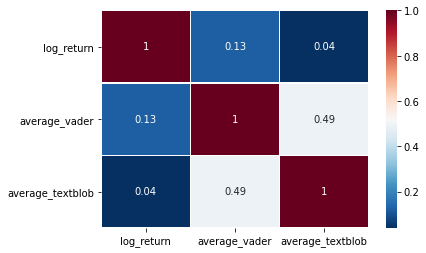

In [ ]:
rule_based_approaches_columns = ['log_return',
                                 'average_vader',
                                 'average_textblob']
pearsoncorr = df[rule_based_approaches_columns].corr(method ='pearson')
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.show()

####Pearson's correlation coefficient for dictionary framework

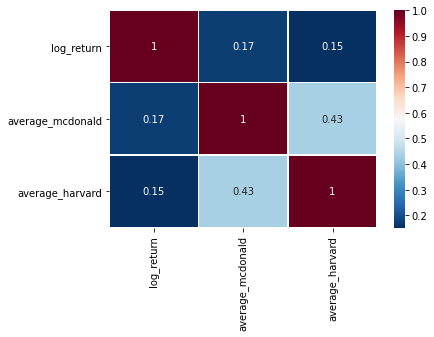

In [ ]:
dictionary_framework_columns = ['log_return',
                                'average_mcdonald',
                                'average_harvard']

pearsoncorr = df[dictionary_framework_columns].corr(method ='pearson')
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.show()

####Pearson's correlation coefficient for corpus-based sentiment lexicons

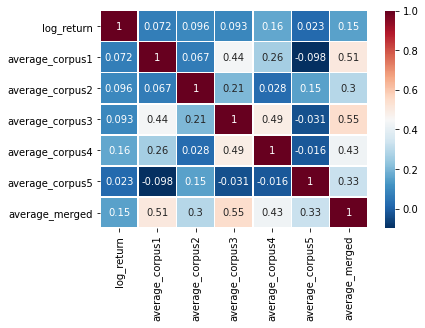

In [ ]:
corpus_based_sentiment_lexicons_columns = ['log_return',
                                           'average_corpus1',
                                           'average_corpus2',
                                           'average_corpus3',
                                           'average_corpus4',
                                           'average_corpus5',
                                           'average_merged',]
pearsoncorr = df[corpus_based_sentiment_lexicons_columns].corr(method ='pearson')
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.show()

####Pearson's correlation coefficient for domain-specific lexicons

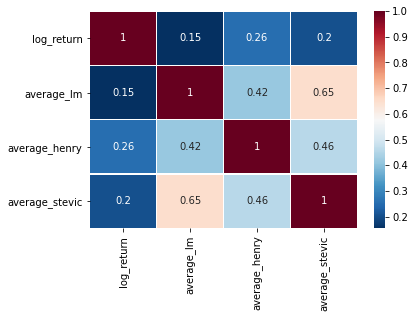

In [ ]:
domain_specific_lexicons_columns = ['log_return',
                                    'average_lm',
                                    'average_henry',
                                    'average_stevic'
                                    ]
pearsoncorr = df[domain_specific_lexicons_columns].corr(method ='pearson')
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.show()


###Comparison of different sentiment score techniques

In [ ]:
# Comparison of different sentiment score techniques.
comparison_columns = ['log_return',
                      'average_vader',
                      'average_textblob',
                      'average_mcdonald',
                      'average_harvard',
                      'average_corpus1',
                      'average_corpus2',
                      'average_corpus3',
                      'average_corpus4',
                      'average_corpus5',
                      'average_merged',
                      'average_lm',
                      'average_henry',
                      'average_stevic']
fig = px.line(df, x="Date", y=comparison_columns,
              hover_data={"Date": "|%B %d, %Y"},
              title='Comparison of different sentiment score techniques')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()
# We are done with comparison columns so we need to release some RAM. 
# We do not need comparison columns anymore.
df.drop(comparison_columns,axis='columns', inplace=True)

/usr/local/lib/python3.7/dist-packages/jsonschema/compat.py:6: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

/usr/local/lib/python3.7/dist-packages/jsonschema/compat.py:6: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



In [ ]:
# Shift time series:
# Before calculating the Pearson correlation coefficient we must see if there any time lag between 
# logarithmic returns and the average daily sentiment score of announced news and tweets.
# The time lag is the time needed for the market to respond to announced news and tweets.
# How quickly the market reacts to news and tweets. How much time = lags (in days) is needed for the market 
# to absorb new information via news and tweets. 
# We need to adapt the number of lags to get the biggest possible Pearson correlation coefficient.
# Empirically is determined that there is no time lag between logarithmic returns and the average daily sentiment score of announced news and tweets 
# because the market immediately absorbed new information via news and tweets.
# That is the reason why we shift time series for 0 days. Practically times series stays intact.
#df['log_return']=df['log_return'].shift(0)

#model inference utilization
# Classification metrics
classification_metrics_report('Vader classification metrics report:',df['signal_log_return'],df['signal_vader'])
classification_metrics_report('Textblob classification metrics report:',df['signal_log_return'],df['signal_textblob'])
classification_metrics_report('Loughran and McDonald classification metrics report:',df['signal_log_return'],df['signal_loughran_mcdonald'])
classification_metrics_report('Harvard IV-4 classification metrics report:', df['signal_log_return'],df['signal_harvard'])
classification_metrics_report('Generated Loughran and McDonald classification metrics report:', df['signal_log_return'],df['signal_lm'])
classification_metrics_report('Henry classification metrics report:', df['signal_log_return'],df['signal_henry'])
classification_metrics_report('Stevic classification metrics report:', df['signal_log_return'],df['signal_stevic'])
classification_metrics_report('Corpus1 classification metrics report:', df['signal_log_return'],df['signal_corpus1'])
classification_metrics_report('Corpus2 classification metrics report:', df['signal_log_return'],df['signal_corpus2'])
classification_metrics_report('Corpus3 classification metrics report:', df['signal_log_return'],df['signal_corpus3'])
classification_metrics_report('Corpus4 classification metrics report:', df['signal_log_return'],df['signal_corpus4'])
classification_metrics_report('Corpus5 classification metrics report:', df['signal_log_return'],df['signal_corpus5'])
#classification_metrics_report('Corpus6 classification metrics report:', df['signal_log_return'],df['signal_corpus6'])
classification_metrics_report('Corpus merged classification metrics report:', df['signal_log_return'],df['signal_merged'])

Vader classification metrics report:
[[ 46   0 174]
 [  0   0   1]
 [ 30   0 252]]
              precision    recall  f1-score   support

          -1       0.61      0.21      0.31       220
           0       0.00      0.00      0.00         1
           1       0.59      0.89      0.71       282

    accuracy                           0.59       503
   macro avg       0.40      0.37      0.34       503
weighted avg       0.60      0.59      0.53       503

Accuracy: 0.5924453280318092
Textblob classification metrics report:
[[  5   0 215]
 [  1   0   0]
 [  2   0 280]]
              precision    recall  f1-score   support

          -1       0.62      0.02      0.04       220
           0       0.00      0.00      0.00         1
           1       0.57      0.99      0.72       282

    accuracy                           0.57       503
   macro avg       0.40      0.34      0.25       503
weighted avg       0.59      0.57      0.42       503

Accuracy: 0.5666003976143141
Loughran an

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



###Financial time series analysis and forecasting

####Financial time series analysis

#####Types of financial time series

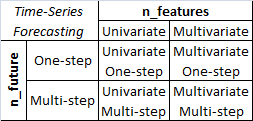

**n_samples** = Number of rows in transformed LSTM 3D input format

**n_features** = Number of features we want to use to predict the future = Number of columns in transformed LSTM 3D input format

**n_future** = Number of days we want to predict into the future

**n_past** = timesteps = shifted sliding window size = Number of past days we want to use to predict the future

#####Sliding Window Technique

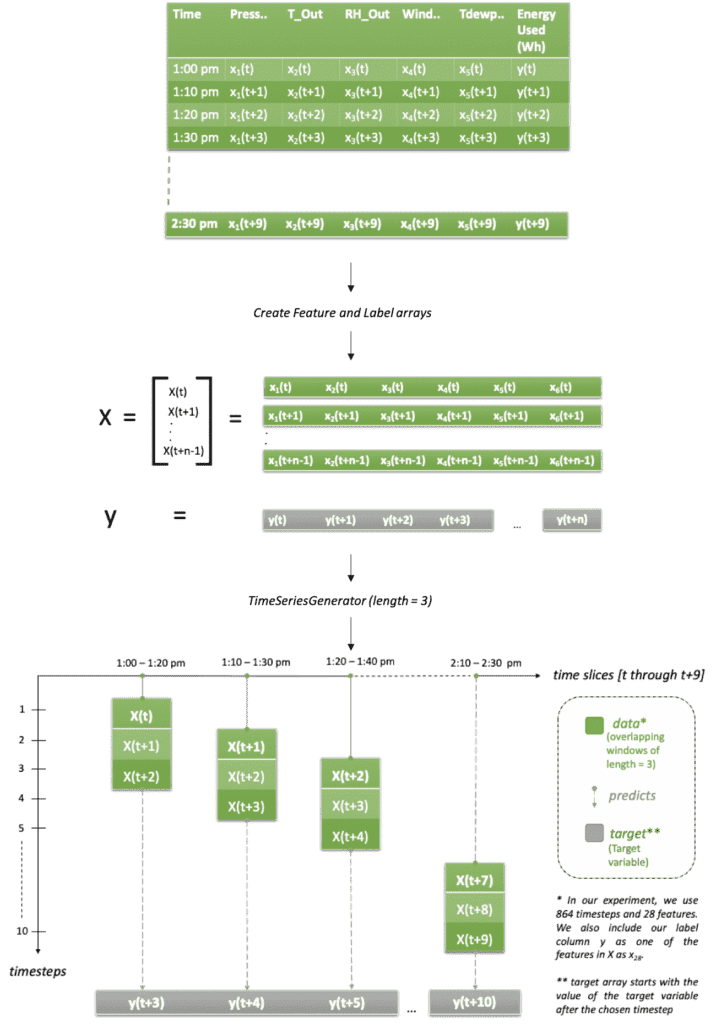

[source: Doing Multivariate Time Series Forecasting with Recurrent Neural Networks](https://databricks.com/blog/2019/09/10/doing-multivariate-time-series-forecasting-with-recurrent-neural-networks.html)

######Sliding Window Technique for univariate time series

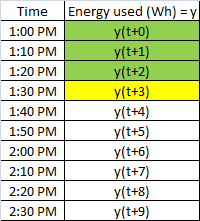

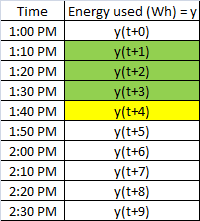

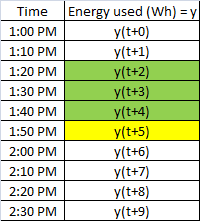

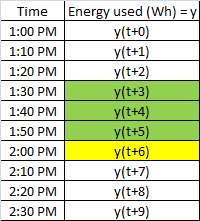

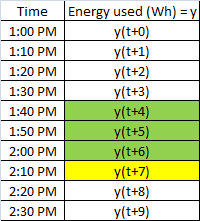

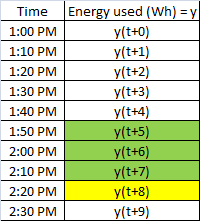

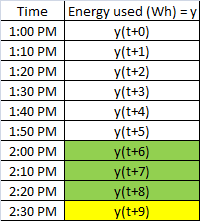

######Sliding Window Technique for multivariate time series

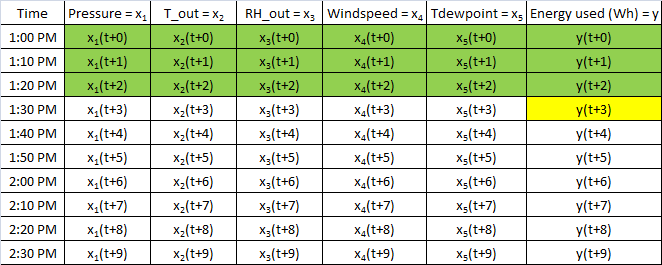
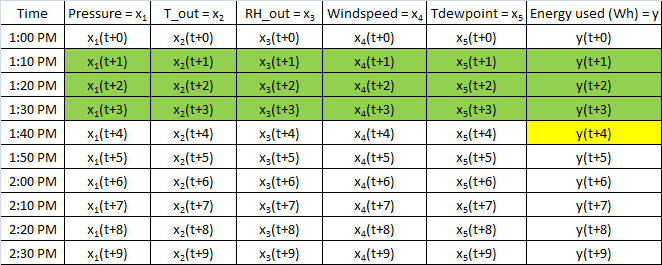
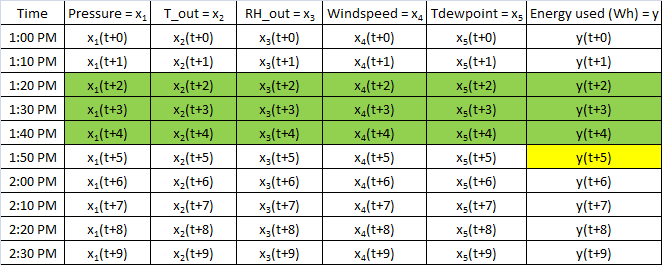
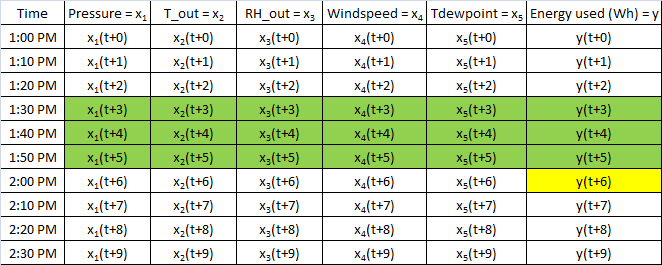
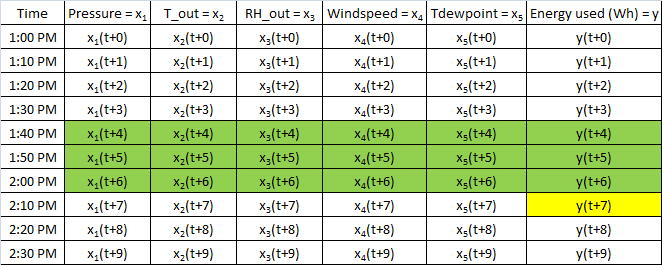
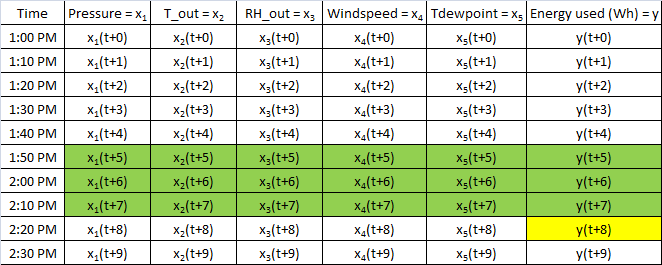
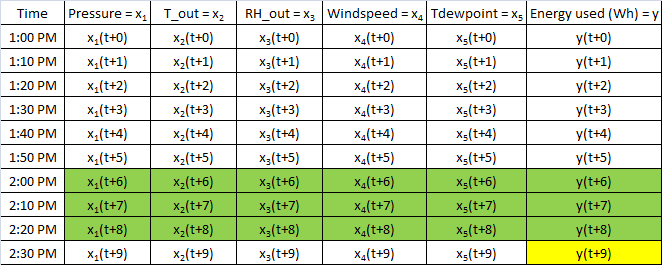

#####LSTM input shape transformation

####Financial time series forecasting

In [3]:
# compatibility issue with tensorflow and numpy 1.20.3
!pip install numpy==1.19.5


In [4]:
import pandas as pd
import os
from math import sqrt
from numpy import concatenate
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import LSTM
from pickle import dump
from pickle import load
PATH_TEMPORAL_FUSION = '/content/drive/MyDrive/Investment-Decision-Support-System/data/temporal_fusion'
PATH_SCALERS = '/content/drive/MyDrive/Investment-Decision-Support-System/scalers'
PATH_NN = '/content/drive/MyDrive/Investment-Decision-Support-System/models/nn'
PATH_RESULTS = '/content/drive/MyDrive/Investment-Decision-Support-System/results'

In [ ]:
!pip list

In [19]:
# Regression metrics report
def regression_metrics_report(description, y_true, y_pred):
  print(description)
  rmse = sqrt(mean_squared_error(y_true, y_pred))
  print('Test RMSE: %.3f' % rmse)

In [20]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [21]:
# load dataset
def series_to_supervised_wrapper(df, n_in=1, n_out=1, signal_column='reference_value'):
  dataset = df
  values = dataset.values
  if(signal_column!='reference_value'):
    # integer encode signal_vader
    signal_column_index = df.columns.tolist().index(signal_column)
    encoder = LabelEncoder()
    values[:,signal_column_index] = encoder.fit_transform(values[:,signal_column_index])
  # ensure all data is float
  values = values.astype('float32')
  # normalize features
  scaler = MinMaxScaler(feature_range=(0, 1))
  scaled = scaler.fit_transform(values)
  # save the scaler
  dump(scaler, open(os.path.join(PATH_SCALERS, 'financial_time_series_forecasting_scaler.pickle'), 'wb'))
  # frame as supervised learning
  reframed = series_to_supervised(scaled, n_in, n_out)
  # drop columns we don't want to predict
  target_column_index = reframed.columns.tolist().index('var1(t)')
  column_names = reframed.columns.tolist()
  reframed.drop(reframed.columns.difference(column_names[:target_column_index+1]), axis=1,inplace=True)
  print(reframed.head())
  return reframed

In [23]:
# split into train and test sets
def create_dataset(reframed, split_ratio):
  values = reframed.values
  n_train_days = int(len(values) * split_ratio)
  train = values[:n_train_days, :]
  test = values[n_train_days:, :]
  # split into input and outputs
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]
  # reshape input to be 3D [samples, timesteps, features]
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
  print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
  return train_X, train_y, test_X, test_y

In [24]:
def plot_history(history):
  plt.figure(figsize=(8,4))
  plt.plot(history.history['loss'], label='Train Loss')
  plt.plot(history.history['val_loss'], label='Test Loss')
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epochs')
  plt.legend(loc='upper right')
  plt.show();

#####Hypothesis assertion

**Hypothesis assertion:** Additional information such as financial tweets and financial news should have an impact on stock market movement. Adding new pieces of information in the analysis should reduce the error in regression models.

#####Hypothesis Testing

Shift target column 'Close' to the beginning of Dataframe for signal_log_return
          Close        High  ...   Adj Close  signal_log_return
0     35.547501   36.430000  ...   34.610851                 -1
1     37.064999   37.137501  ...   36.088364                  1
2     36.982498   37.207500  ...   36.008041                 -1
3     37.687500   37.955002  ...   36.694466                  1
4     38.327499   38.632500  ...   37.317600                  1
..          ...         ...  ...         ...                ...
498  130.960007  132.429993  ...  130.542862                 -1
499  131.970001  133.460007  ...  131.549637                  1
500  136.690002  137.339996  ...  136.254608                  1
501  134.869995  138.789993  ...  134.440399                 -1
502  133.720001  135.990005  ...  133.294067                 -1

[503 rows x 6 columns]
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)
1   0.000000   0.000000   0.000000   0.000000   0.

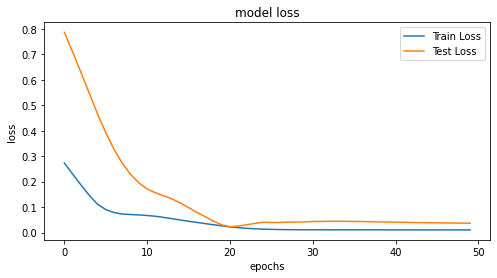

signal_log_return regression metrics report:
Test RMSE: 4.542
Shift target column 'Close' to the beginning of Dataframe for signal_vader
          Close        High         Low        Open   Adj Close  signal_vader
0     35.547501   36.430000   35.500000   35.994999   34.610851            -1
1     37.064999   37.137501   35.950001   36.132500   36.088364            -1
2     36.982498   37.207500   36.474998   37.174999   36.008041             1
3     37.687500   37.955002   37.130001   37.389999   36.694466             1
4     38.327499   38.632500   37.407501   37.822498   37.317600             1
..          ...         ...         ...         ...         ...           ...
498  130.960007  132.429993  130.779999  132.160004  130.542862             1
499  131.970001  133.460007  131.100006  131.320007  131.549637             1
500  136.690002  137.339996  133.509995  133.990005  136.254608             1
501  134.869995  138.789993  134.339996  138.050003  134.440399             1
502  

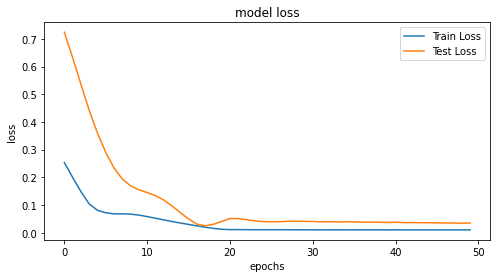

signal_vader regression metrics report:
Test RMSE: 4.368
Shift target column 'Close' to the beginning of Dataframe for signal_textblob
          Close        High  ...   Adj Close  signal_textblob
0     35.547501   36.430000  ...   34.610851                1
1     37.064999   37.137501  ...   36.088364                1
2     36.982498   37.207500  ...   36.008041                1
3     37.687500   37.955002  ...   36.694466                1
4     38.327499   38.632500  ...   37.317600                1
..          ...         ...  ...         ...              ...
498  130.960007  132.429993  ...  130.542862                1
499  131.970001  133.460007  ...  131.549637                1
500  136.690002  137.339996  ...  136.254608                1
501  134.869995  138.789993  ...  134.440399               -1
502  133.720001  135.990005  ...  133.294067                1

[503 rows x 6 columns]
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)
1   0.000000   0.00

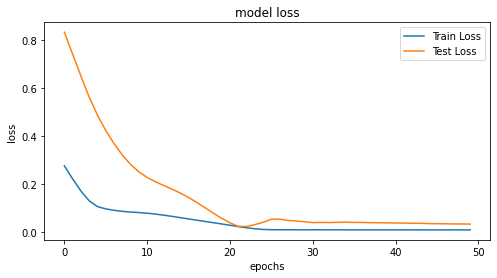

signal_textblob regression metrics report:
Test RMSE: 4.303
Shift target column 'Close' to the beginning of Dataframe for signal_loughran_mcdonald
          Close        High  ...   Adj Close  signal_loughran_mcdonald
0     35.547501   36.430000  ...   34.610851                        -1
1     37.064999   37.137501  ...   36.088364                        -1
2     36.982498   37.207500  ...   36.008041                        -1
3     37.687500   37.955002  ...   36.694466                        -1
4     38.327499   38.632500  ...   37.317600                        -1
..          ...         ...  ...         ...                       ...
498  130.960007  132.429993  ...  130.542862                        -1
499  131.970001  133.460007  ...  131.549637                         1
500  136.690002  137.339996  ...  136.254608                         1
501  134.869995  138.789993  ...  134.440399                        -1
502  133.720001  135.990005  ...  133.294067                        -1



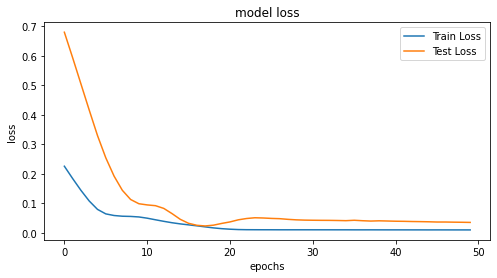

signal_loughran_mcdonald regression metrics report:
Test RMSE: 4.416
Shift target column 'Close' to the beginning of Dataframe for signal_harvard
          Close        High         Low        Open   Adj Close  signal_harvard
0     35.547501   36.430000   35.500000   35.994999   34.610851              -1
1     37.064999   37.137501   35.950001   36.132500   36.088364               1
2     36.982498   37.207500   36.474998   37.174999   36.008041              -1
3     37.687500   37.955002   37.130001   37.389999   36.694466               1
4     38.327499   38.632500   37.407501   37.822498   37.317600               1
..          ...         ...         ...         ...         ...             ...
498  130.960007  132.429993  130.779999  132.160004  130.542862               1
499  131.970001  133.460007  131.100006  131.320007  131.549637               1
500  136.690002  137.339996  133.509995  133.990005  136.254608               1
501  134.869995  138.789993  134.339996  138.050003  1

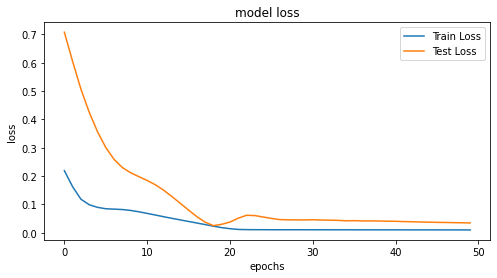

signal_harvard regression metrics report:
Test RMSE: 4.345
Shift target column 'Close' to the beginning of Dataframe for signal_corpus1
          Close        High         Low        Open   Adj Close  signal_corpus1
0     35.547501   36.430000   35.500000   35.994999   34.610851              -1
1     37.064999   37.137501   35.950001   36.132500   36.088364              -1
2     36.982498   37.207500   36.474998   37.174999   36.008041              -1
3     37.687500   37.955002   37.130001   37.389999   36.694466              -1
4     38.327499   38.632500   37.407501   37.822498   37.317600              -1
..          ...         ...         ...         ...         ...             ...
498  130.960007  132.429993  130.779999  132.160004  130.542862              -1
499  131.970001  133.460007  131.100006  131.320007  131.549637              -1
500  136.690002  137.339996  133.509995  133.990005  136.254608              -1
501  134.869995  138.789993  134.339996  138.050003  134.440399 

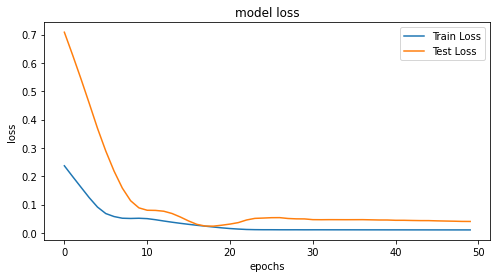

signal_corpus1 regression metrics report:
Test RMSE: 4.912
Shift target column 'Close' to the beginning of Dataframe for signal_corpus2
          Close        High         Low        Open   Adj Close  signal_corpus2
0     35.547501   36.430000   35.500000   35.994999   34.610851               1
1     37.064999   37.137501   35.950001   36.132500   36.088364               1
2     36.982498   37.207500   36.474998   37.174999   36.008041               1
3     37.687500   37.955002   37.130001   37.389999   36.694466               1
4     38.327499   38.632500   37.407501   37.822498   37.317600               1
..          ...         ...         ...         ...         ...             ...
498  130.960007  132.429993  130.779999  132.160004  130.542862               1
499  131.970001  133.460007  131.100006  131.320007  131.549637               1
500  136.690002  137.339996  133.509995  133.990005  136.254608               1
501  134.869995  138.789993  134.339996  138.050003  134.440399 

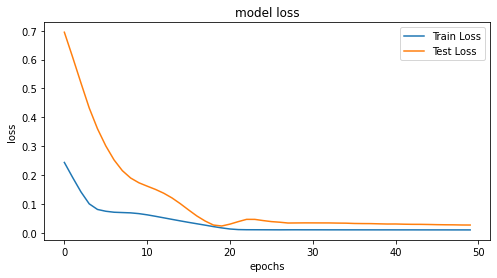

signal_corpus2 regression metrics report:
Test RMSE: 3.496
Shift target column 'Close' to the beginning of Dataframe for signal_corpus3
          Close        High         Low        Open   Adj Close  signal_corpus3
0     35.547501   36.430000   35.500000   35.994999   34.610851               1
1     37.064999   37.137501   35.950001   36.132500   36.088364               1
2     36.982498   37.207500   36.474998   37.174999   36.008041               1
3     37.687500   37.955002   37.130001   37.389999   36.694466               1
4     38.327499   38.632500   37.407501   37.822498   37.317600              -1
..          ...         ...         ...         ...         ...             ...
498  130.960007  132.429993  130.779999  132.160004  130.542862               1
499  131.970001  133.460007  131.100006  131.320007  131.549637               1
500  136.690002  137.339996  133.509995  133.990005  136.254608               1
501  134.869995  138.789993  134.339996  138.050003  134.440399 

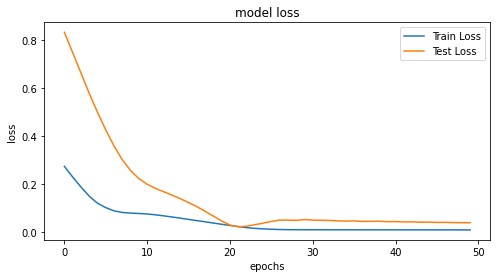

signal_corpus3 regression metrics report:
Test RMSE: 4.884
Shift target column 'Close' to the beginning of Dataframe for signal_corpus4
          Close        High         Low        Open   Adj Close  signal_corpus4
0     35.547501   36.430000   35.500000   35.994999   34.610851               1
1     37.064999   37.137501   35.950001   36.132500   36.088364               1
2     36.982498   37.207500   36.474998   37.174999   36.008041               1
3     37.687500   37.955002   37.130001   37.389999   36.694466               1
4     38.327499   38.632500   37.407501   37.822498   37.317600               1
..          ...         ...         ...         ...         ...             ...
498  130.960007  132.429993  130.779999  132.160004  130.542862               1
499  131.970001  133.460007  131.100006  131.320007  131.549637               1
500  136.690002  137.339996  133.509995  133.990005  136.254608               1
501  134.869995  138.789993  134.339996  138.050003  134.440399 

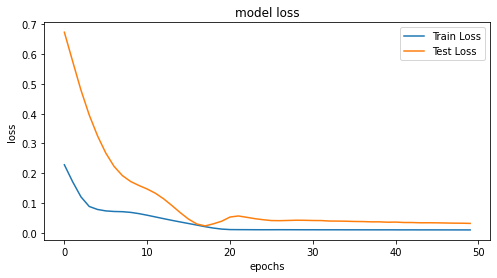

signal_corpus4 regression metrics report:
Test RMSE: 3.989
Shift target column 'Close' to the beginning of Dataframe for signal_corpus5
          Close        High         Low        Open   Adj Close  signal_corpus5
0     35.547501   36.430000   35.500000   35.994999   34.610851               1
1     37.064999   37.137501   35.950001   36.132500   36.088364               1
2     36.982498   37.207500   36.474998   37.174999   36.008041               1
3     37.687500   37.955002   37.130001   37.389999   36.694466               1
4     38.327499   38.632500   37.407501   37.822498   37.317600               1
..          ...         ...         ...         ...         ...             ...
498  130.960007  132.429993  130.779999  132.160004  130.542862               1
499  131.970001  133.460007  131.100006  131.320007  131.549637               1
500  136.690002  137.339996  133.509995  133.990005  136.254608               1
501  134.869995  138.789993  134.339996  138.050003  134.440399 

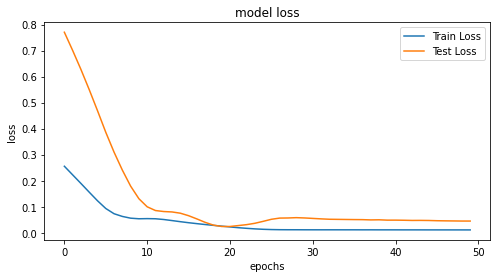

signal_corpus5 regression metrics report:
Test RMSE: 5.373
Shift target column 'Close' to the beginning of Dataframe for signal_merged
          Close        High         Low        Open   Adj Close  signal_merged
0     35.547501   36.430000   35.500000   35.994999   34.610851              1
1     37.064999   37.137501   35.950001   36.132500   36.088364              1
2     36.982498   37.207500   36.474998   37.174999   36.008041              1
3     37.687500   37.955002   37.130001   37.389999   36.694466              1
4     38.327499   38.632500   37.407501   37.822498   37.317600              1
..          ...         ...         ...         ...         ...            ...
498  130.960007  132.429993  130.779999  132.160004  130.542862              1
499  131.970001  133.460007  131.100006  131.320007  131.549637              1
500  136.690002  137.339996  133.509995  133.990005  136.254608              1
501  134.869995  138.789993  134.339996  138.050003  134.440399            

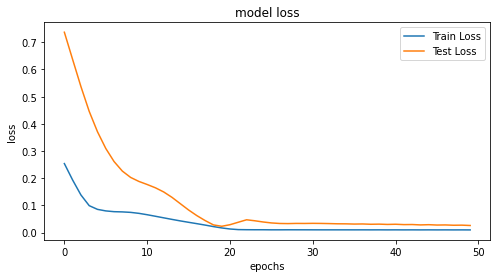

signal_merged regression metrics report:
Test RMSE: 3.363
Shift target column 'Close' to the beginning of Dataframe for signal_lm
          Close        High         Low        Open   Adj Close  signal_lm
0     35.547501   36.430000   35.500000   35.994999   34.610851         -1
1     37.064999   37.137501   35.950001   36.132500   36.088364         -1
2     36.982498   37.207500   36.474998   37.174999   36.008041         -1
3     37.687500   37.955002   37.130001   37.389999   36.694466         -1
4     38.327499   38.632500   37.407501   37.822498   37.317600         -1
..          ...         ...         ...         ...         ...        ...
498  130.960007  132.429993  130.779999  132.160004  130.542862         -1
499  131.970001  133.460007  131.100006  131.320007  131.549637          1
500  136.690002  137.339996  133.509995  133.990005  136.254608          1
501  134.869995  138.789993  134.339996  138.050003  134.440399         -1
502  133.720001  135.990005  133.399994  135.

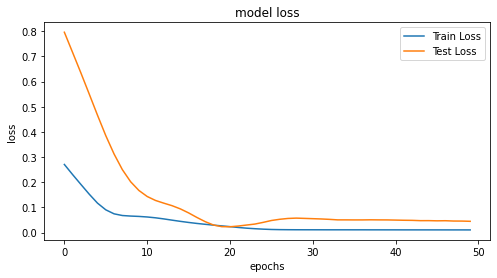

signal_lm regression metrics report:
Test RMSE: 5.368
Shift target column 'Close' to the beginning of Dataframe for signal_henry
          Close        High         Low        Open   Adj Close  signal_henry
0     35.547501   36.430000   35.500000   35.994999   34.610851            -1
1     37.064999   37.137501   35.950001   36.132500   36.088364             1
2     36.982498   37.207500   36.474998   37.174999   36.008041             1
3     37.687500   37.955002   37.130001   37.389999   36.694466             1
4     38.327499   38.632500   37.407501   37.822498   37.317600             1
..          ...         ...         ...         ...         ...           ...
498  130.960007  132.429993  130.779999  132.160004  130.542862             1
499  131.970001  133.460007  131.100006  131.320007  131.549637             1
500  136.690002  137.339996  133.509995  133.990005  136.254608             1
501  134.869995  138.789993  134.339996  138.050003  134.440399             1
502  133.7200

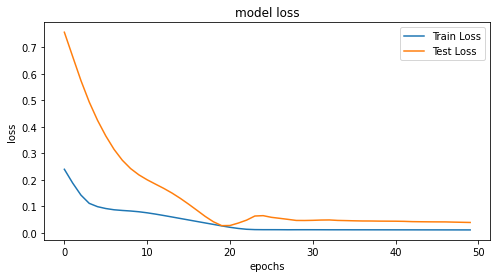

signal_henry regression metrics report:
Test RMSE: 4.789
Shift target column 'Close' to the beginning of Dataframe for signal_stevic
          Close        High         Low        Open   Adj Close  signal_stevic
0     35.547501   36.430000   35.500000   35.994999   34.610851             -1
1     37.064999   37.137501   35.950001   36.132500   36.088364             -1
2     36.982498   37.207500   36.474998   37.174999   36.008041              1
3     37.687500   37.955002   37.130001   37.389999   36.694466              1
4     38.327499   38.632500   37.407501   37.822498   37.317600              1
..          ...         ...         ...         ...         ...            ...
498  130.960007  132.429993  130.779999  132.160004  130.542862             -1
499  131.970001  133.460007  131.100006  131.320007  131.549637              1
500  136.690002  137.339996  133.509995  133.990005  136.254608              1
501  134.869995  138.789993  134.339996  138.050003  134.440399              

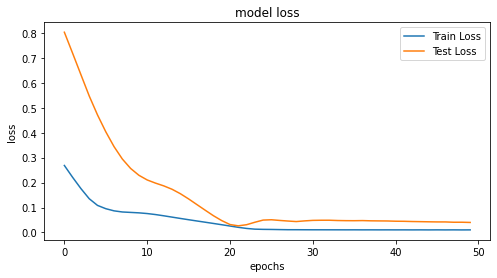

signal_stevic regression metrics report:
Test RMSE: 4.939
Shift target column 'Close' to the beginning of Dataframe for reference_value
          Close        High         Low        Open   Adj Close
0     35.547501   36.430000   35.500000   35.994999   34.610851
1     37.064999   37.137501   35.950001   36.132500   36.088364
2     36.982498   37.207500   36.474998   37.174999   36.008041
3     37.687500   37.955002   37.130001   37.389999   36.694466
4     38.327499   38.632500   37.407501   37.822498   37.317600
..          ...         ...         ...         ...         ...
498  130.960007  132.429993  130.779999  132.160004  130.542862
499  131.970001  133.460007  131.100006  131.320007  131.549637
500  136.690002  137.339996  133.509995  133.990005  136.254608
501  134.869995  138.789993  134.339996  138.050003  134.440399
502  133.720001  135.990005  133.399994  135.580002  133.294067

[503 rows x 5 columns]
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)
1   0

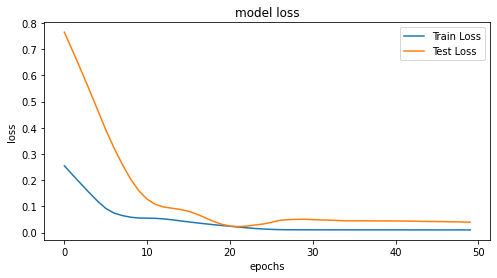

reference_value regression metrics report:
Test RMSE: 4.867


In [36]:
df = pd.read_csv(os.path.join(PATH_TEMPORAL_FUSION, 'temporal_fusion.csv'))
columns = df.columns.tolist()
# Signals represent forecasting financial time series using stock market data and Twitter data. 
# Signals are combining stock market data and Twitter sentiment analysis results. 
# They were named after sentiment analysis classifiers. Results of signals are compared with reference value.
signals = [column for column in columns if 'signal' in column]
# Reference value represents forecasting financial time series using only stock market data. 
# This is the reference value for all other forecasts. The reference value is used for comparison 
# with other signals forecasts. 
signals.append('reference_value')
# Regression results comparison dictionary contains information about the 
# performance of different regression models. Regression model names are used as keys, 
# while regression model performances are used as values in a dictionary.
regression_results_comparison = {}
if not os.path.exists(os.path.join(PATH_RESULTS, 'regression_results_comparison.pickle')):
  # save the regression_results_comparison dictionary 
  dump(regression_results_comparison, open(os.path.join(PATH_RESULTS, 'regression_results_comparison.pickle'), 'wb'))
# load the regression_results_comparison dictionary  
regression_results_comparison = load(open(os.path.join(PATH_RESULTS, 'regression_results_comparison.pickle'), 'rb'))
for signal in signals:
  df = pd.read_csv(os.path.join(PATH_TEMPORAL_FUSION, 'temporal_fusion.csv'))
  forecasting_columns = ['Close', 'High', 'Low', 'Open', 'Adj Close']
  if(signal!='reference_value'):
    forecasting_columns.append(signal)
  df.drop(df.columns.difference(forecasting_columns), axis=1,inplace=True)
  # Shift target column 'Close' to the beginning of Dataframe because 
  # series_to_supervised function requires this shift.
  first_column = df.pop('Close')
  df.insert(0, 'Close', first_column)
  print(f'Shift target column \'Close\' to the beginning of Dataframe for {signal}')
  print(df)
  reframed = series_to_supervised_wrapper(df, n_in=1, n_out=1, signal_column=signal)
  train_X, train_y, test_X, test_y = create_dataset(reframed,split_ratio=0.8)
  # design network
  model = Sequential()
  model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
  model.add(Dense(1))
  model.compile(loss='mae', optimizer='adam')
  # fit network
  history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
  # plot history
  plot_history(history)
  # save model and architecture to single file
  model.save(os.path.join(PATH_NN, f'regression_{signal}_model.h5'))
  # load model
  model = load_model(os.path.join(PATH_NN, f'regression_{signal}_model.h5'))
  # make a prediction
  yhat = model.predict(test_X)
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
  # invert scaling for forecast
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  # load the scaler
  scaler = load(open(os.path.join(PATH_SCALERS, 'financial_time_series_forecasting_scaler.pickle'), 'rb'))
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]
  # invert scaling for actual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]
  regression_metrics_report(f'{signal} regression metrics report:', inv_y, inv_yhat)
  # calculate RMSE
  rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
  if signal not in regression_results_comparison:
    regression_results_comparison[signal] = rmse
  else:
    if(rmse<regression_results_comparison[signal]):
      regression_results_comparison[signal] = rmse

# save the regression_results_comparison dictionary 
dump(regression_results_comparison, open(os.path.join(PATH_RESULTS, 'regression_results_comparison.pickle'), 'wb'))

  
  

######Forecasting financial time series using only stock market data

In [ ]:
df = pd.read_csv(os.path.join(PATH_TEMPORAL_FUSION, 'temporal_fusion.csv'))
df.drop(df.columns.difference(['Close', 'High', 'Low', 'Open', 'Adj Close']), axis=1,inplace=True)

In [ ]:
# Shift target column 'Close' to the beginning of Dataframe because 
# series_to_supervised function requires this shift.
first_column = df.pop('Close')
df.insert(0, 'Close', first_column)
df

In [ ]:
reframed = series_to_supervised_wrapper(df, n_in=1, n_out=1)

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)
1   0.000000   0.000000   0.000000   0.000000   0.000000  0.015004
2   0.015004   0.006912   0.004553   0.001347   0.014536  0.014188
3   0.014188   0.007596   0.009864   0.011562   0.013746  0.021158
4   0.021158   0.014898   0.016491   0.013669   0.020499  0.027486
5   0.027486   0.021517   0.019299   0.017907   0.026630  0.028697


In [ ]:
train_X, train_y, test_X, test_y = create_dataset(reframed,split_ratio=0.8)

(401, 1, 5) (401,) (101, 1, 5) (101,)


######Forecasting financial time series using stock market data and Twitter data

In [ ]:
df = pd.read_csv(os.path.join(PATH_TEMPORAL_FUSION, 'temporal_fusion.csv'))
df.drop(df.columns.difference(['Close', 'High', 'Low', 'Open', 'Adj Close', 'signal_vader']), axis=1,inplace=True)

In [ ]:
# Shift target column 'Close' to the beginning of Dataframe because 
# series_to_supervised function requires this shift.
first_column = df.pop('Close')
df.insert(0, 'Close', first_column)
df

In [ ]:
reframed = series_to_supervised_wrapper(df, n_in=1, n_out=1, signal_column='signal_vader')

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)
1   0.000000   0.000000   0.000000   0.000000   0.000000        0.0  0.015004
2   0.015004   0.006912   0.004553   0.001347   0.014536        0.0  0.014188
3   0.014188   0.007596   0.009864   0.011562   0.013746        1.0  0.021158
4   0.021158   0.014898   0.016491   0.013669   0.020499        1.0  0.027486
5   0.027486   0.021517   0.019299   0.017907   0.026630        1.0  0.028697


In [ ]:
train_X, train_y, test_X, test_y = create_dataset(reframed,split_ratio=0.8)

(401, 1, 6) (401,) (101, 1, 6) (101,)


Epoch 1/50
6/6 - 3s - loss: 0.2175 - val_loss: 0.6651
Epoch 2/50
6/6 - 0s - loss: 0.1584 - val_loss: 0.5628
Epoch 3/50
6/6 - 0s - loss: 0.1096 - val_loss: 0.4655
Epoch 4/50
6/6 - 0s - loss: 0.0867 - val_loss: 0.3849
Epoch 5/50
6/6 - 0s - loss: 0.0781 - val_loss: 0.3178
Epoch 6/50
6/6 - 0s - loss: 0.0741 - val_loss: 0.2646
Epoch 7/50
6/6 - 0s - loss: 0.0736 - val_loss: 0.2271
Epoch 8/50
6/6 - 0s - loss: 0.0721 - val_loss: 0.2030
Epoch 9/50
6/6 - 0s - loss: 0.0684 - val_loss: 0.1875
Epoch 10/50
6/6 - 0s - loss: 0.0631 - val_loss: 0.1757
Epoch 11/50
6/6 - 0s - loss: 0.0572 - val_loss: 0.1629
Epoch 12/50
6/6 - 0s - loss: 0.0512 - val_loss: 0.1464
Epoch 13/50
6/6 - 0s - loss: 0.0452 - val_loss: 0.1255
Epoch 14/50
6/6 - 0s - loss: 0.0394 - val_loss: 0.1007
Epoch 15/50
6/6 - 0s - loss: 0.0339 - val_loss: 0.0752
Epoch 16/50
6/6 - 0s - loss: 0.0287 - val_loss: 0.0536
Epoch 17/50
6/6 - 0s - loss: 0.0232 - val_loss: 0.0353
Epoch 18/50
6/6 - 0s - loss: 0.0179 - val_loss: 0.0270
Epoch 19/50
6/6 - 0

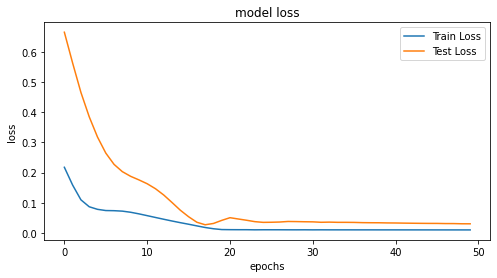

In [ ]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plot_history(history)
# save model and architecture to single file
model.save(os.path.join(PATH_NN, 'regression_stock_market_data_signal_vader_model.h5'))

In [ ]:
# load model
model = load_model(os.path.join(PATH_NN, 'regression_stock_market_data_signal_vader_model.h5'))
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
# load the scaler
scaler = load(open(os.path.join(PATH_SCALERS, 'financial_time_series_forecasting_scaler.pickle'), 'rb'))
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
regression_metrics_report('Stock market data +  signal_vader regression metrics report:', inv_y, inv_yhat)

Stock market data +  signal_vader regression metrics report:
Test RMSE: 3.847


#####Hypothesis confirmation

##provera

In [ ]:
#df = pd.read_csv(os.path.join(PATH_PRICES, 'prices.csv'))
df = pd.read_csv(os.path.join(PATH_TEMPORAL_FUSION, 'temporal_fusion.csv'))
df.set_index('Date', inplace=True) 
df
#print(df.index.dtype)
df.columns.tolist().index('signal_vader')

20

In [33]:
# load the regression_results_comparison dictionary  
regression_results_comparison = load(open(os.path.join(PATH_RESULTS, 'regression_results_comparison.pickle'), 'rb'))
regression_results_comparison

{'reference_value': 4.744762745785499,
 'signal_corpus1': 5.221180972098956,
 'signal_corpus2': 3.833368190662184,
 'signal_corpus3': 4.1325937368258625,
 'signal_corpus4': 3.5057739587435877,
 'signal_corpus5': 5.590390182007421,
 'signal_harvard': 3.4197123064091164,
 'signal_henry': 3.8478207006020866,
 'signal_lm': 5.063006528780467,
 'signal_log_return': 3.816426990651804,
 'signal_loughran_mcdonald': 3.762288114848577,
 'signal_merged': 3.5386867028938567,
 'signal_stevic': 4.565740192482378,
 'signal_textblob': 3.452585583840771,
 'signal_vader': 3.671416428520983}

In [37]:
# load the regression_results_comparison dictionary  
regression_results_comparison = load(open(os.path.join(PATH_RESULTS, 'regression_results_comparison.pickle'), 'rb'))
regression_results_comparison

{'reference_value': 4.744762745785499,
 'signal_corpus1': 4.911586313478171,
 'signal_corpus2': 3.3082328518486697,
 'signal_corpus3': 4.1325937368258625,
 'signal_corpus4': 3.164245600170866,
 'signal_corpus5': 5.37317040820368,
 'signal_harvard': 3.4197123064091164,
 'signal_henry': 3.8478207006020866,
 'signal_lm': 3.8724341973168284,
 'signal_log_return': 3.816426990651804,
 'signal_loughran_mcdonald': 3.762288114848577,
 'signal_merged': 3.3631201870551886,
 'signal_stevic': 4.328979628153923,
 'signal_textblob': 3.452585583840771,
 'signal_vader': 3.671416428520983}